In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
vehicle_data =  pd.read_csv('data2.csv')
vehicle_data =  pd.read_csv('data2.csv', names=['Url', 'Title', 'Date', 'Dictrict', 'Area', 'Price','Brand', 'Model', 'Trim/Edition', 'ModelYear', 'Condition', 'Transmission', 'BodyType', 'FuelType', 'EngineCapacity','Millage','Description']) #

In [24]:
vehicle_data['Millage']=vehicle_data['Millage'].str.replace('\D+','').astype(int)

In [25]:
vehicle_data.head()

Url  \
0  https://ikman.lk//en/ad/suzuki-wagon-r-fz-safe...   
1  https://ikman.lk//en/ad/honda-vezel-z-orange-g...   
2  https://ikman.lk//en/ad/honda-fit-gp-5-l-grade...   
3  https://ikman.lk//en/ad/toyota-premio-ex-g-sup...   
4  https://ikman.lk//en/ad/mercedes-benz-cls-350-...   

                                  Title             Date       Dictrict  \
0         Suzuki Wagon R FZ Safety 2015   2 Mar  7:04 am        Negombo   
1  Honda Vezel Z Orange Gold Batch 2014  25 Mar  9:08 pm  Mount Lavinia   
2           Honda Fit GP 5 L Grade 2014  27 Mar  2:16 pm          Kotte   
3      Toyota Premio EX G-Superior 2019  27 Mar  2:15 pm       Kohuwala   
4            Mercedes Benz CLS 350 2018  16 Mar  2:01 pm      Colombo 8   

       Area     Price          Brand       Model         Trim/Edition  \
0   Gampaha   3200000         Suzuki  Wagon R FZ               Safety   
1   Colombo   5790000          Honda       Vezel  Z Orange Gold Batch   
2   Colombo   4450000          Honda         Fit     Fit GP 5 L Grade   
3   Colombo  11350000         Toyota      Premio        EX G-Superior   
4   Colombo  27500000  Mercedes Benz         CLS                  350   

   ModelYear Condition Transmission   BodyType FuelType EngineCapacity  \
0       2015      Used    Automatic  Hatchback   Hybrid         650 cc   
1       2014      Used    Automatic  SUV / 4x4   Hybrid       1,500 cc   
2       2014      Used    Automatic  Hatchback   Hybrid       1,500 cc   
3       2019      Used    Automatic     Saloon   Petrol       1,500 cc   
4       2018      Used    Tiptronic     Saloon   Petrol       2,000 cc   

   Millage                                        Description  
0    63000  ['<p>Dvd, Tv , Reverse camera, Dual Air Bags, ...  
1    59000  ['<p>HONDA VEZEL Z ORANGE GOLD BATCH CAC-XXXX ...  
2    61000  ['<p>Honda Fit GP 5 , 2014 , L Grade , F/O , A...  
3     9000  ['<p>Toyota Premio F EX G Superior', 'Highest ...  
4     9400  ['<p>FULLY LOADED,AGENT MAINTAINED,SUNROOF,SOU...

# BASED ON CONDITION

In [99]:
vehicle_data['Condition'].value_counts()

Used             6378
Reconditioned     250
New               169
Name: Condition, dtype: int64

# BASED ON FUELTYPE

In [101]:
vehicle_data['FuelType'].value_counts()

Petrol             4736
Diesel             1004
Hybrid              996
Electric             51
Other fuel type       8
CNG                   2
Name: FuelType, dtype: int64

# BASED ON TRANMISSION 

In [102]:
vehicle_data['Transmission'].value_counts()

Automatic             4399
Manual                1827
Tiptronic              568
Other transmission       3
Name: Transmission, dtype: int64

# BASED ON BODY TYPE 

In [103]:
vehicle_data['BodyType'].value_counts()

Hatchback        2542
Saloon           2265
SUV / 4x4        1407
Station wagon     353
MPV               129
Coupé/Sports       52
Convertible        49
Name: BodyType, dtype: int64

# COUNT BASED ON MODEL  YEAR

<AxesSubplot:>

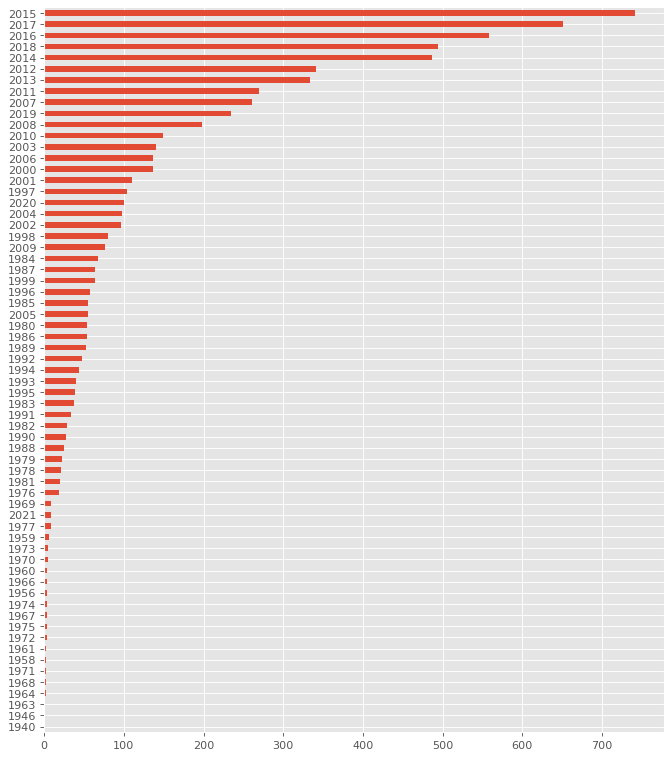

In [115]:
from matplotlib.pyplot import figure
figure(figsize=(10, 12), dpi=80)
vehicle_data['ModelYear'].value_counts().sort_values().plot(kind = 'barh')


# COUNT BASED ON Dictrict


In [122]:
vehicle_data['Area'].value_counts()

 Colombo         3267
 Gampaha         1447
 Kurunegala       350
 Kalutara         296
 Kandy            285
 Galle            204
 Matara           189
 Puttalam         138
 Kegalle          136
 Ratnapura        115
 Anuradhapura      73
 Matale            59
 Hambantota        55
 Ampara            50
 Badulla           44
 Monaragala        22
 Batticaloa        21
 Polonnaruwa       15
 Nuwara Eliya       9
 Trincomalee        8
 Vavuniya           7
 Jaffna             6
 Mannar             1
Name: Area, dtype: int64

In [72]:
groupByModel = vehicle_data.groupby(['Brand', 'Model'])['Price'].describe()

In [73]:
groupByModel.head()

count          mean           std         min         25%  \
Brand Model                                                              
Audi  A1       9.0  5.897222e+06  6.923064e+05   5375000.0   5375000.0   
      A3       6.0  9.916667e+06  6.600505e+05   9300000.0   9650000.0   
      A4      11.0  9.338636e+06  2.973011e+06   5525000.0   6975000.0   
      A5       6.0  1.607500e+07  1.558124e+06  14500000.0  14975000.0   
      A6       8.0  7.917500e+06  1.765671e+06   5350000.0   6560000.0   

                    50%         75%         max  
Brand Model                                      
Audi  A1      5375000.0   6675000.0   7000000.0  
      A3      9750000.0   9850000.0  11200000.0  
      A4      9375000.0  11375000.0  15000000.0  
      A5     15900000.0  16487500.0  18800000.0  
      A6      8250000.0   8937500.0  10200000.0

/home/d5han/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


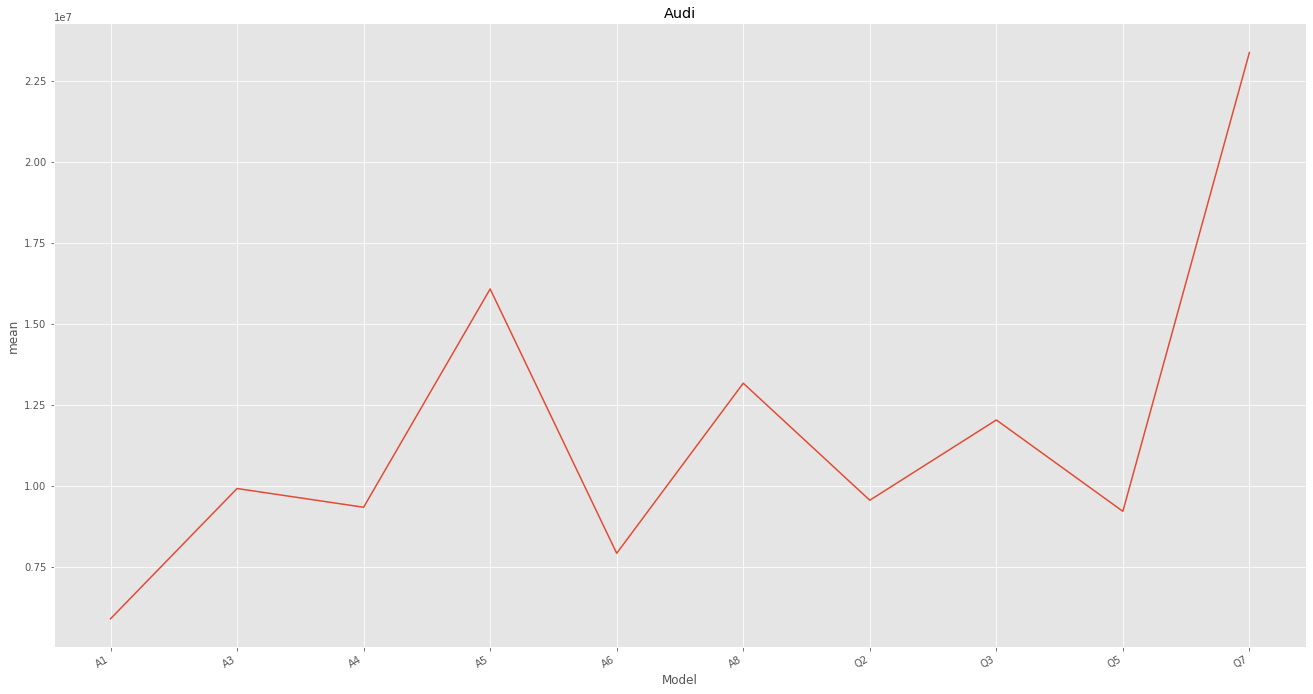

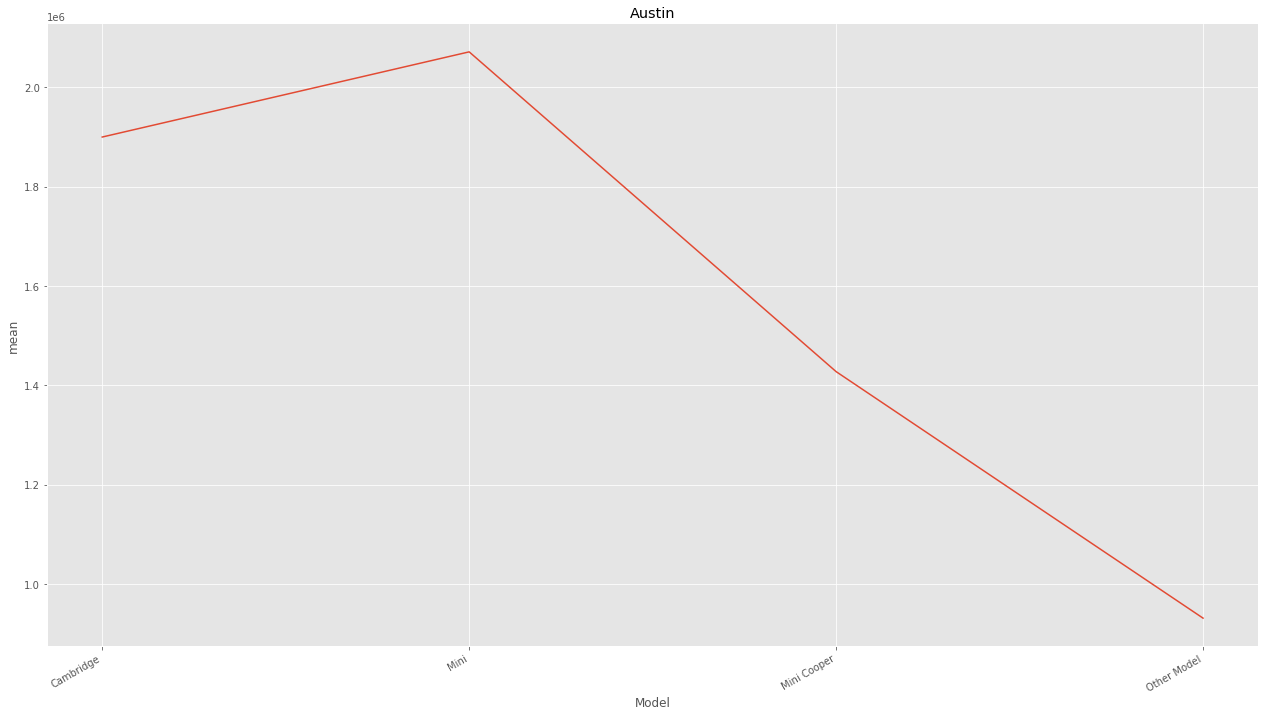

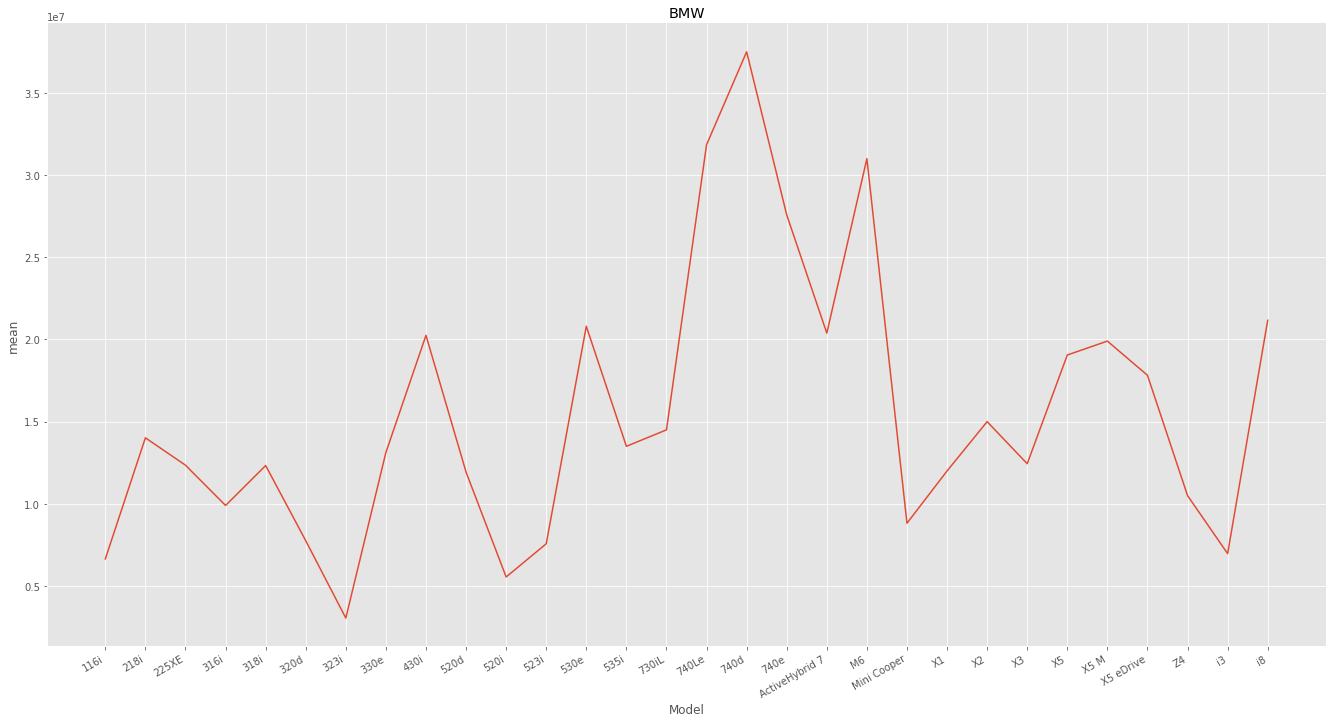

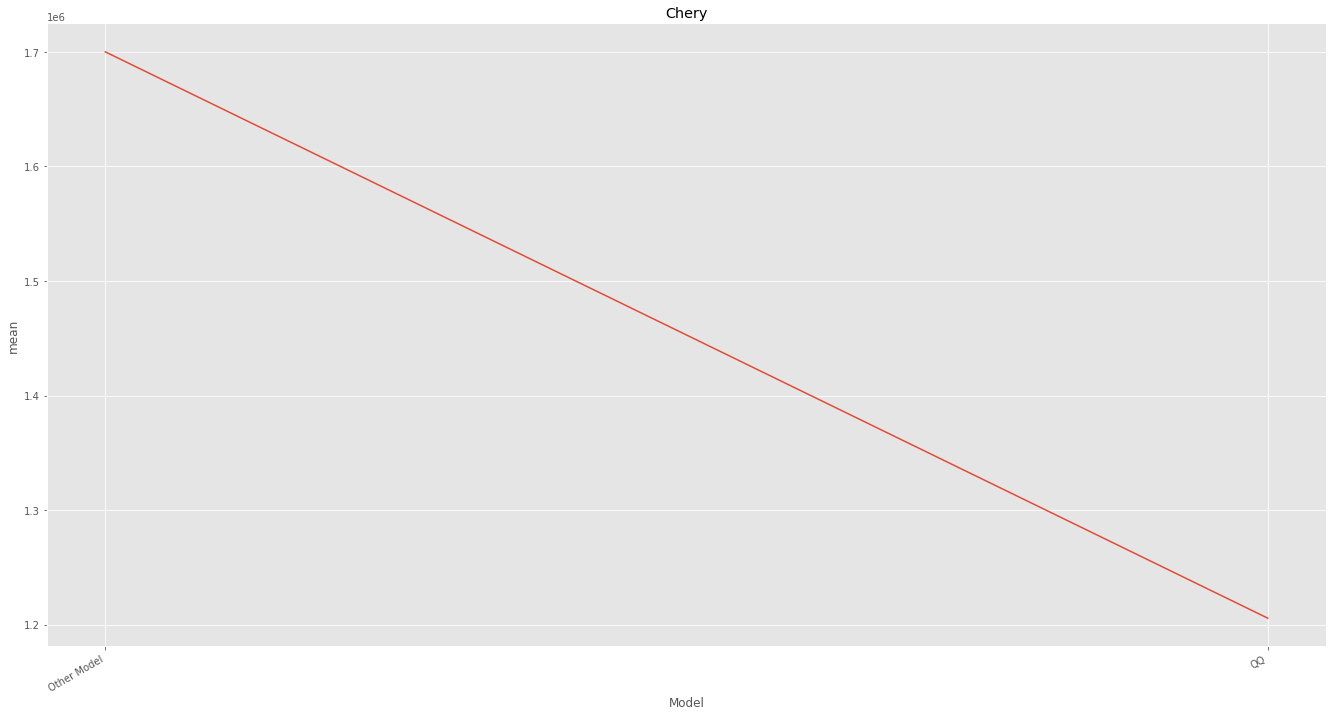

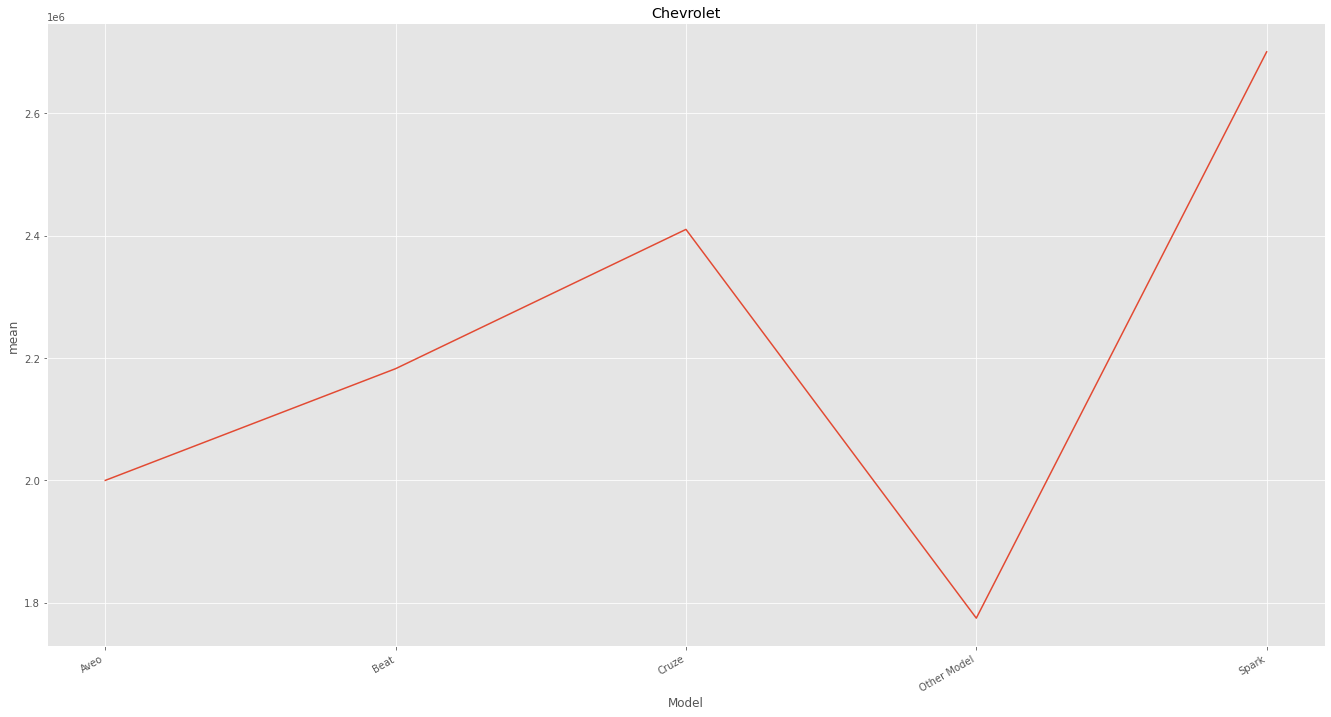

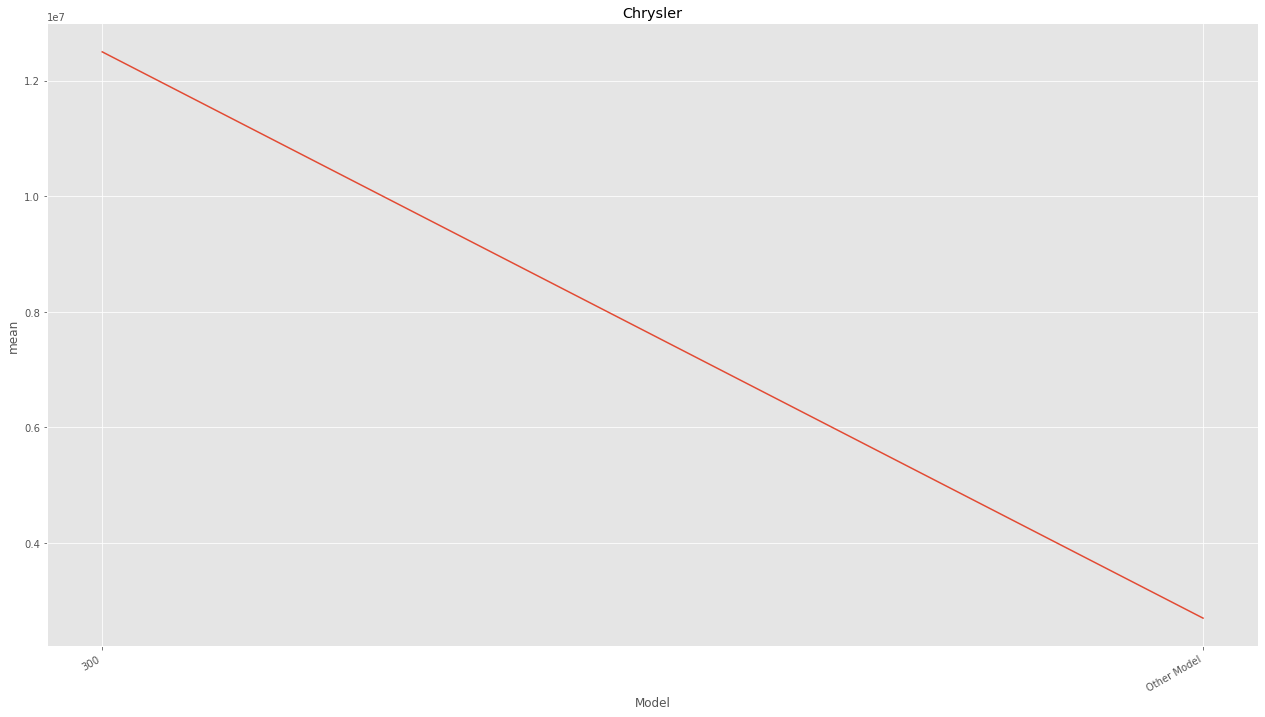

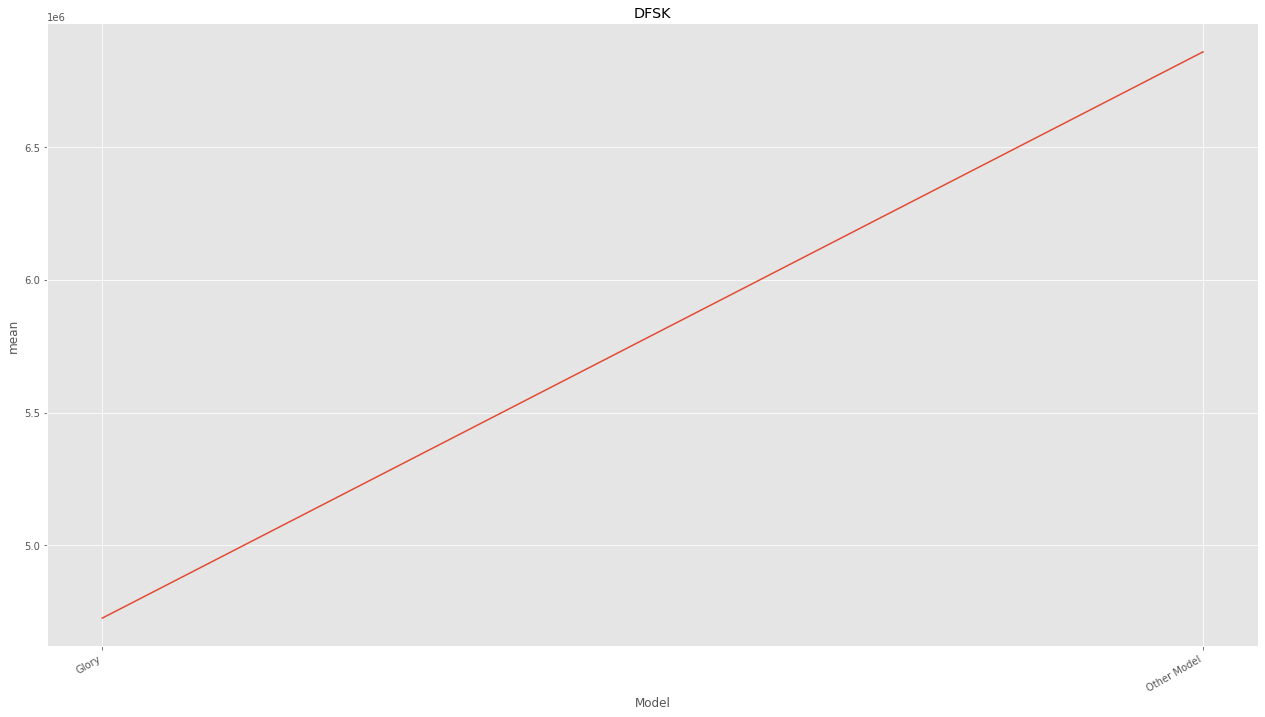

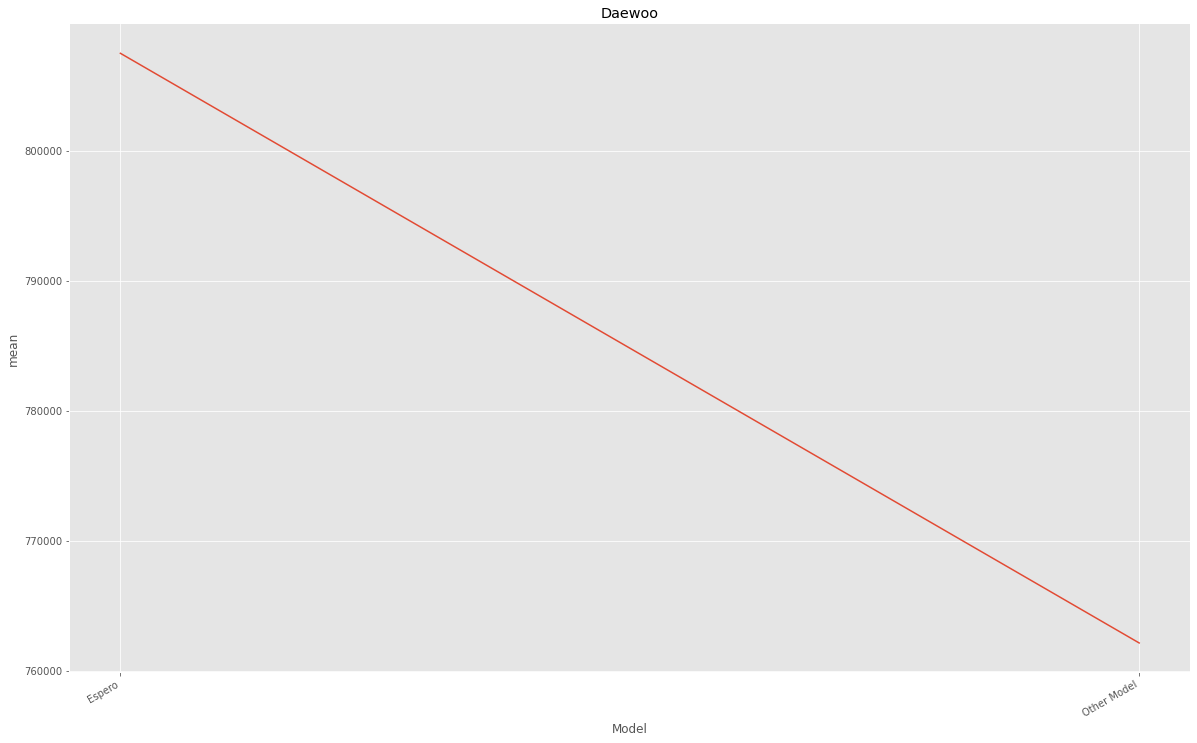

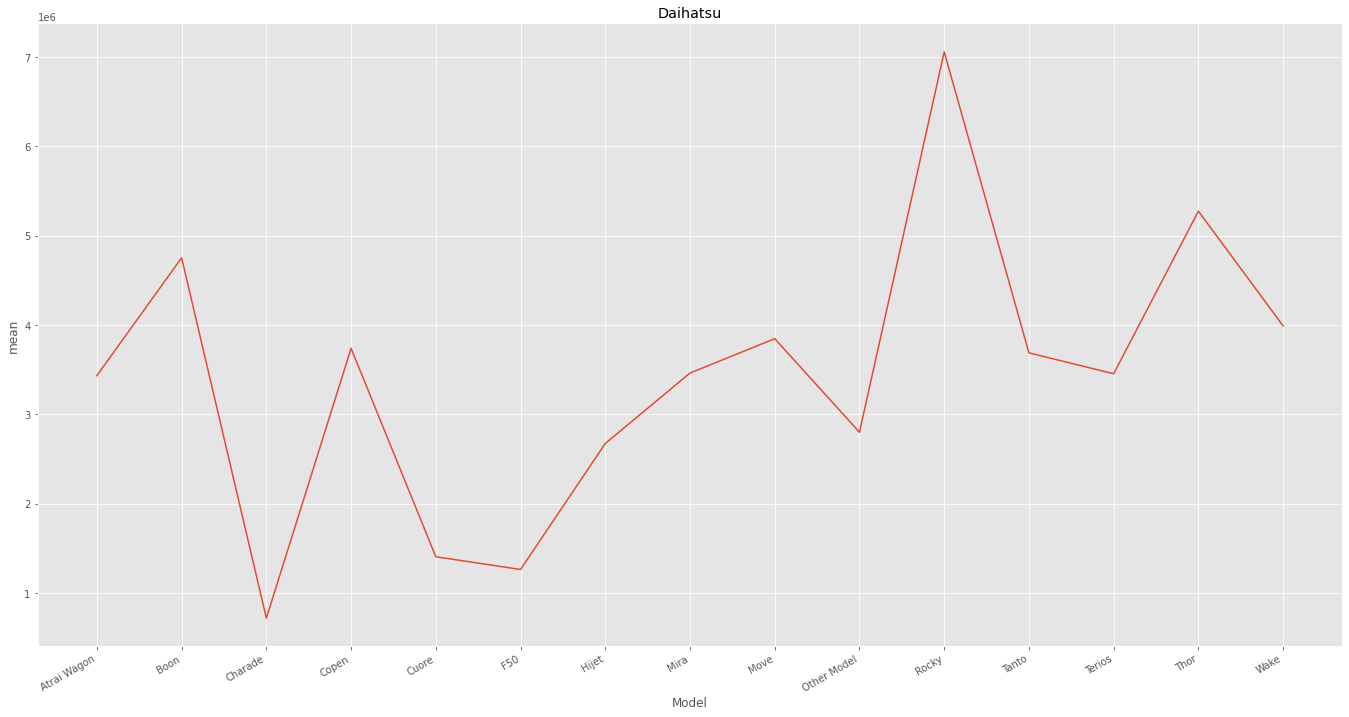

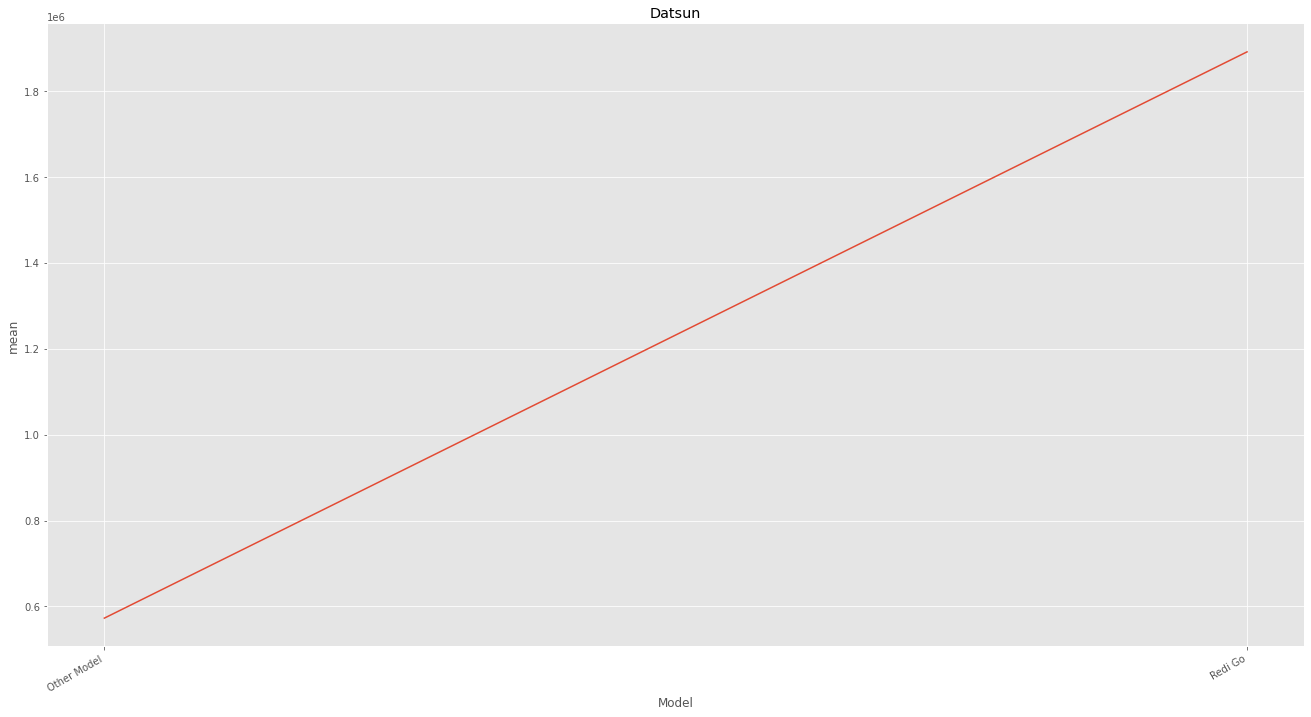

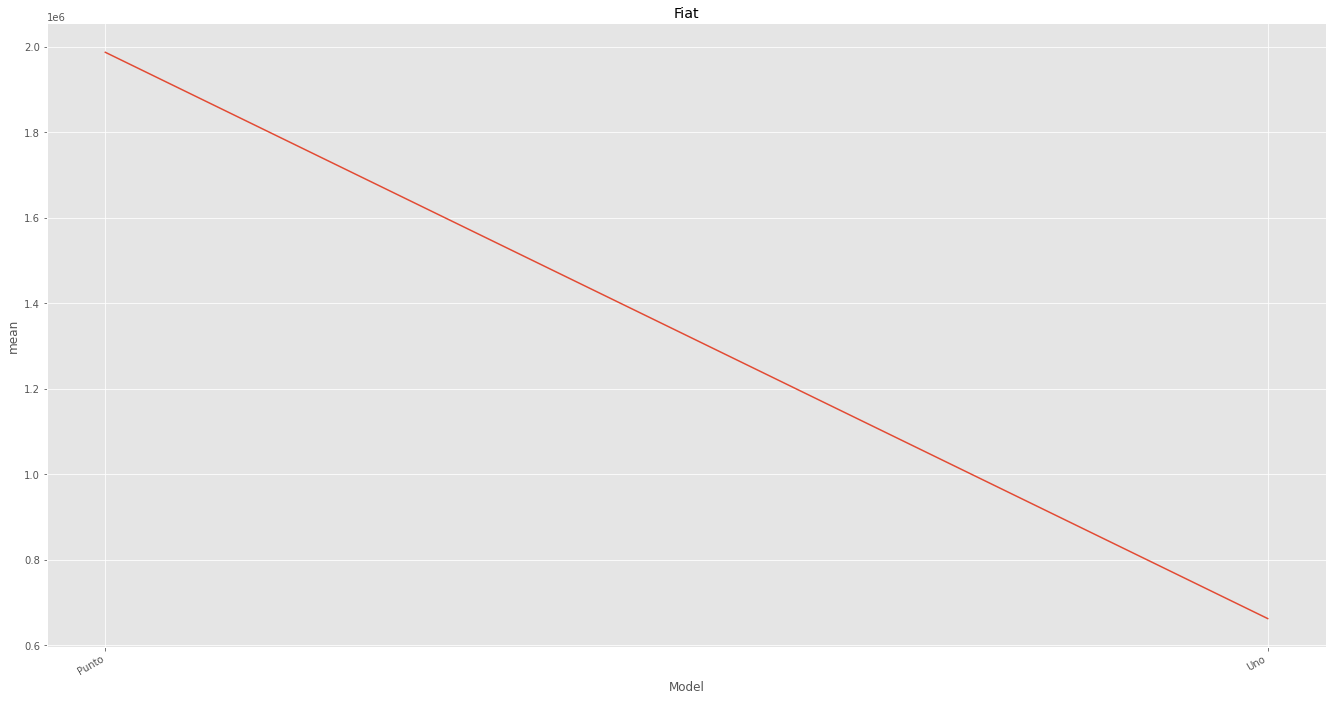

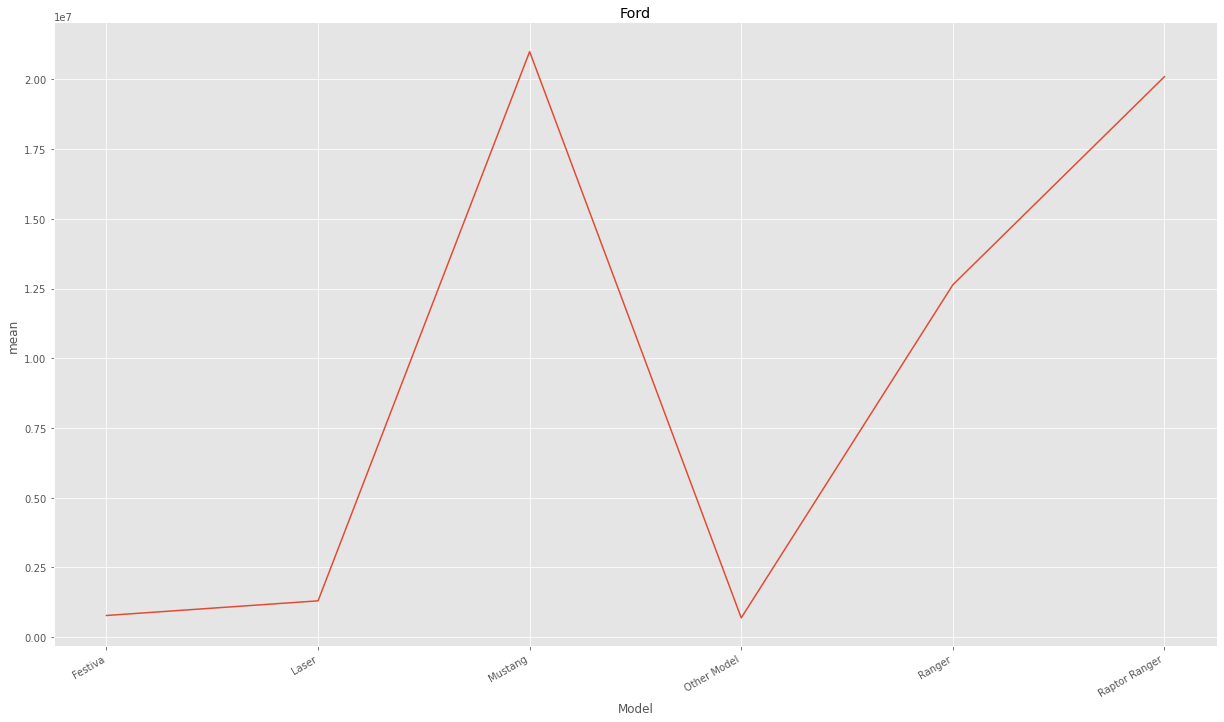

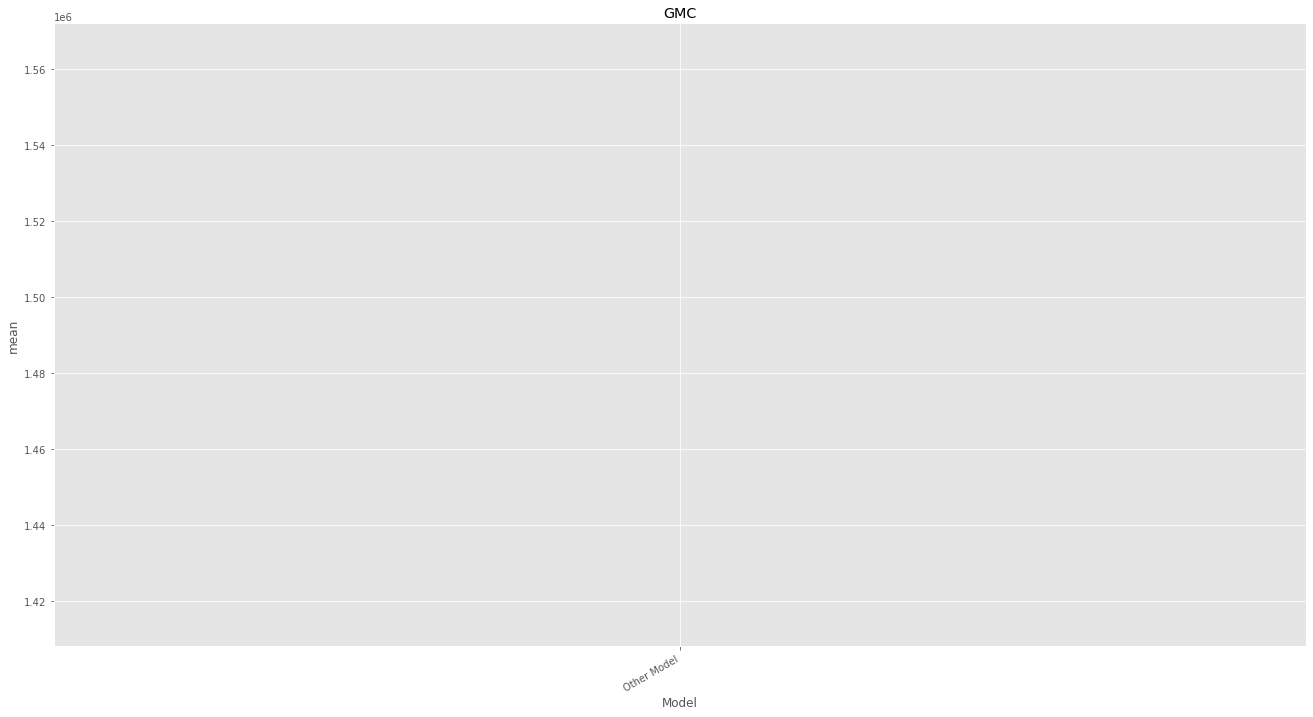

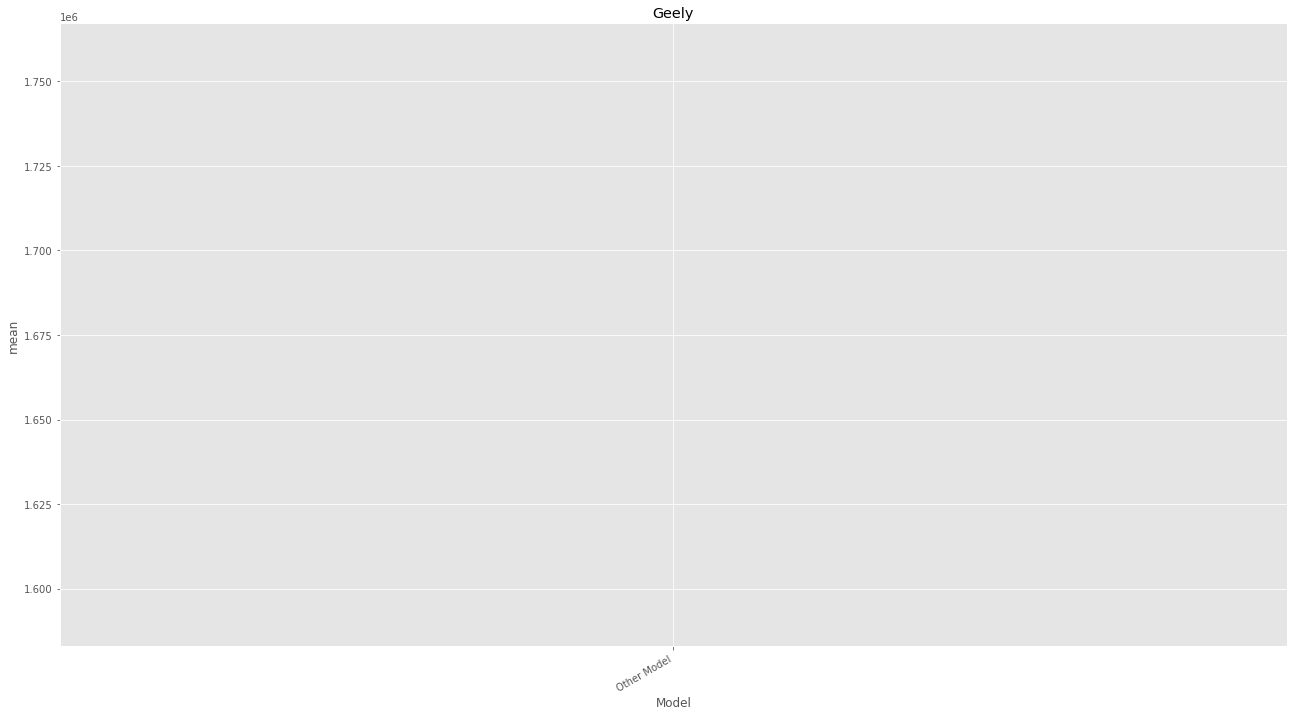

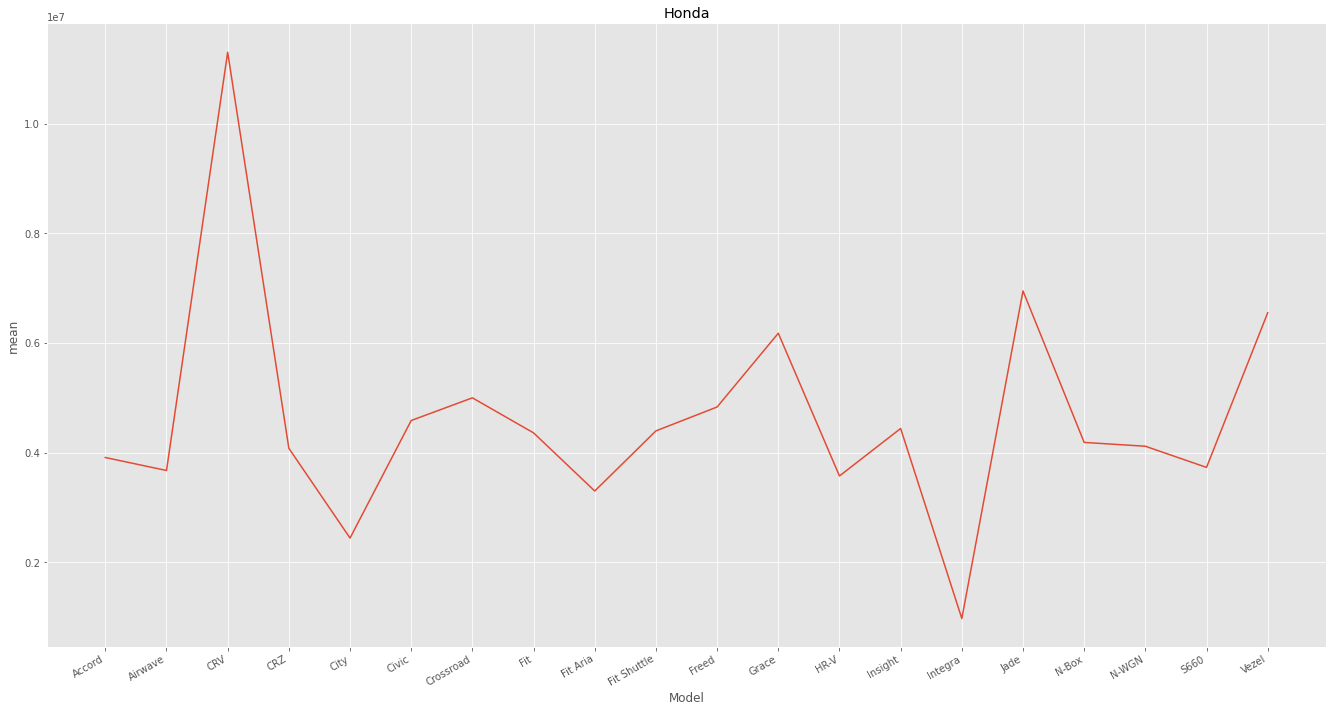

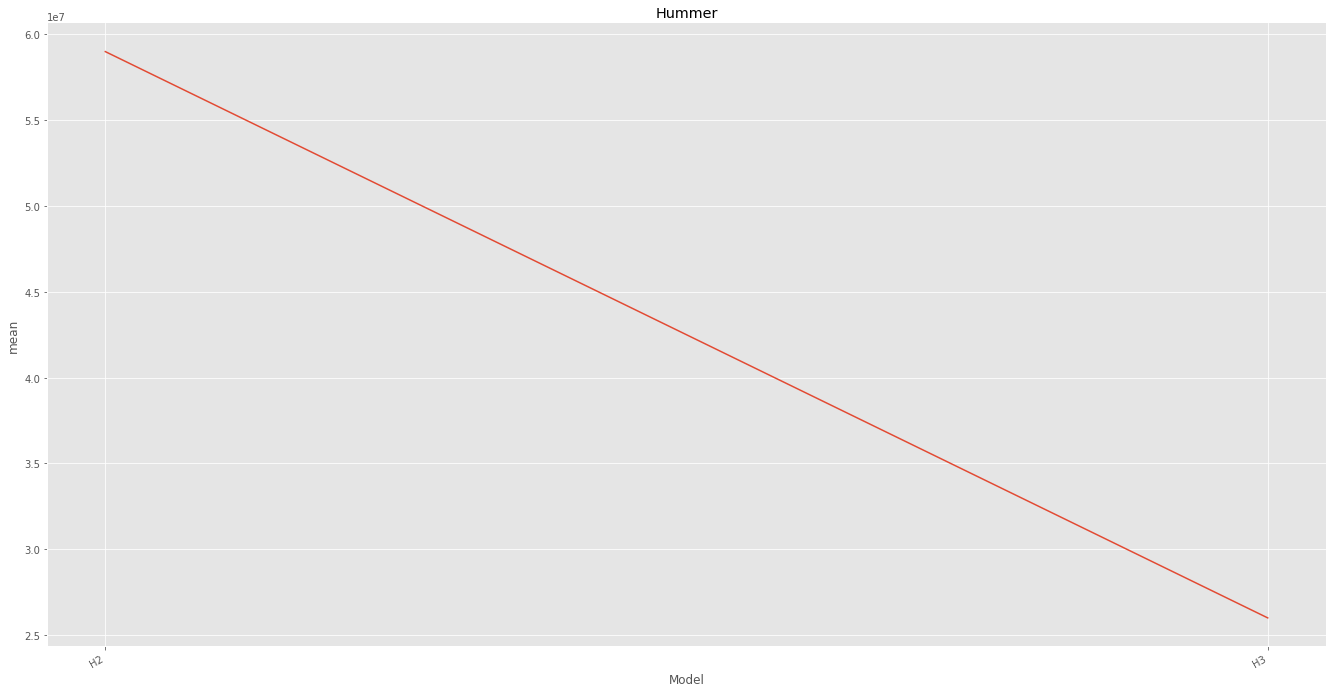

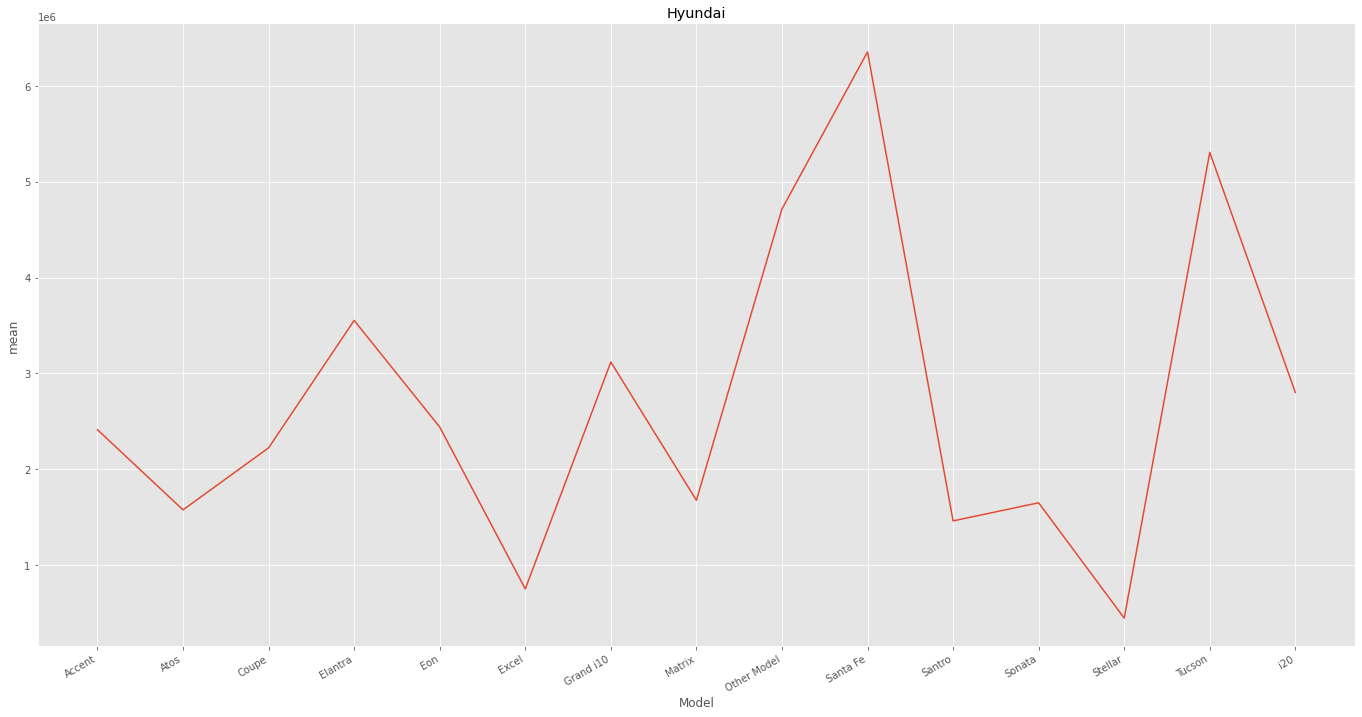

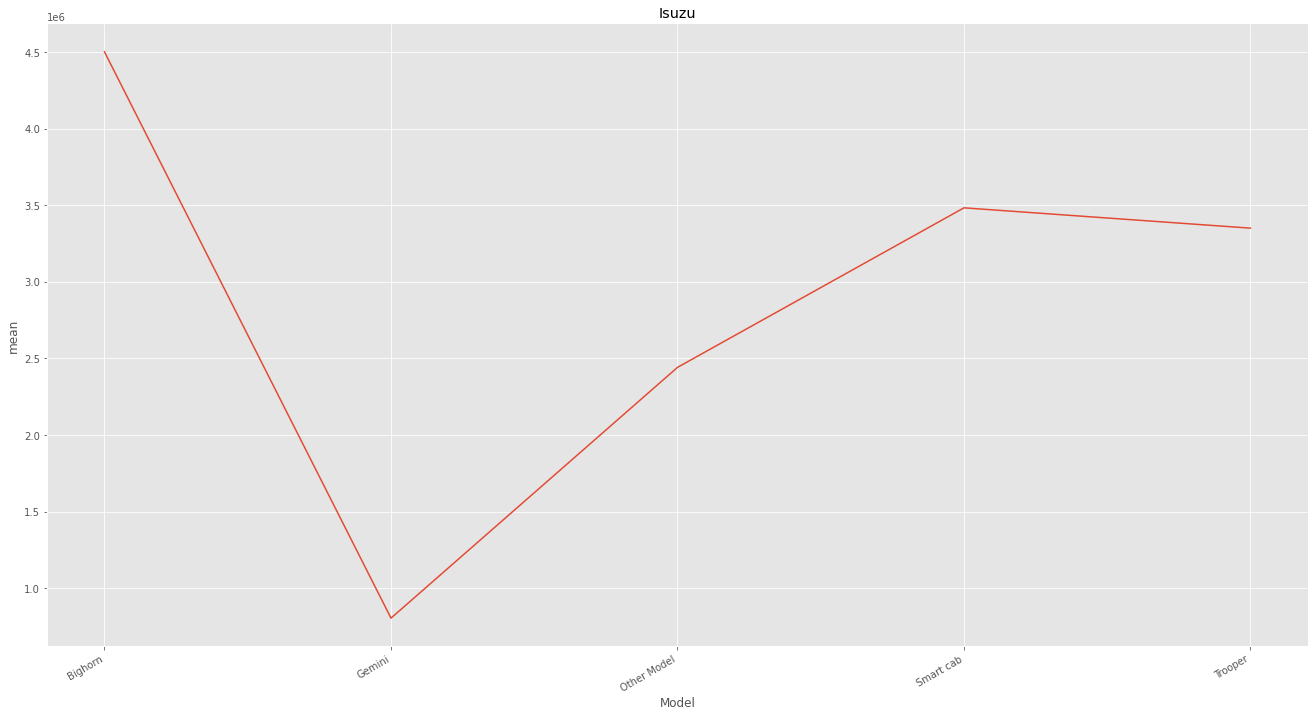

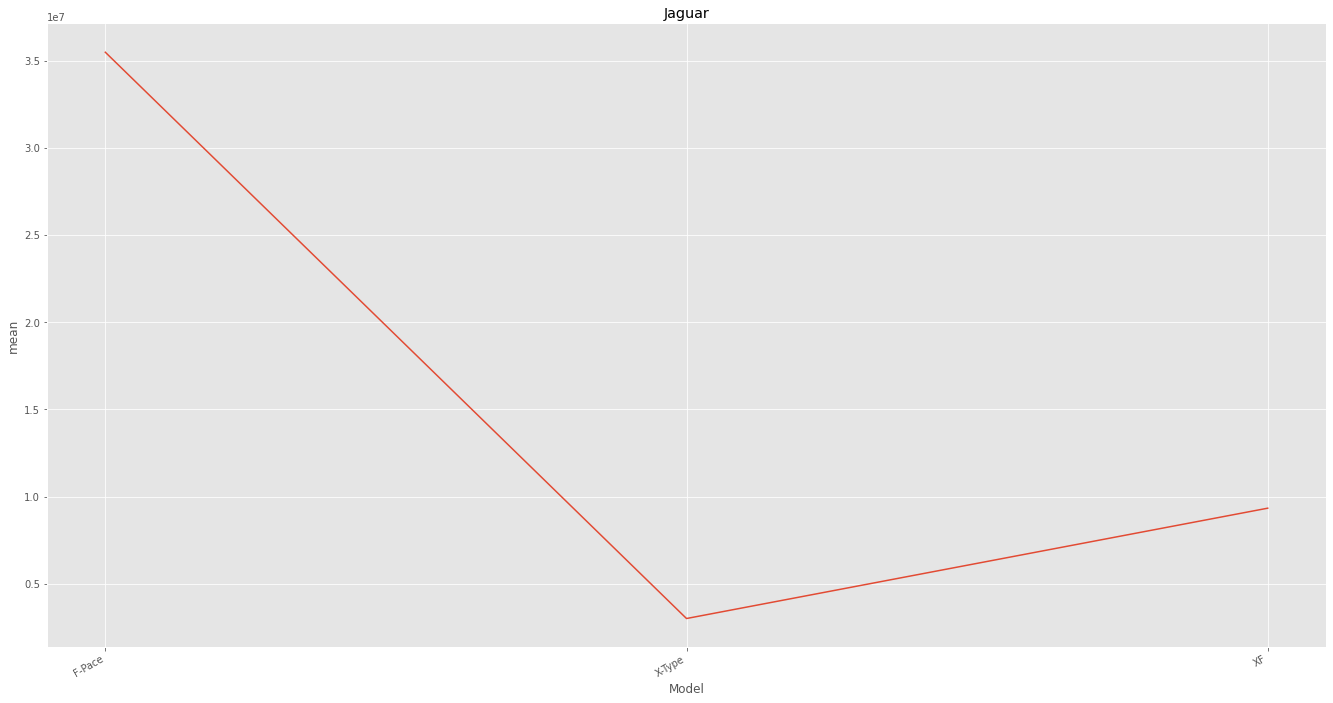

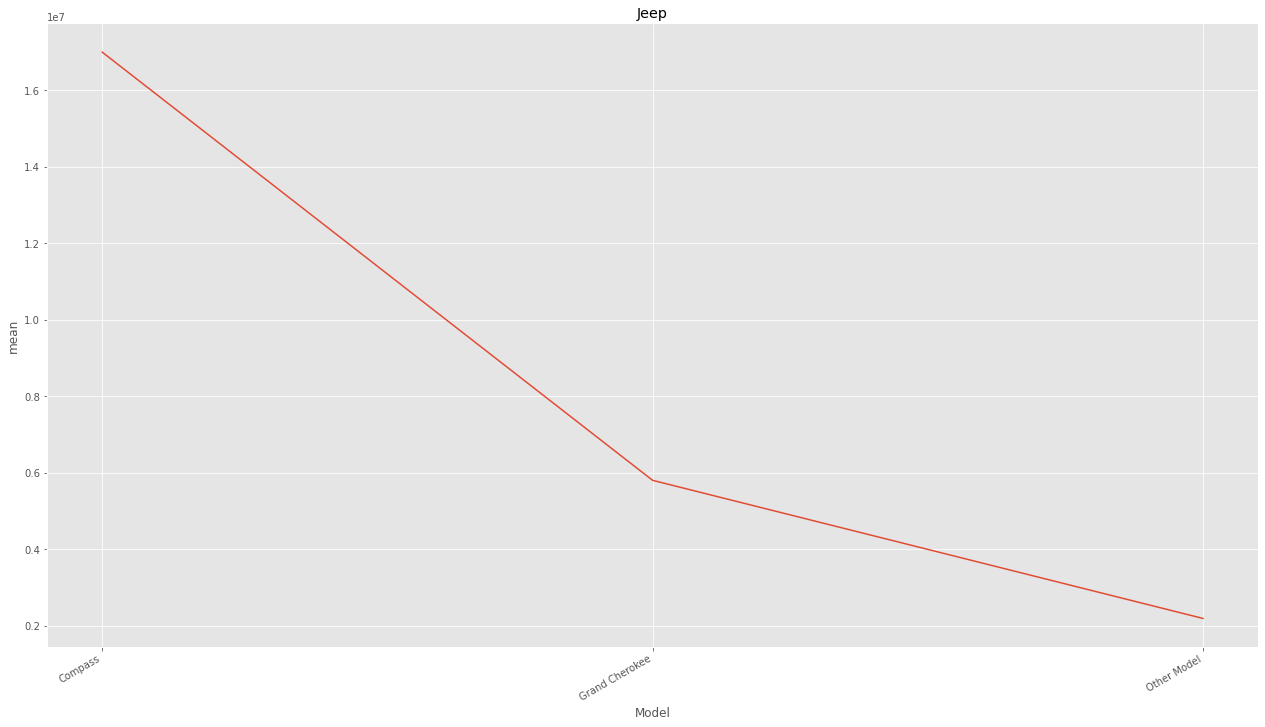

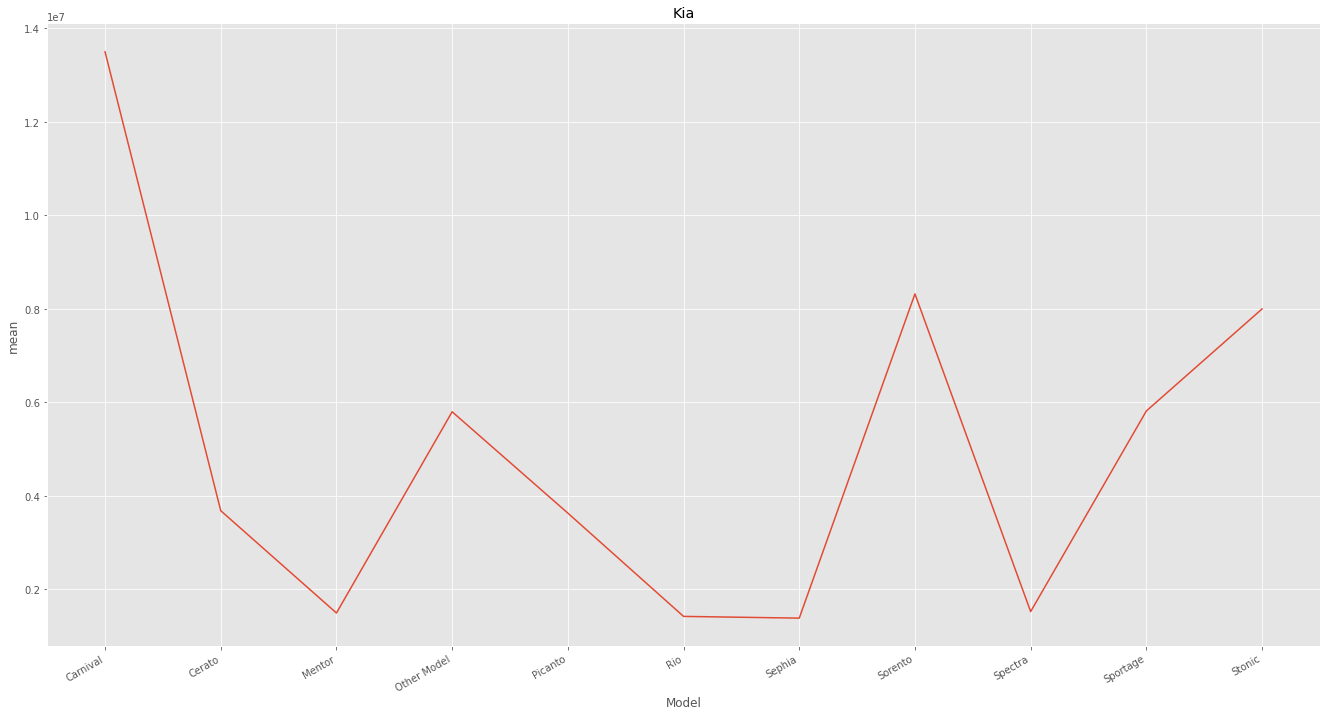

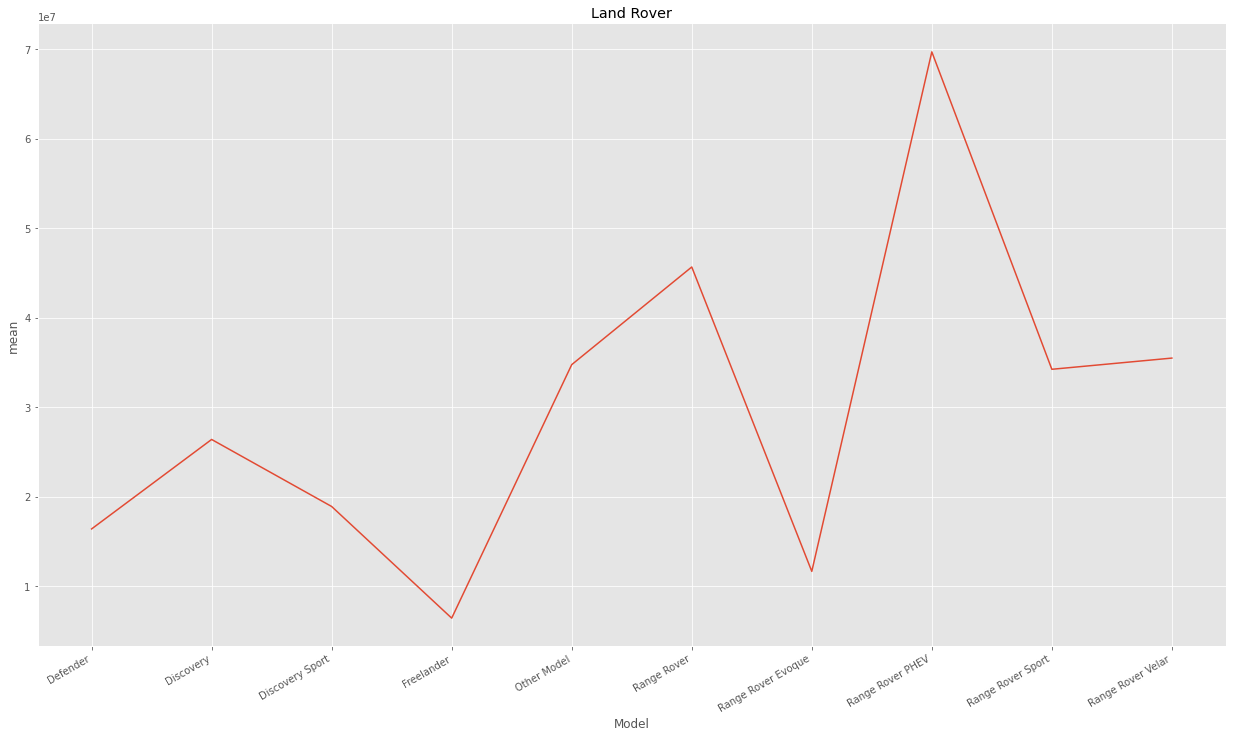

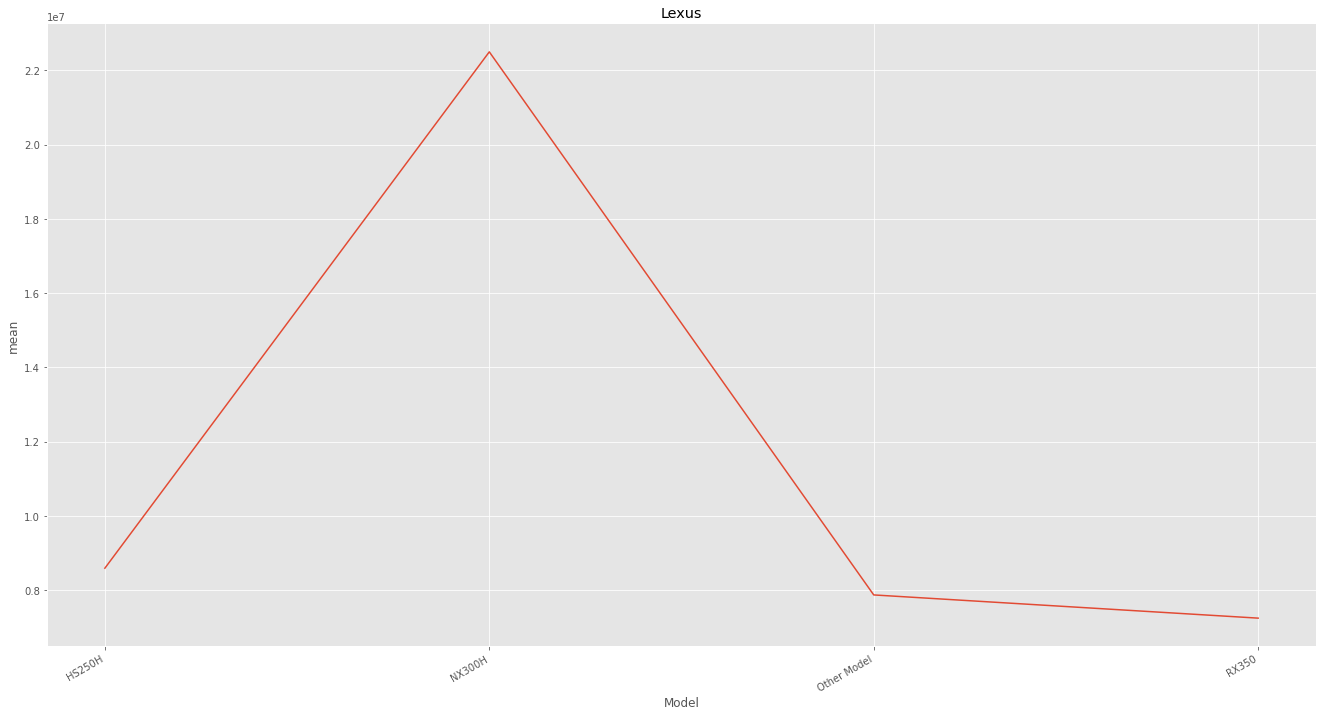

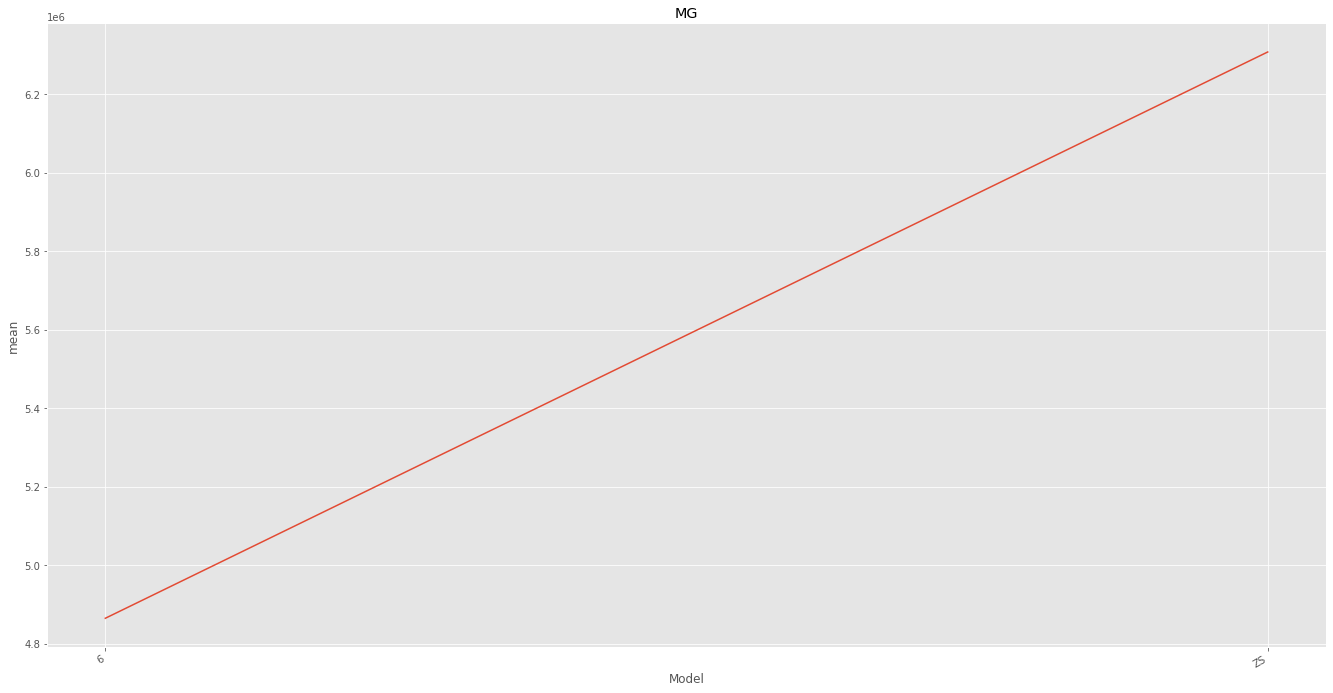

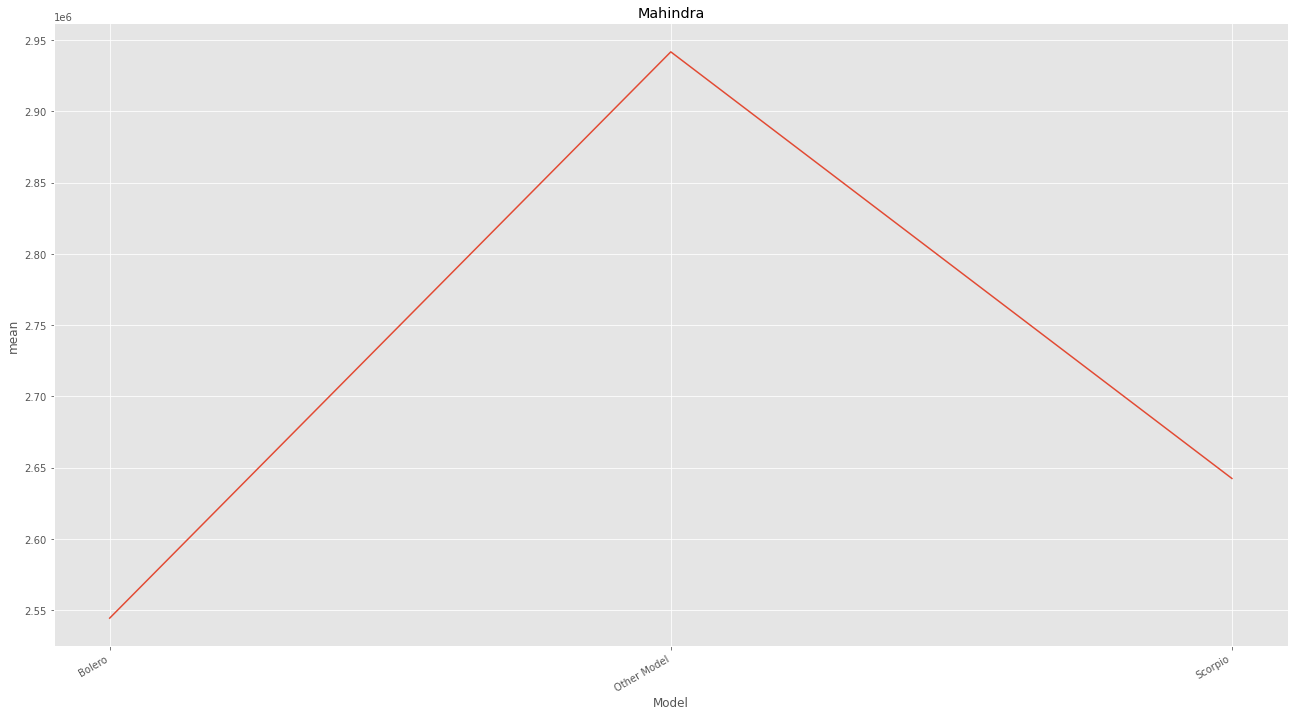

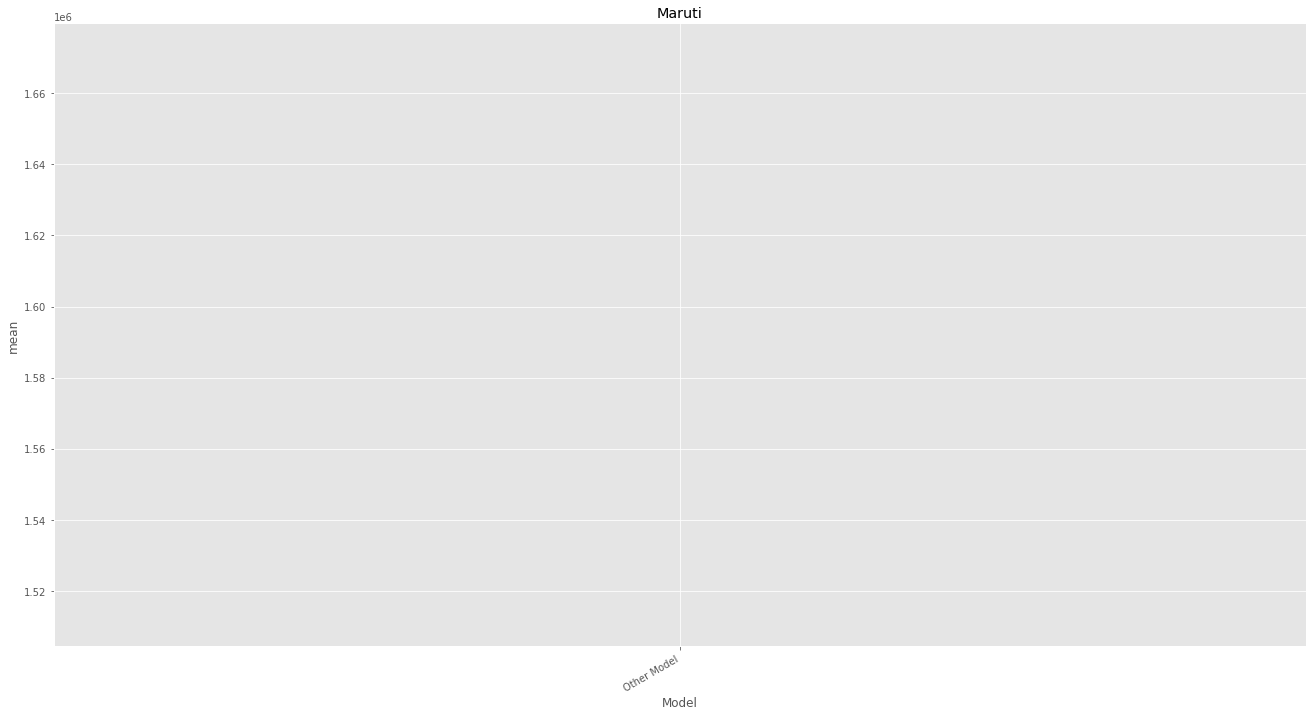

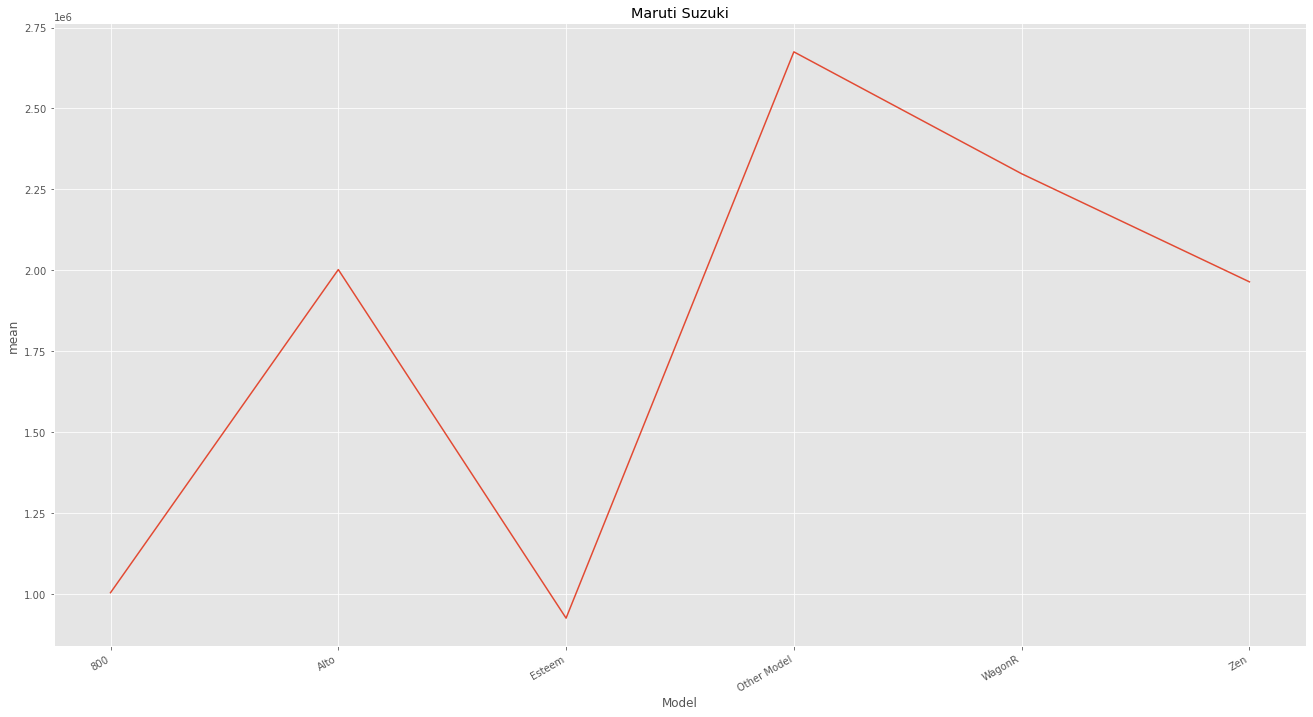

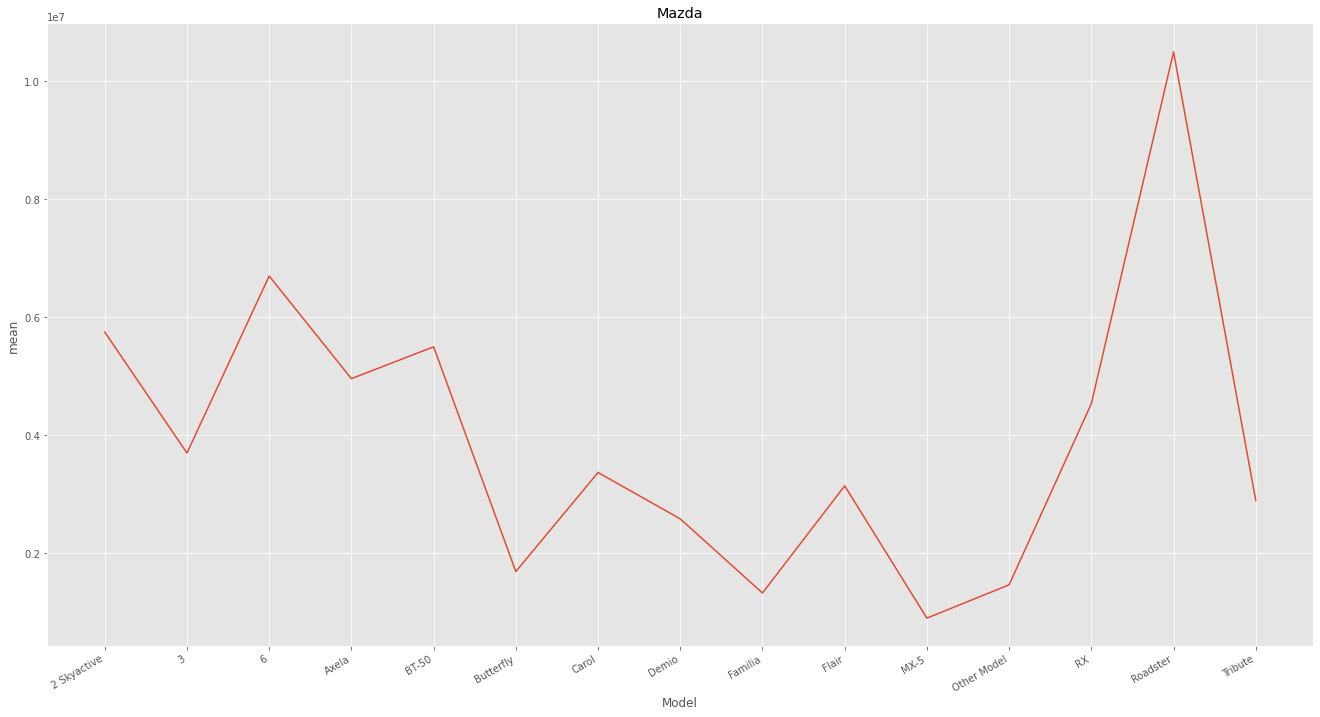

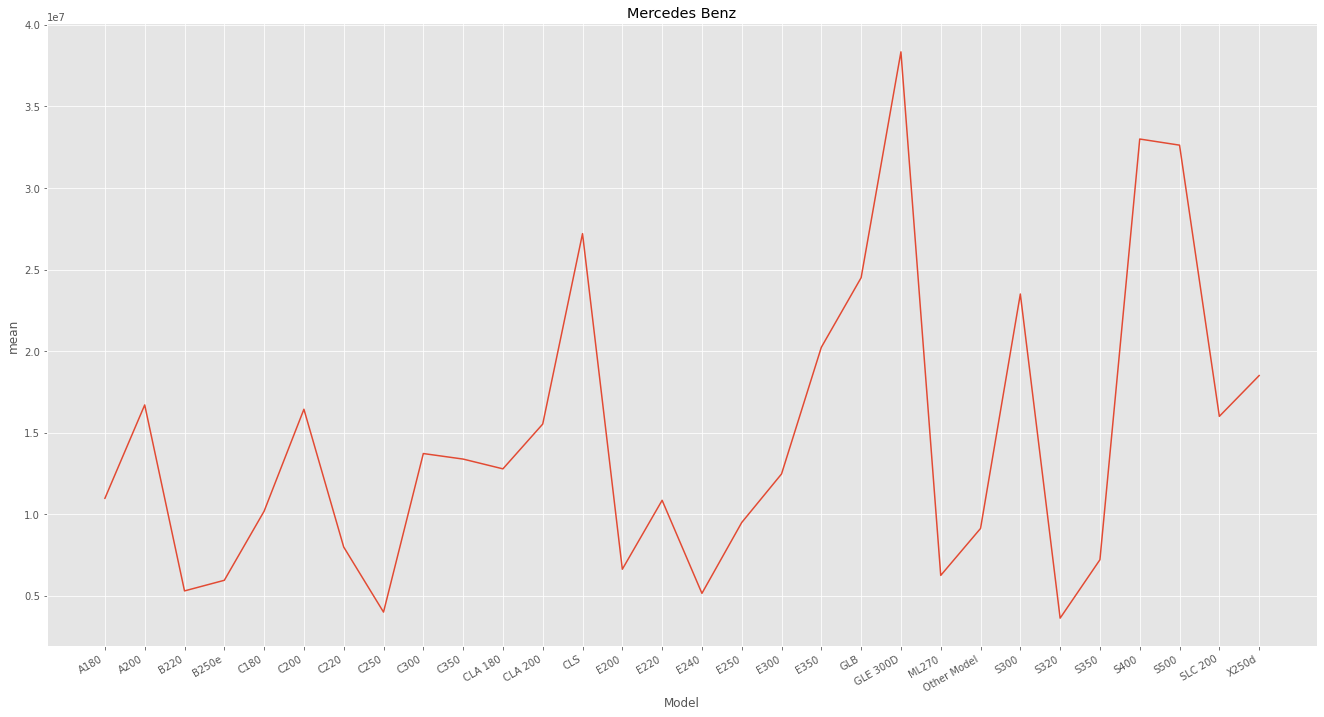

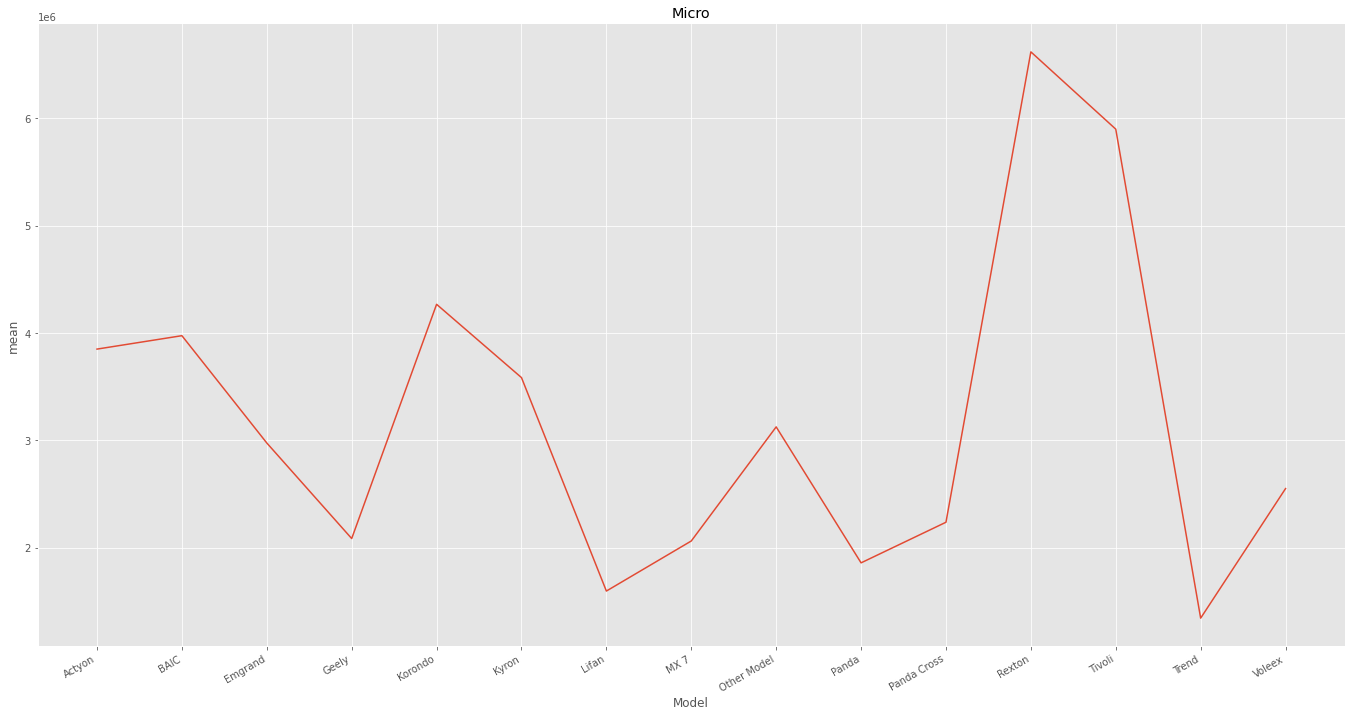

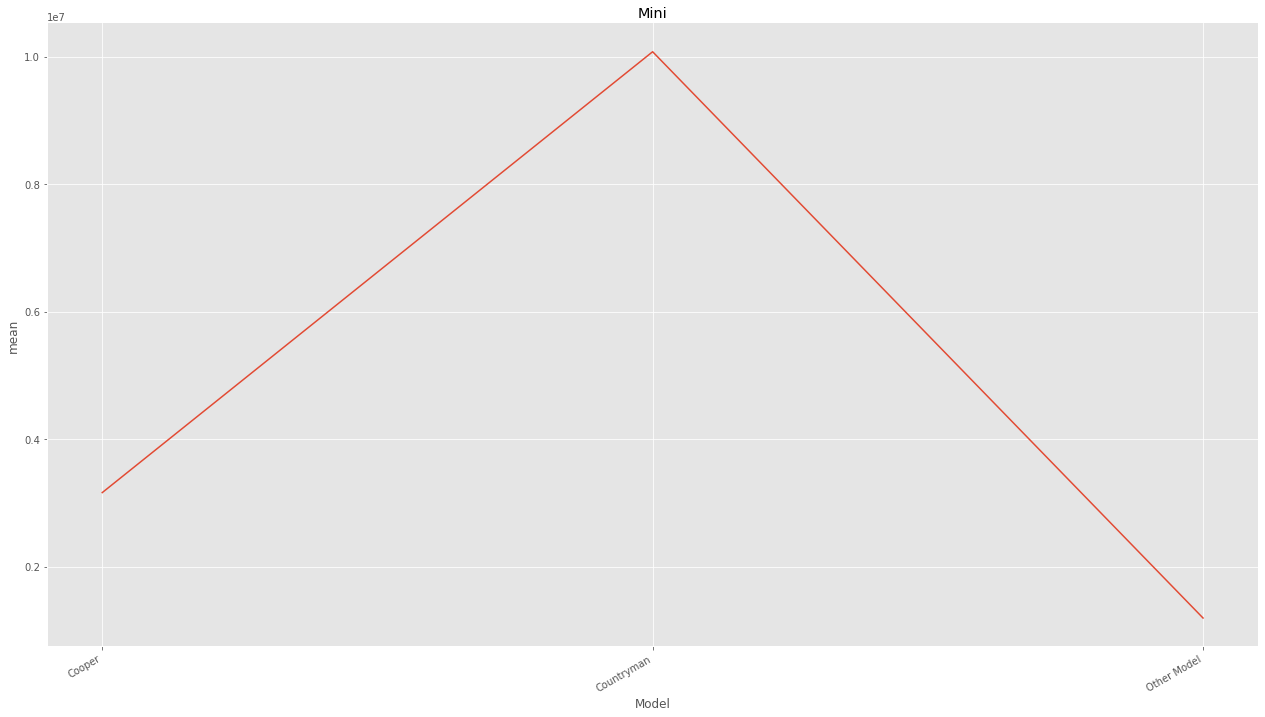

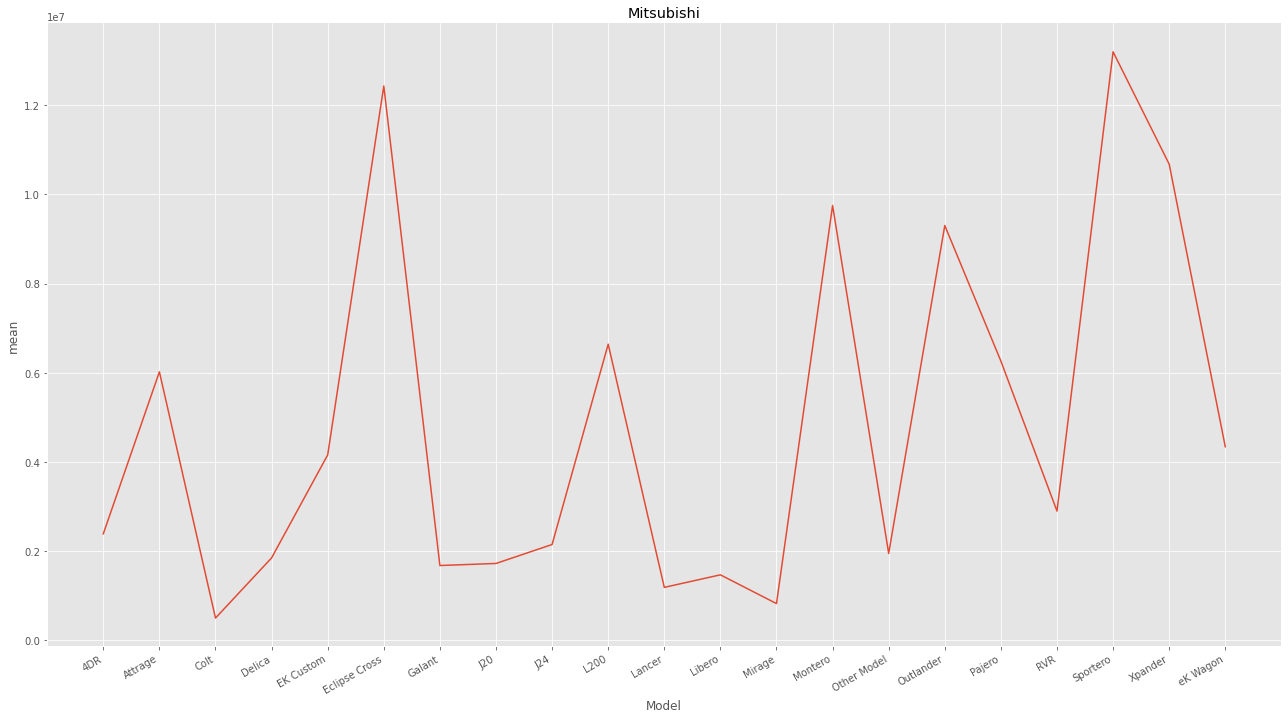

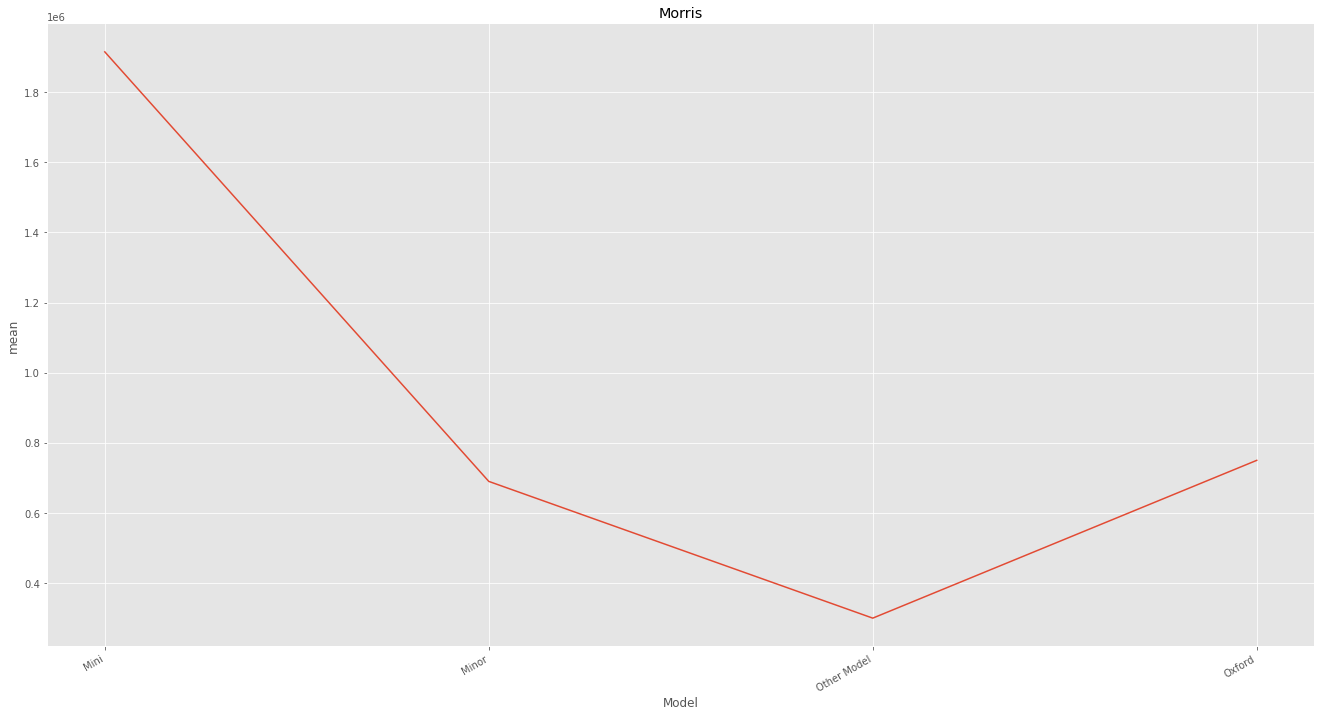

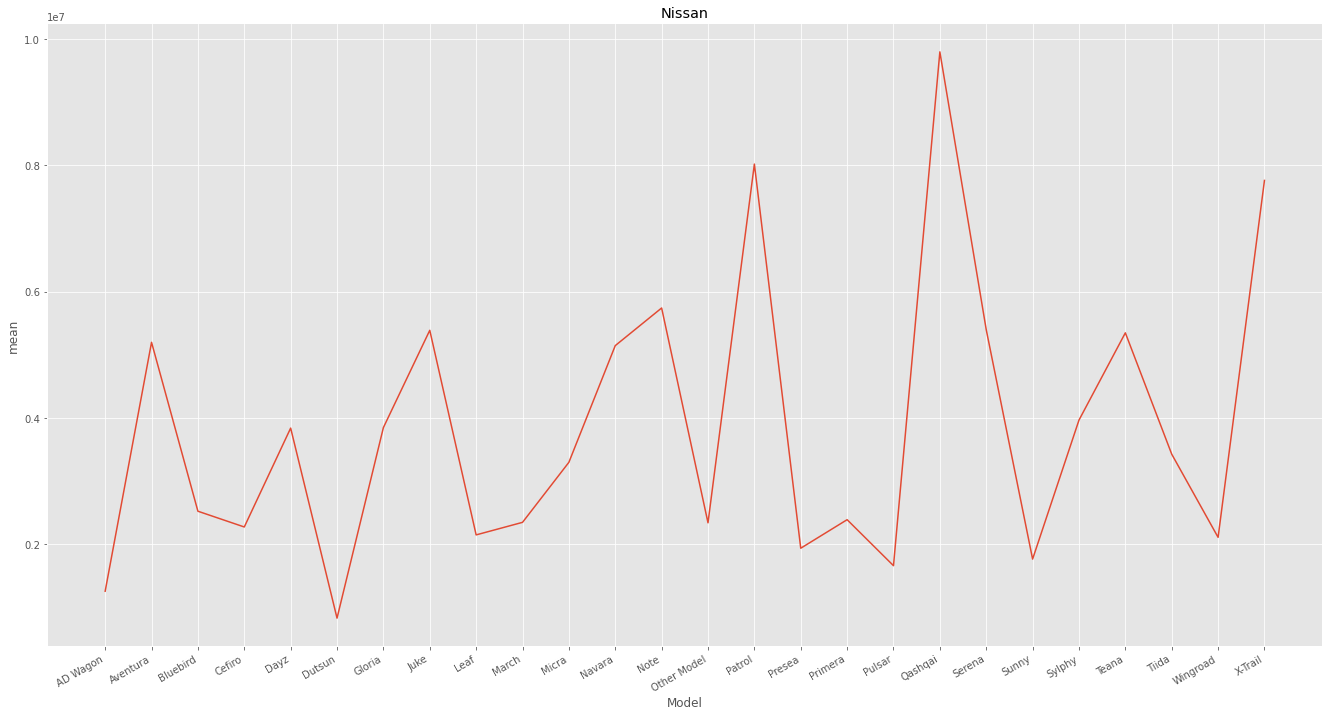

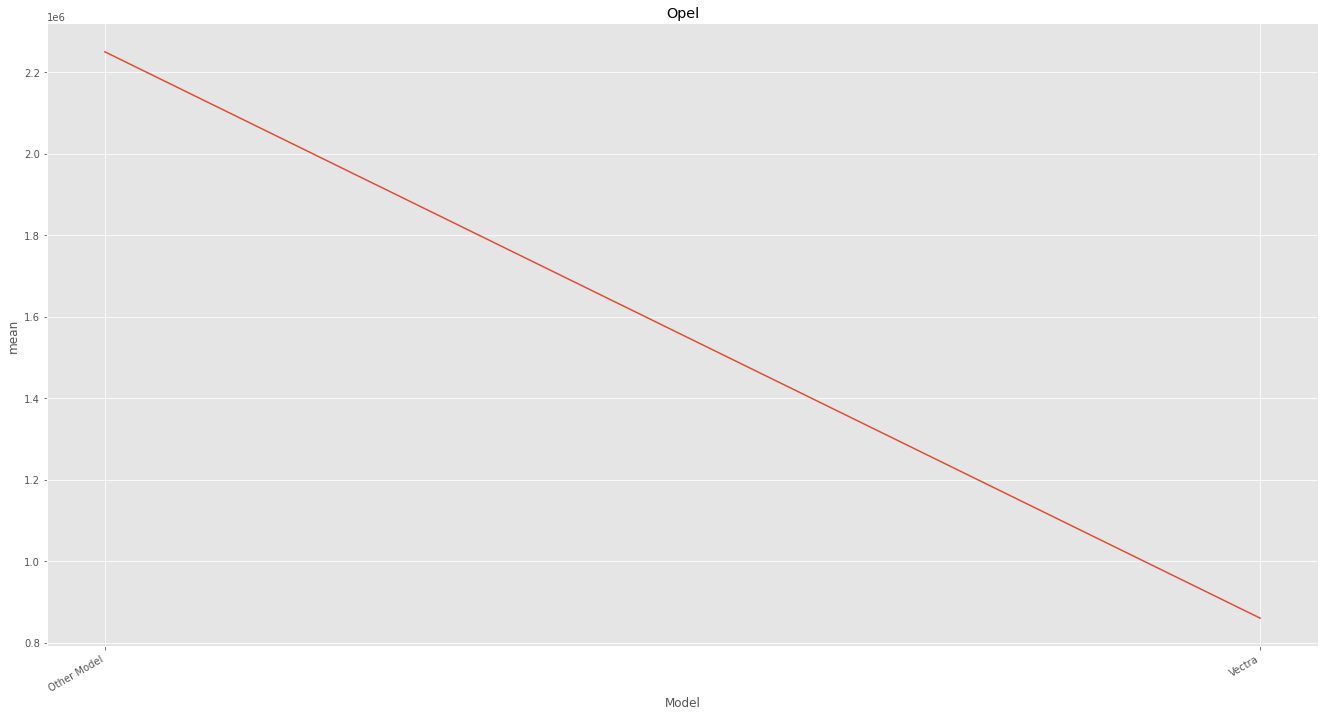

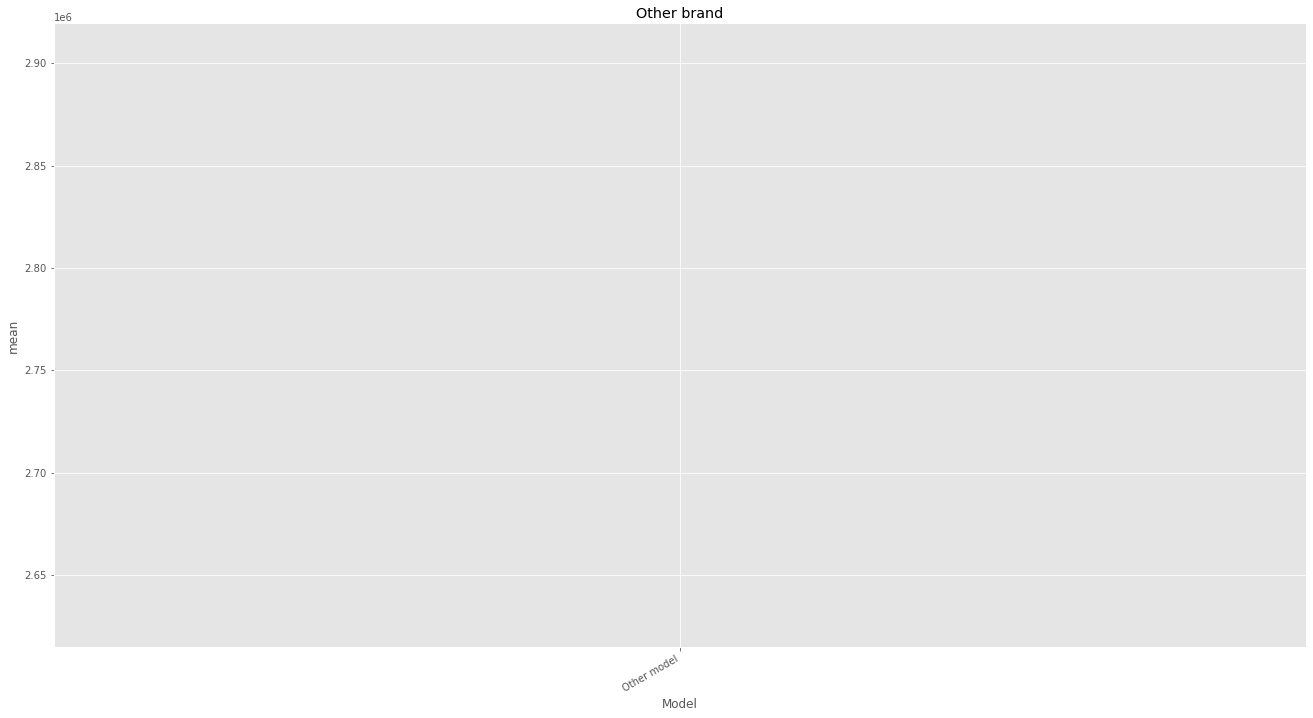

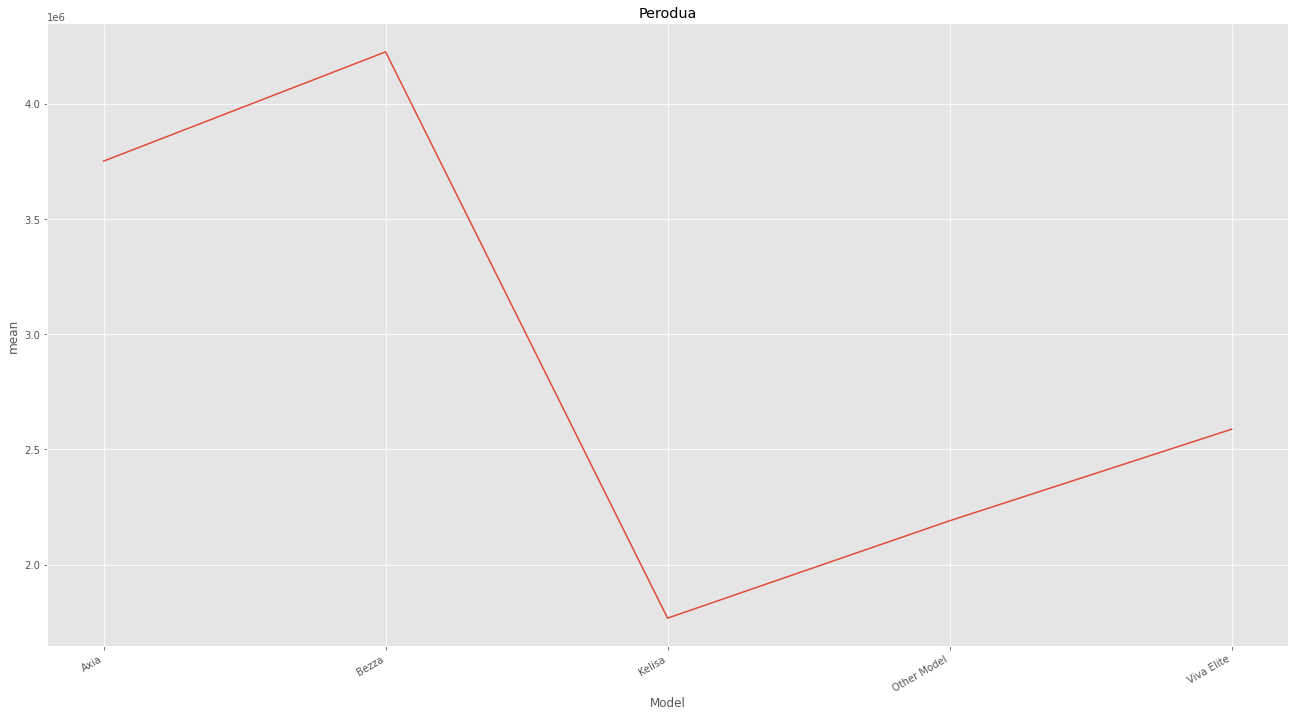

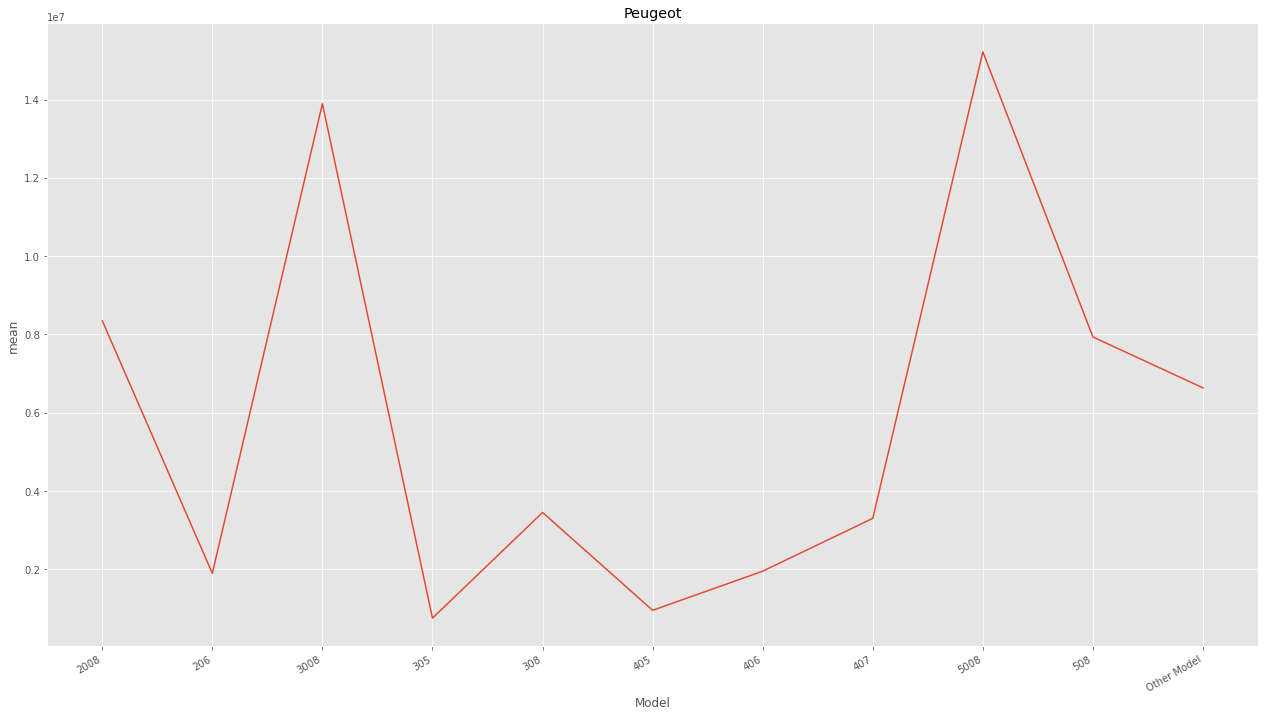

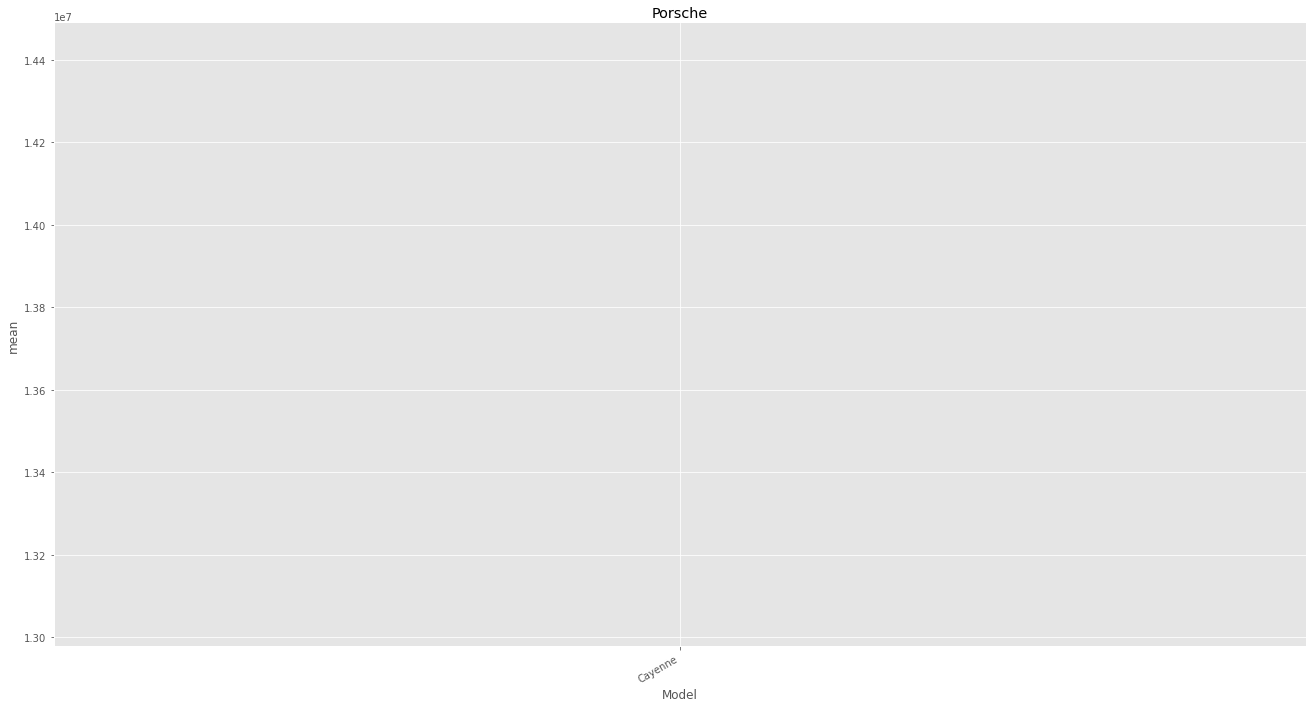

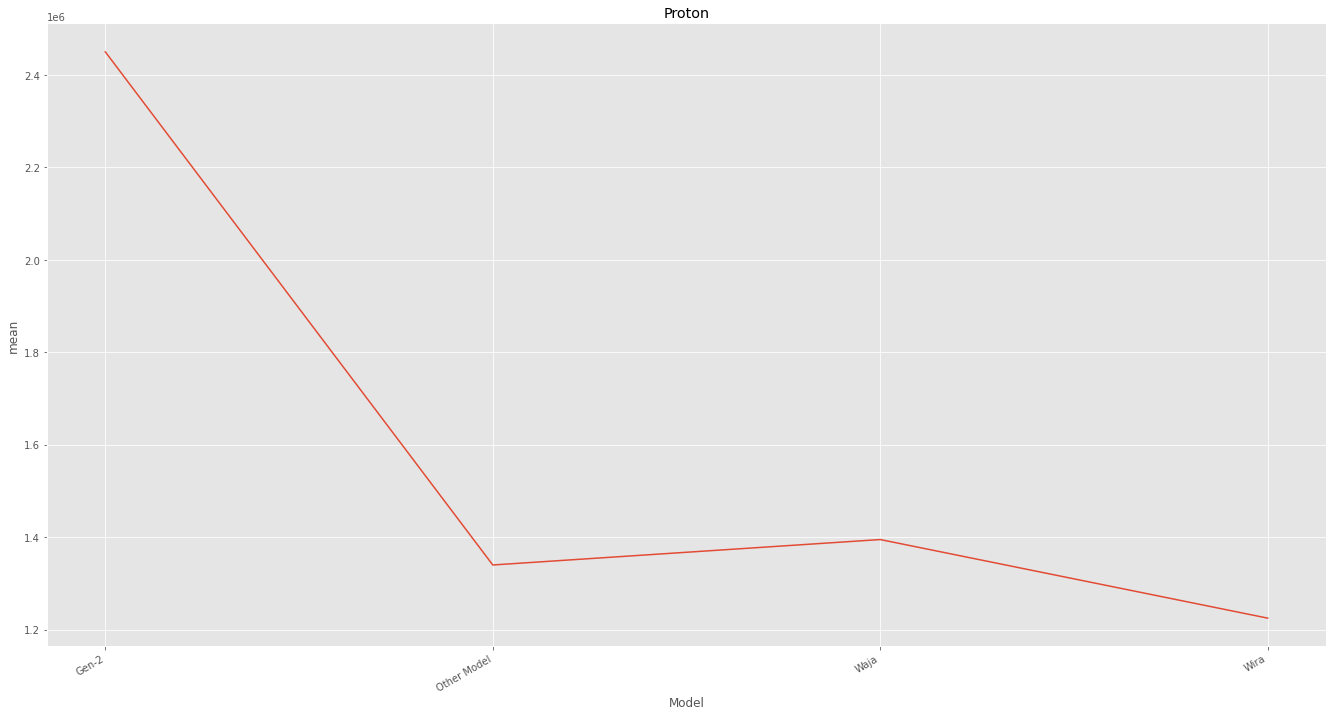

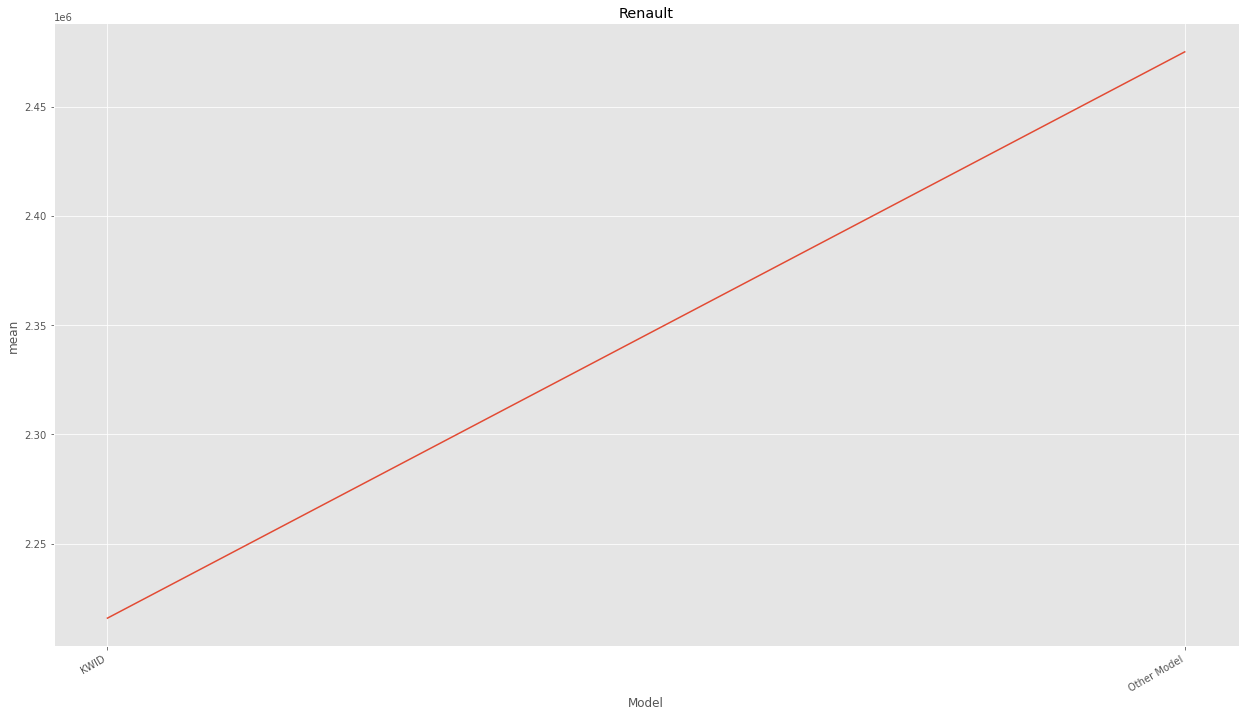

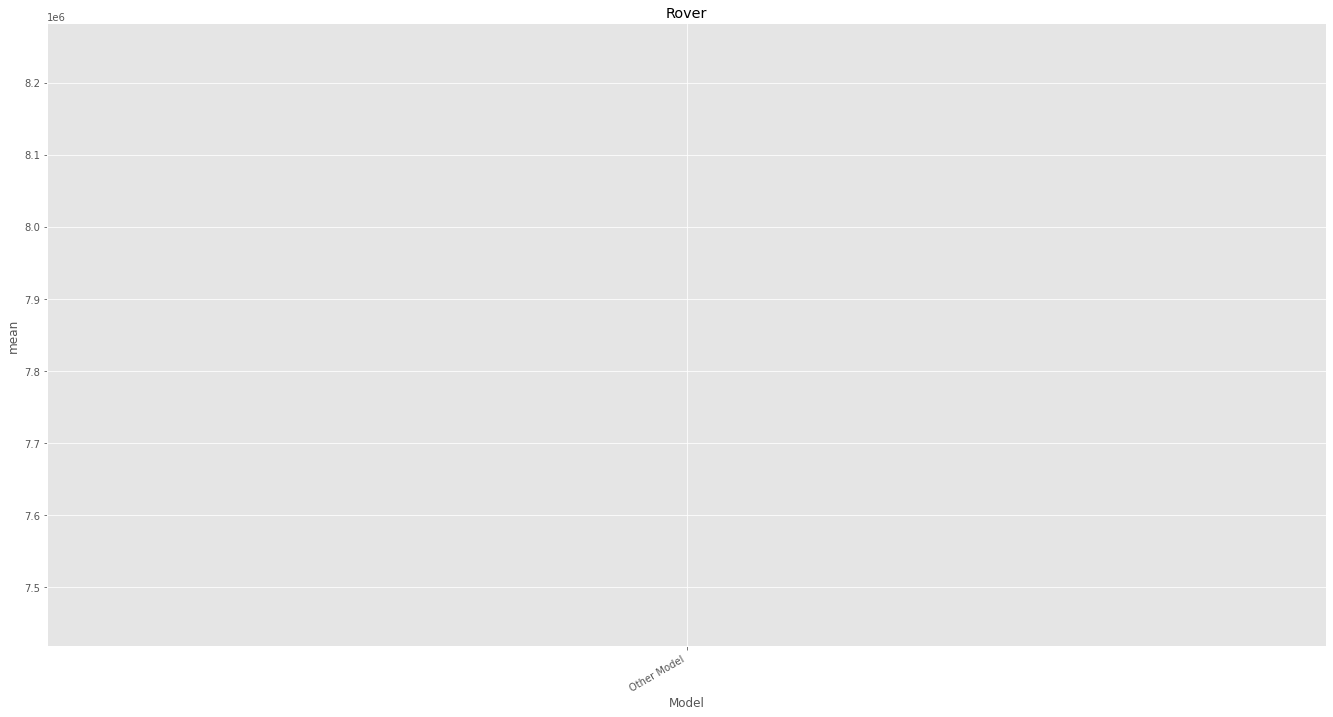

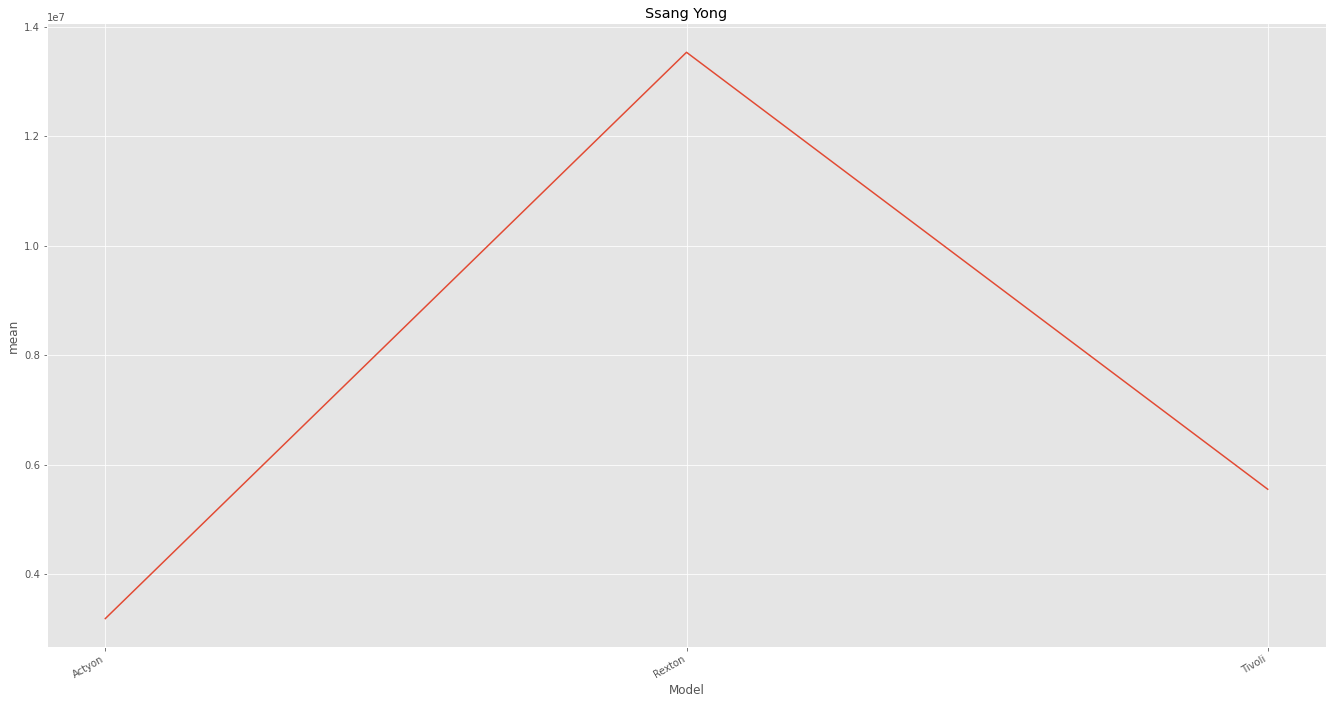

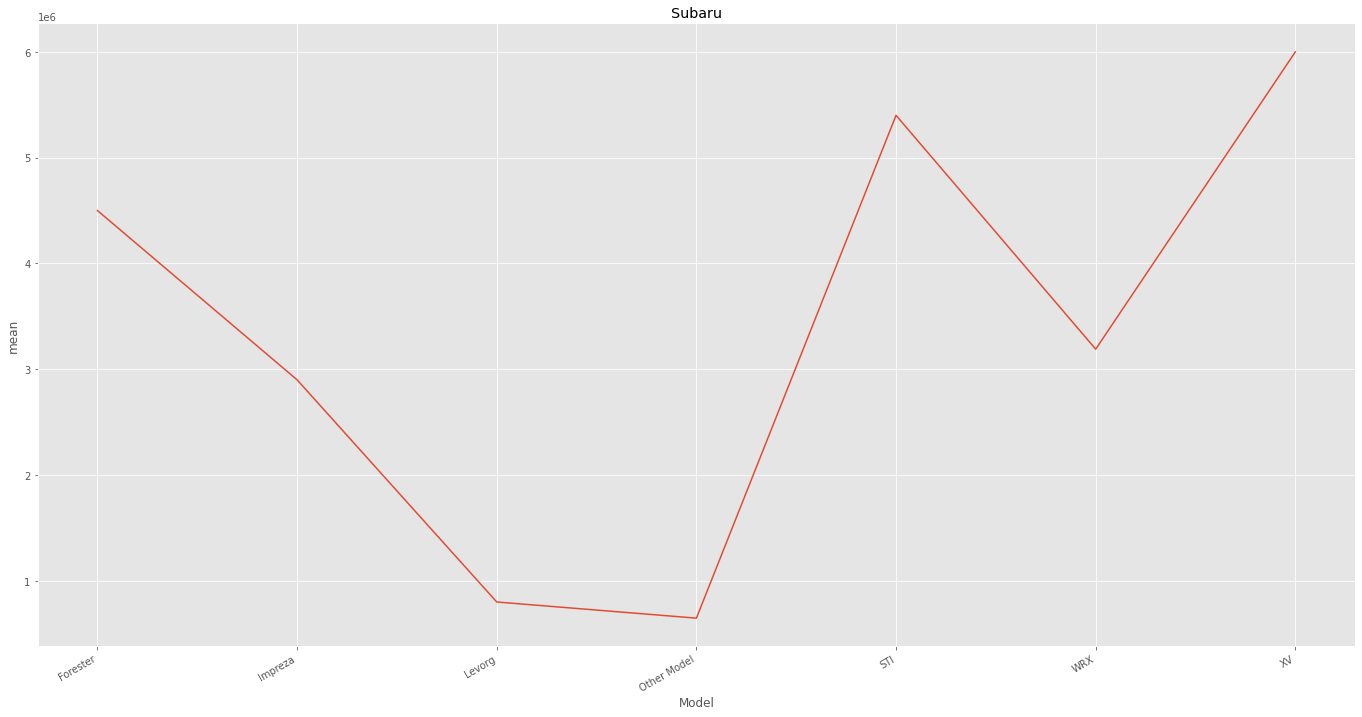

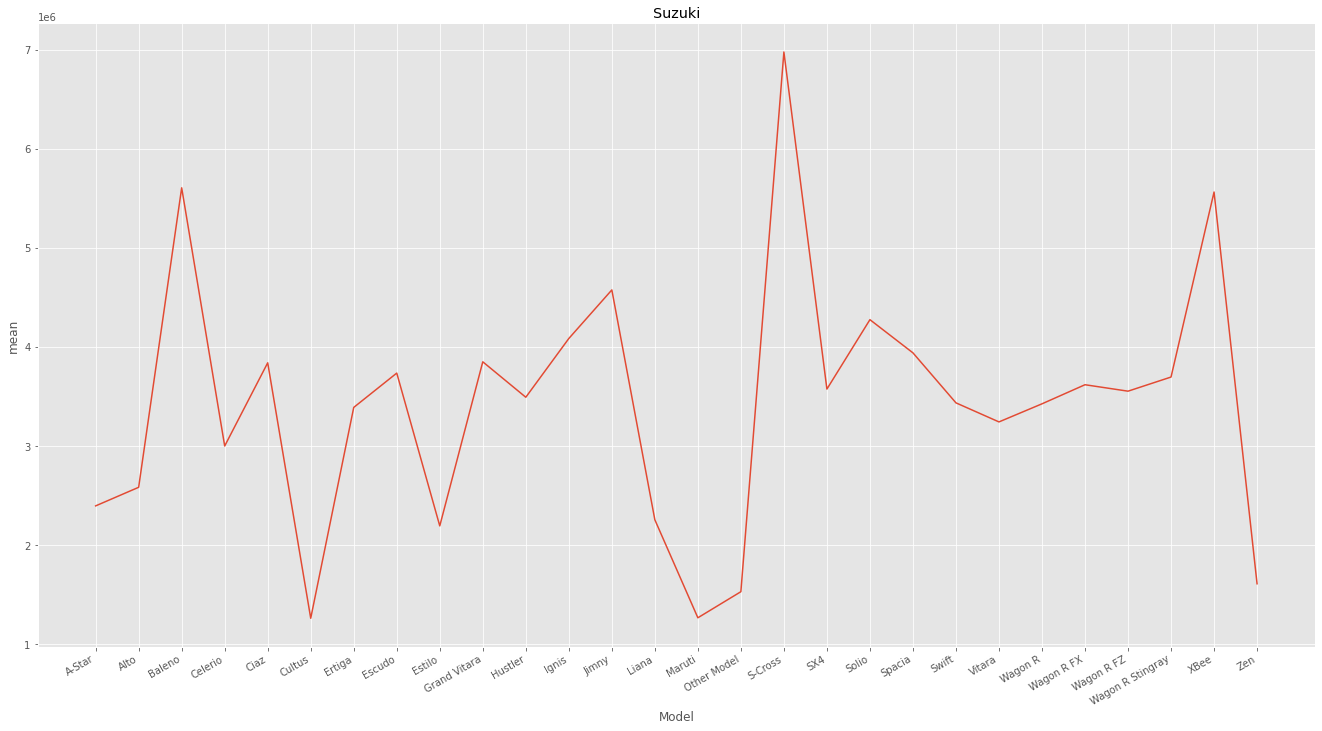

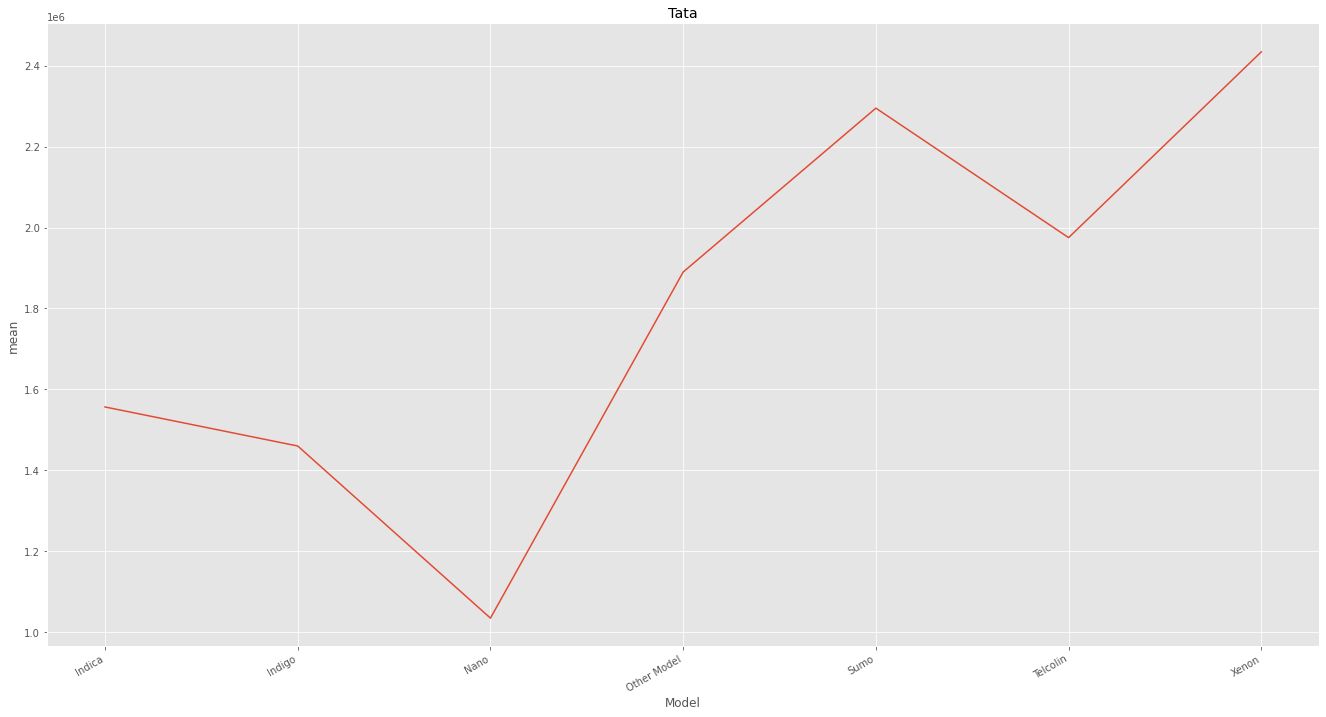

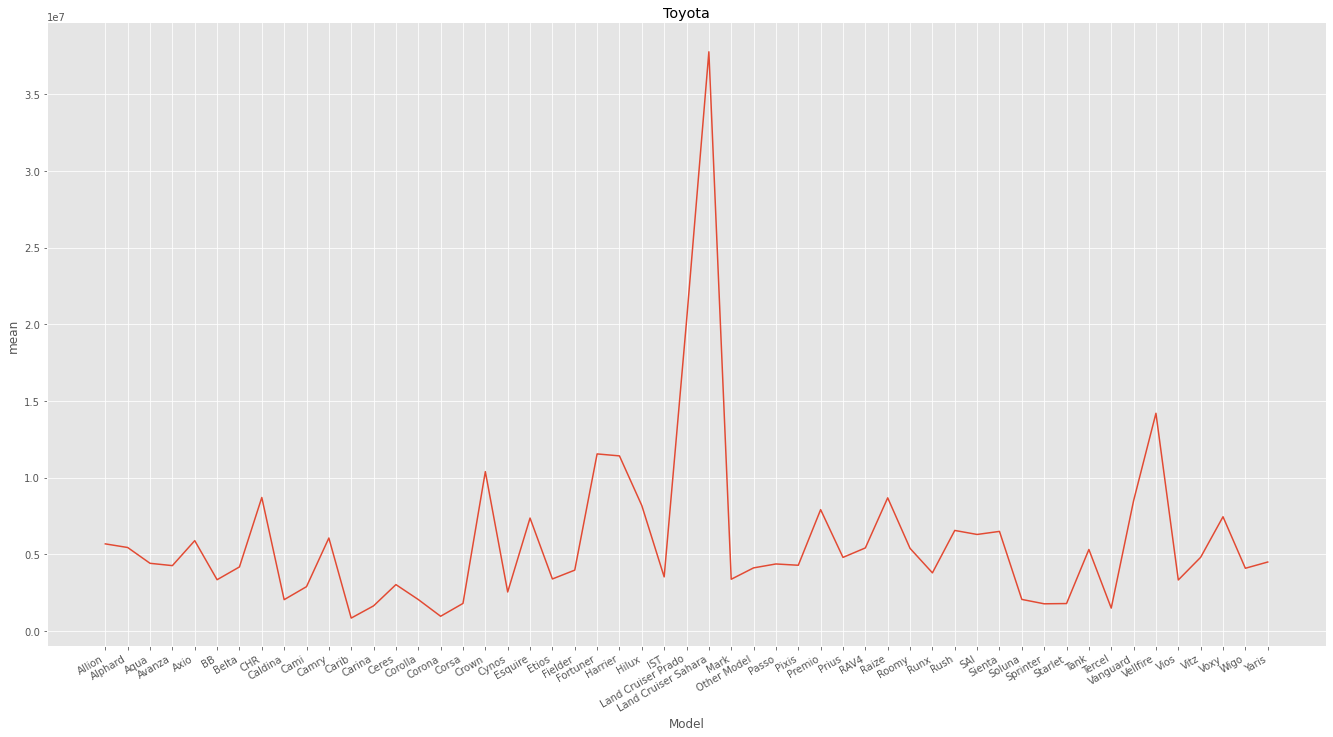

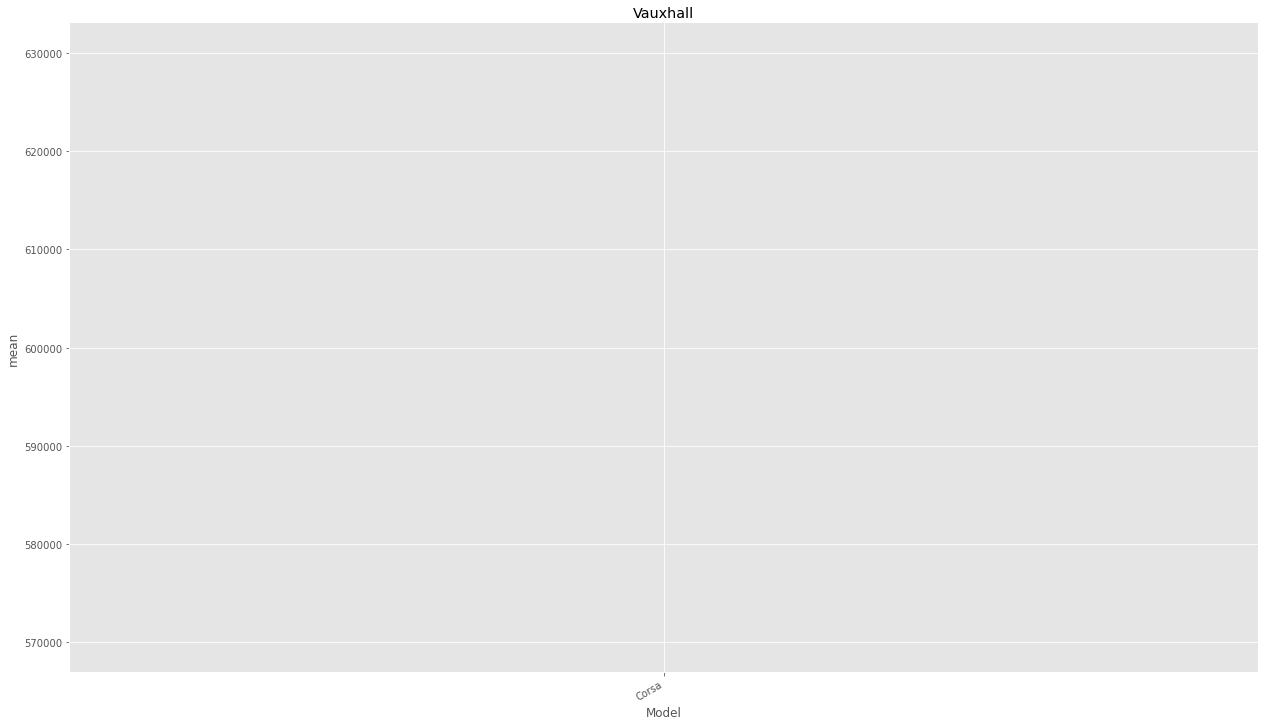

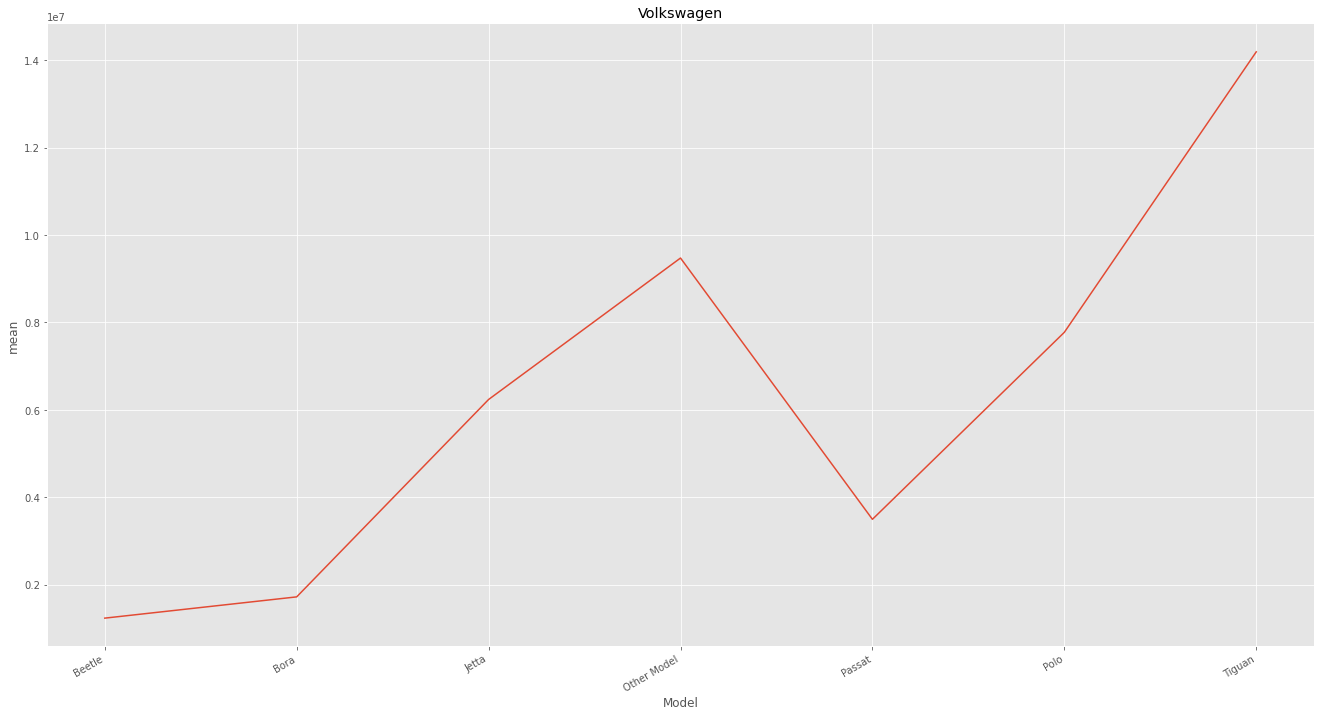

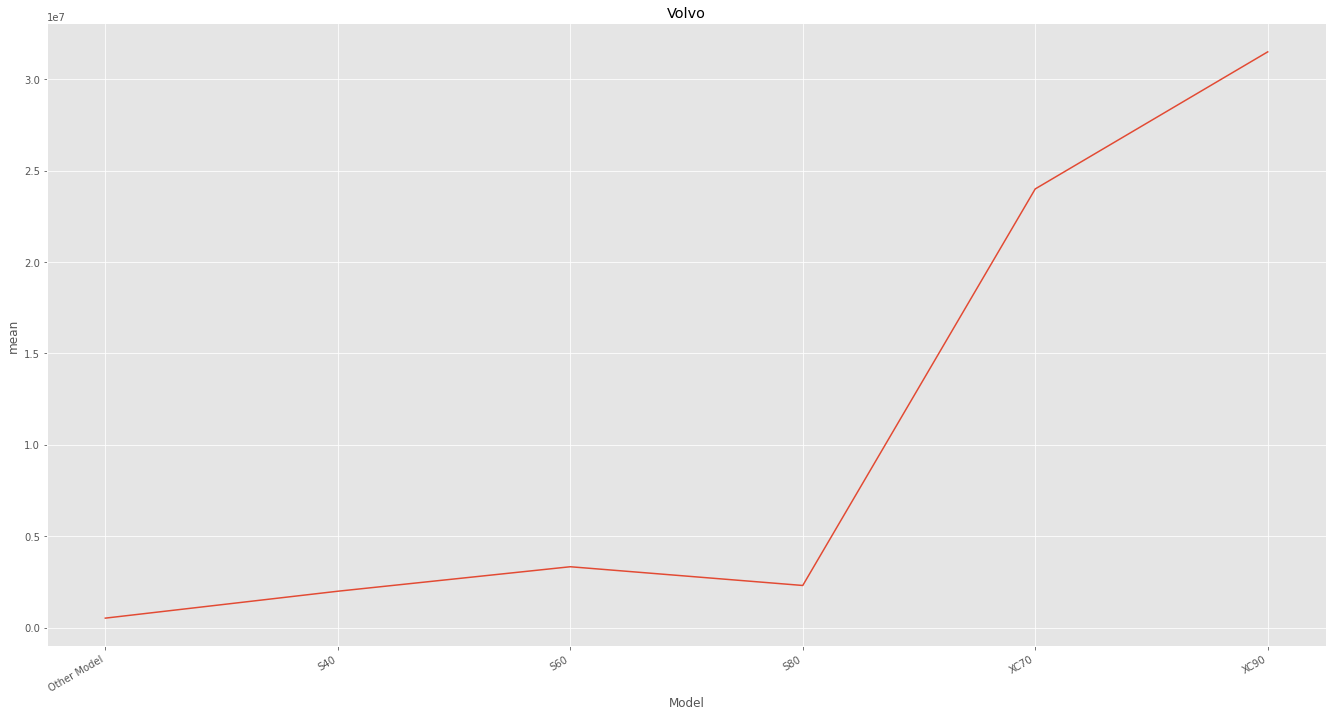

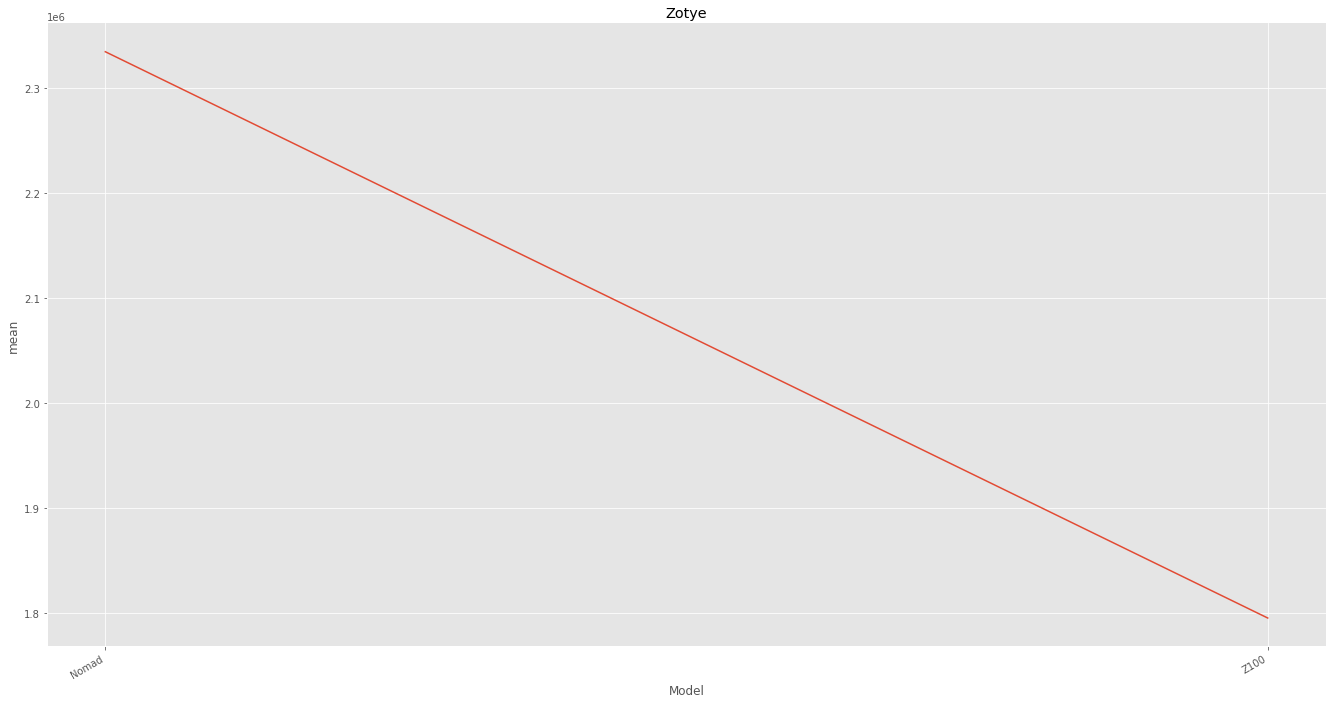

In [97]:
for brand in groupByModel.index.get_level_values('Brand').unique():
    df = groupByModel.loc[brand]
#     print(df['mean'])
    g = sns.relplot(x="Model", y="mean", markers=True, kind="line", data=df).set(title=brand)
    g.fig.autofmt_xdate()
    g.fig.set_figwidth(20.27)
    g.fig.set_figheight(11.7)

    

In [80]:
brand_list = list(vehicle_data['Brand'].unique())

/home/d5han/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


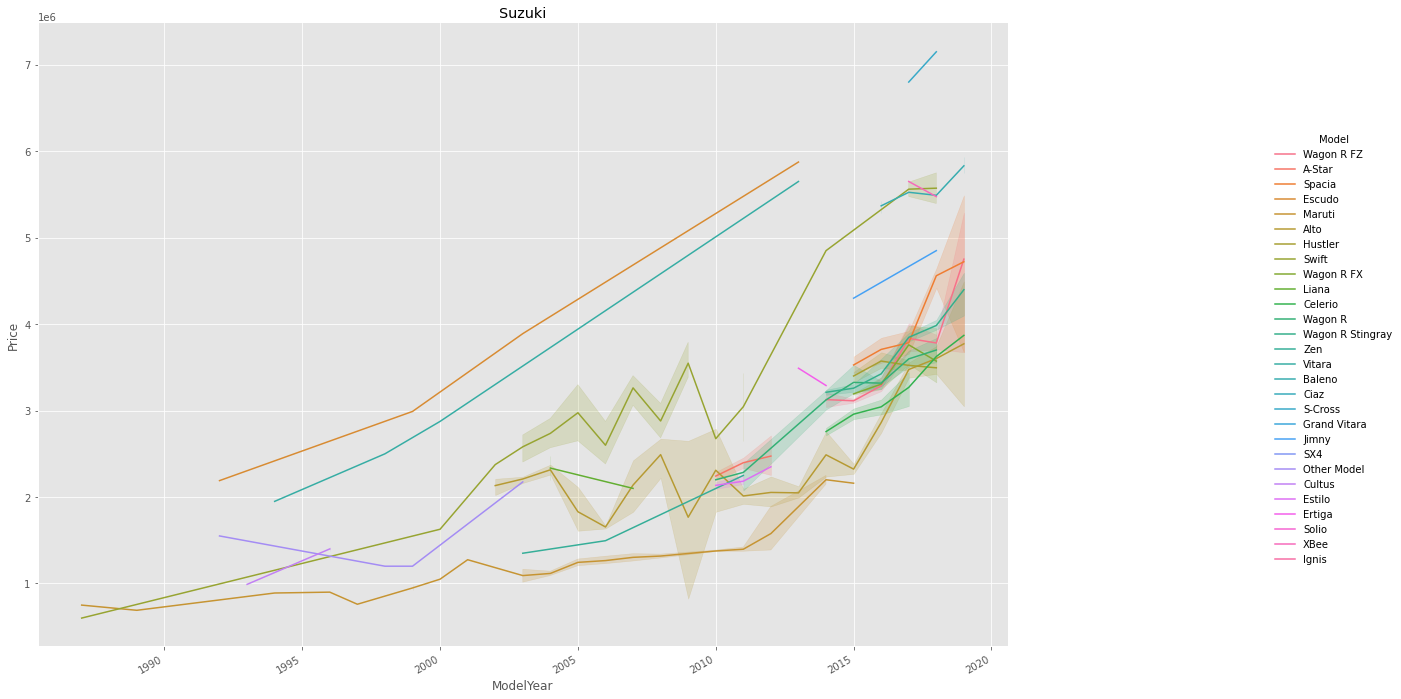

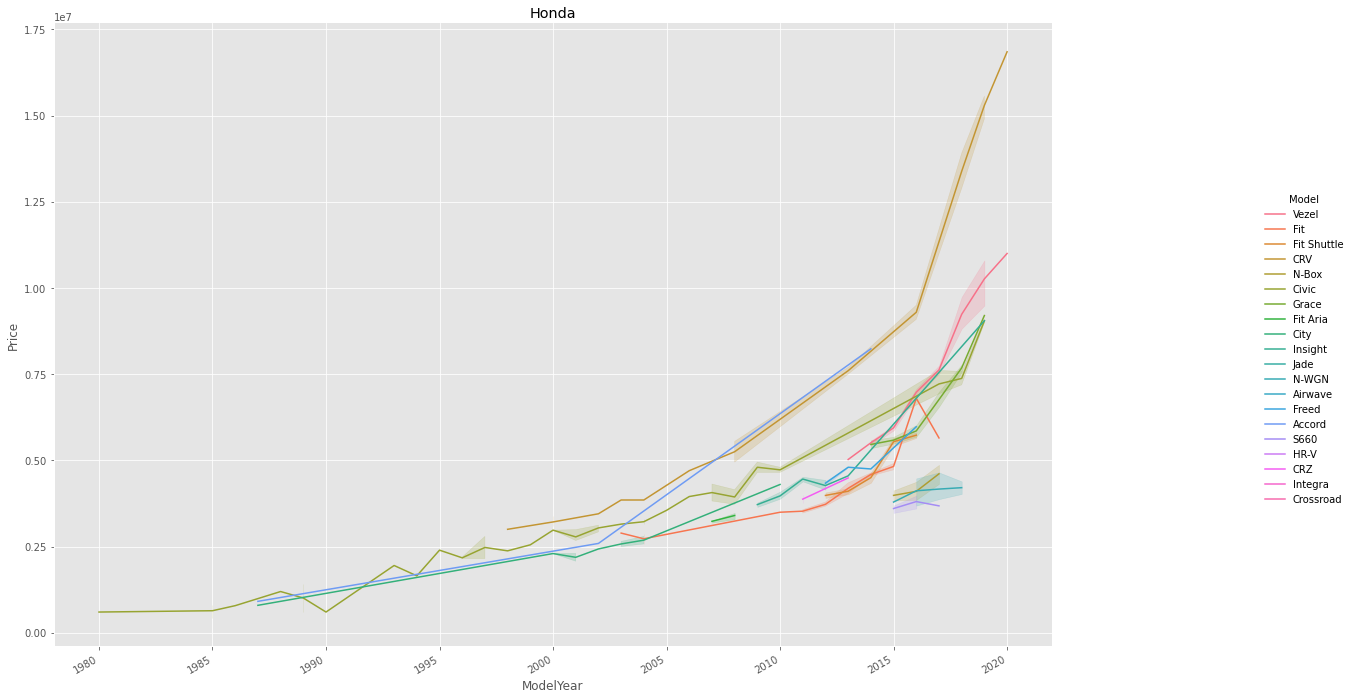

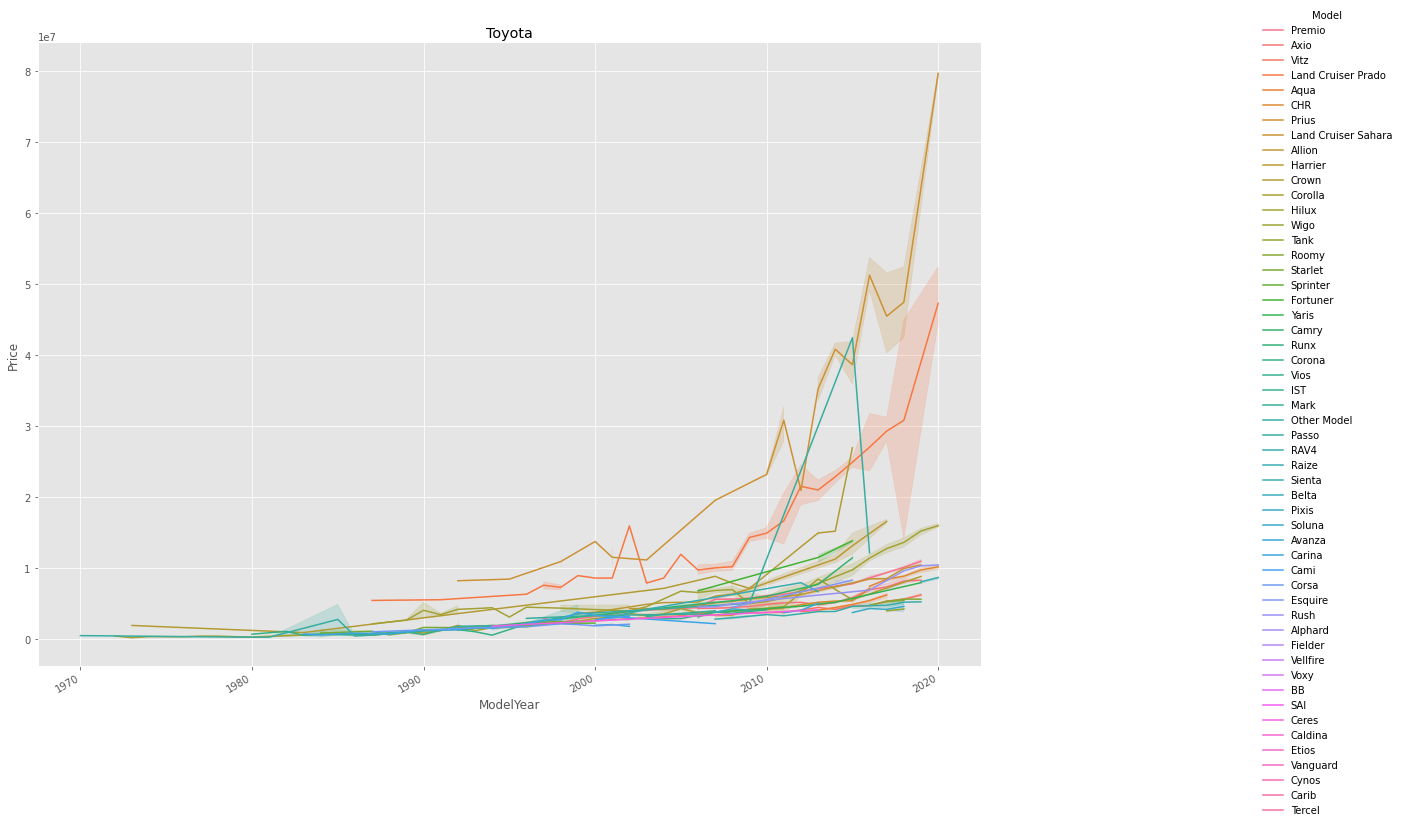

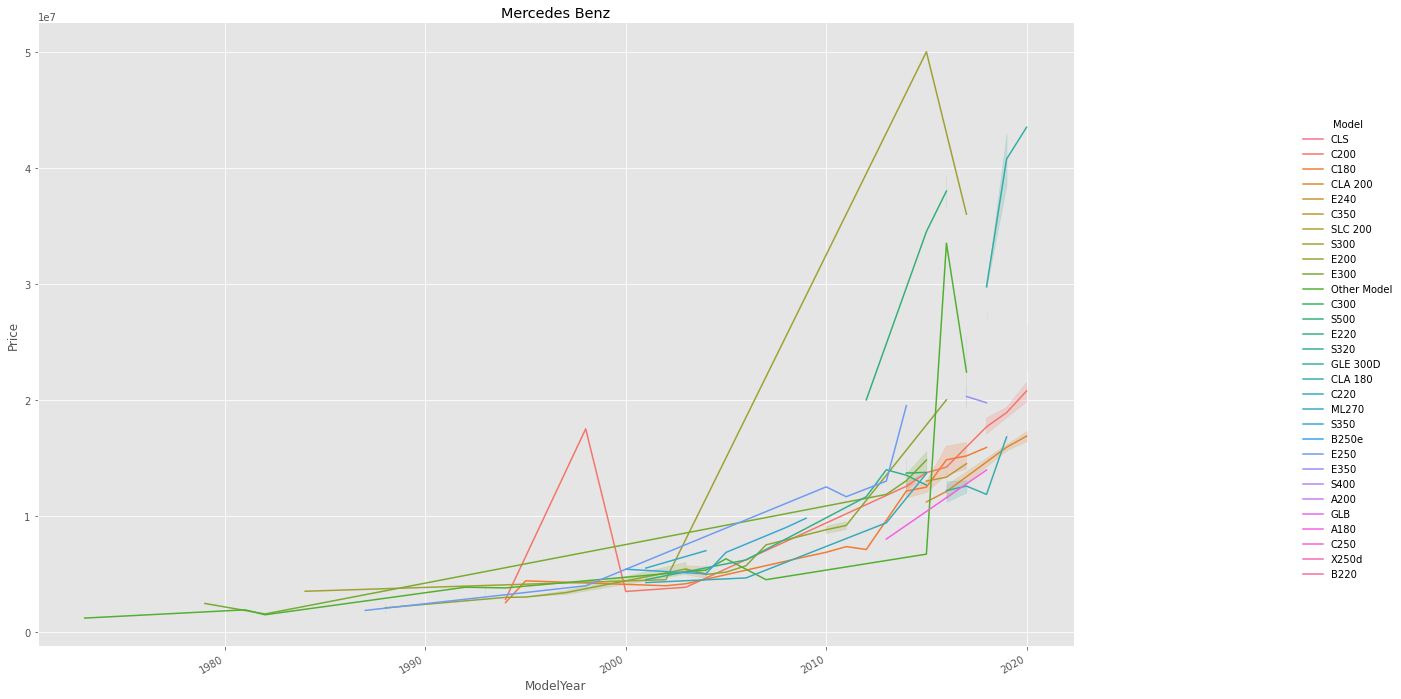

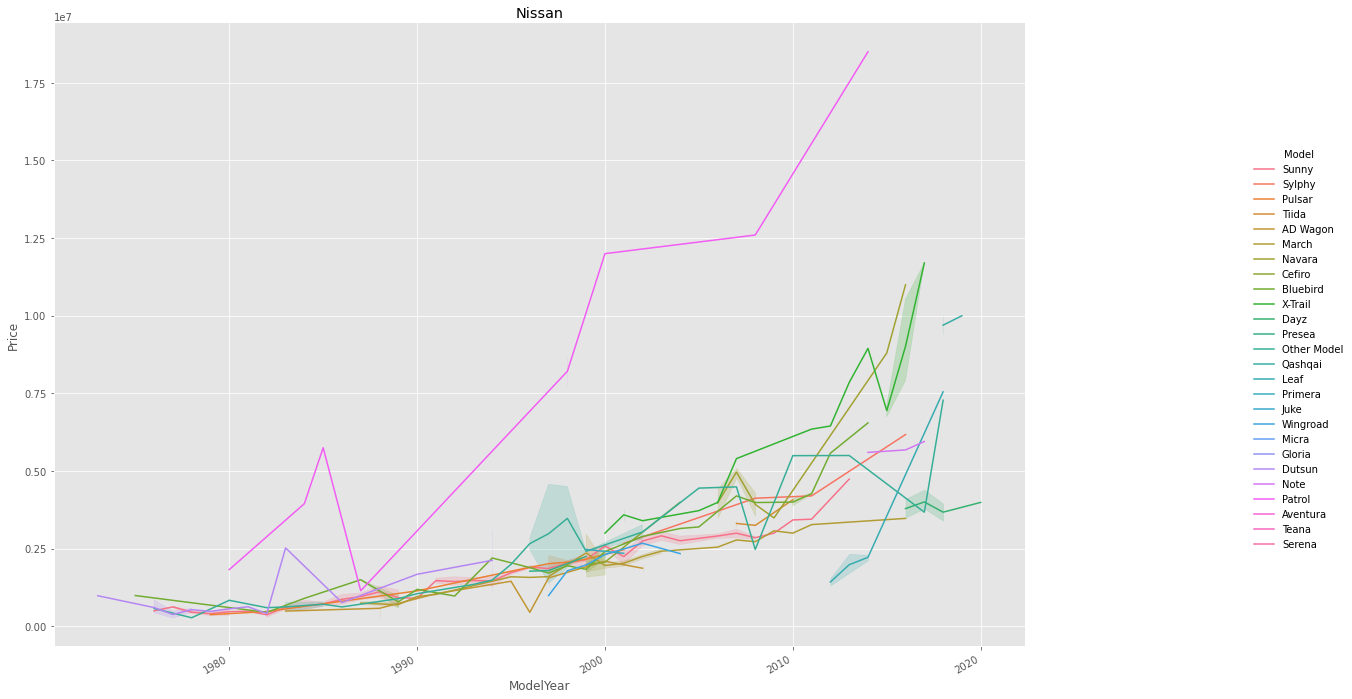

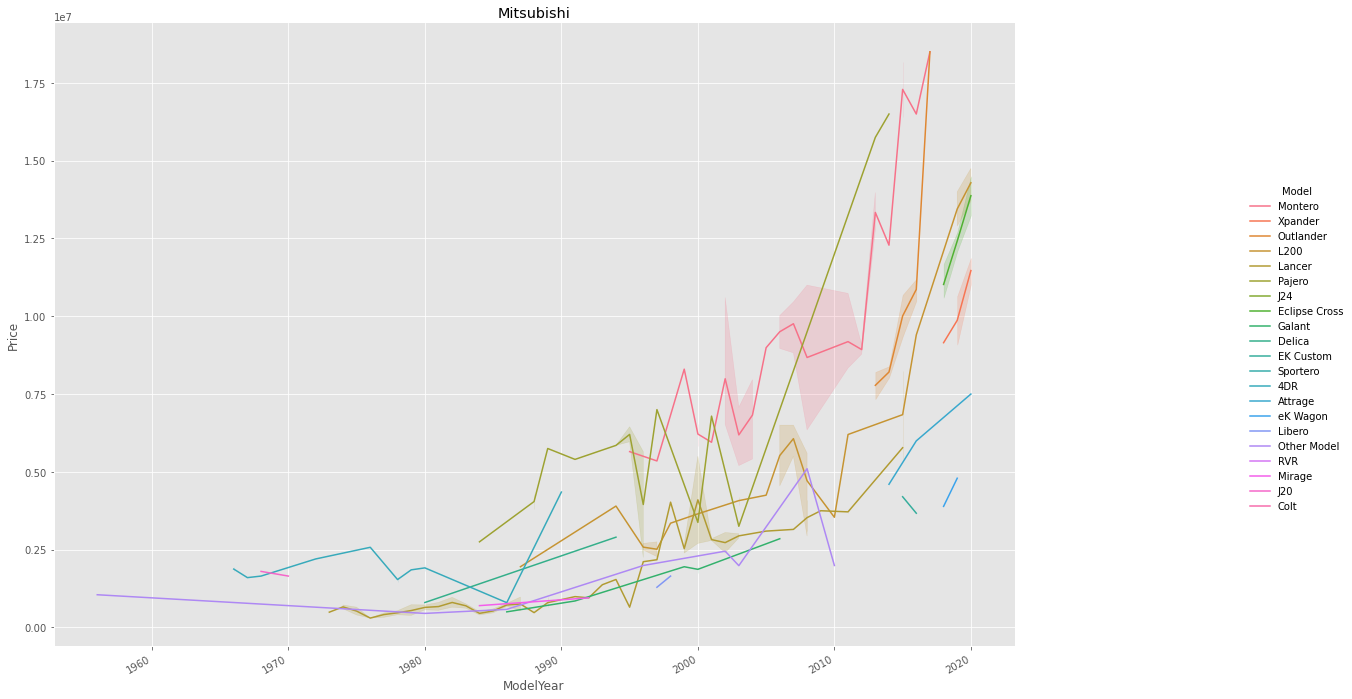

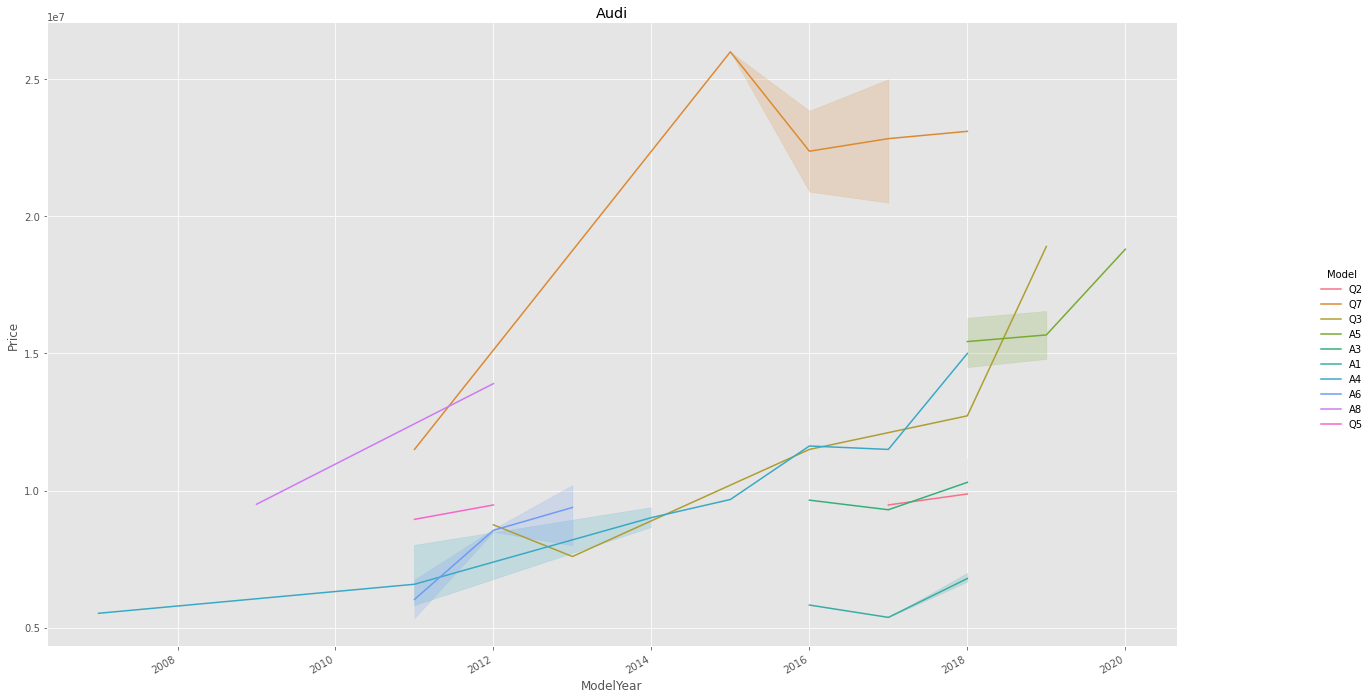

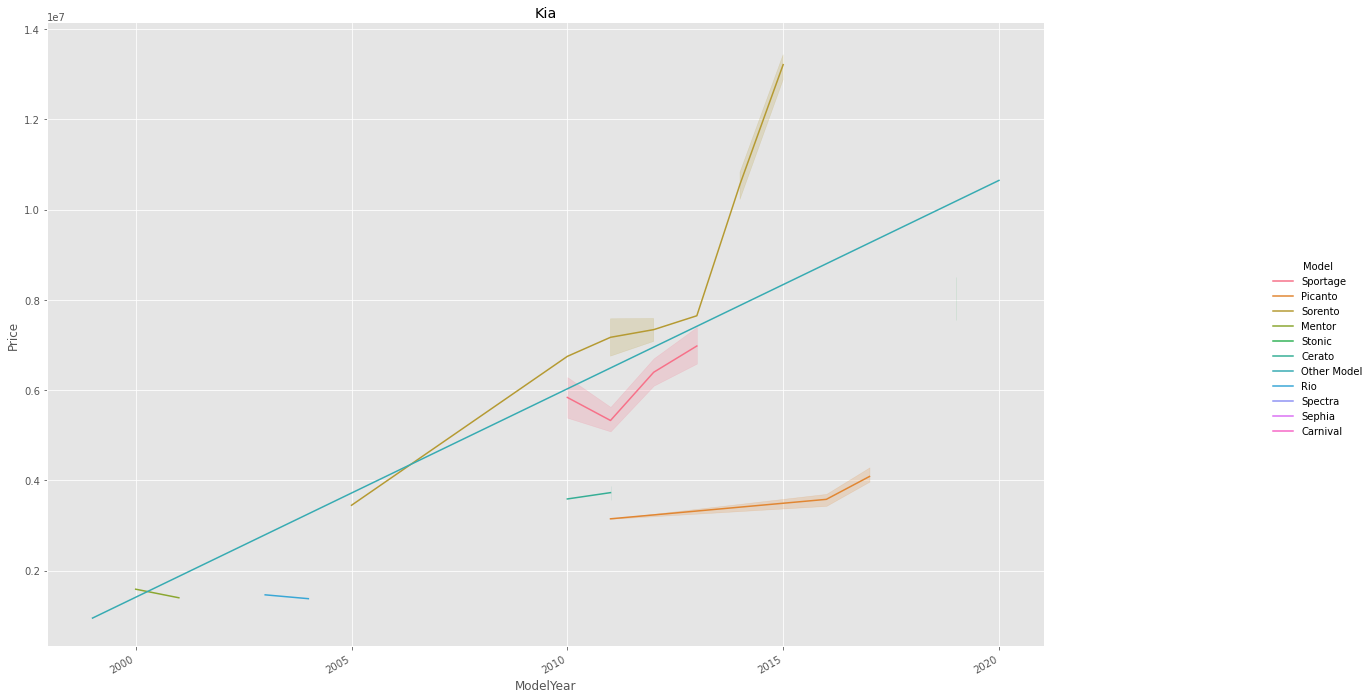

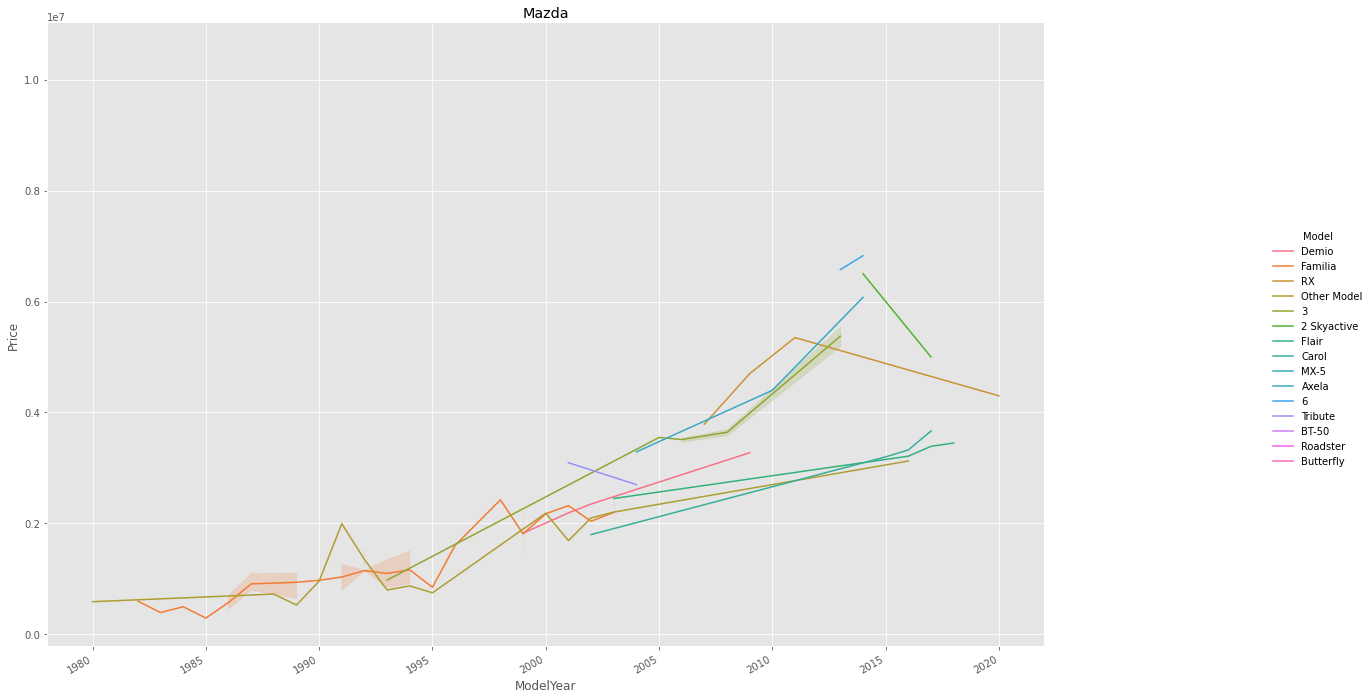

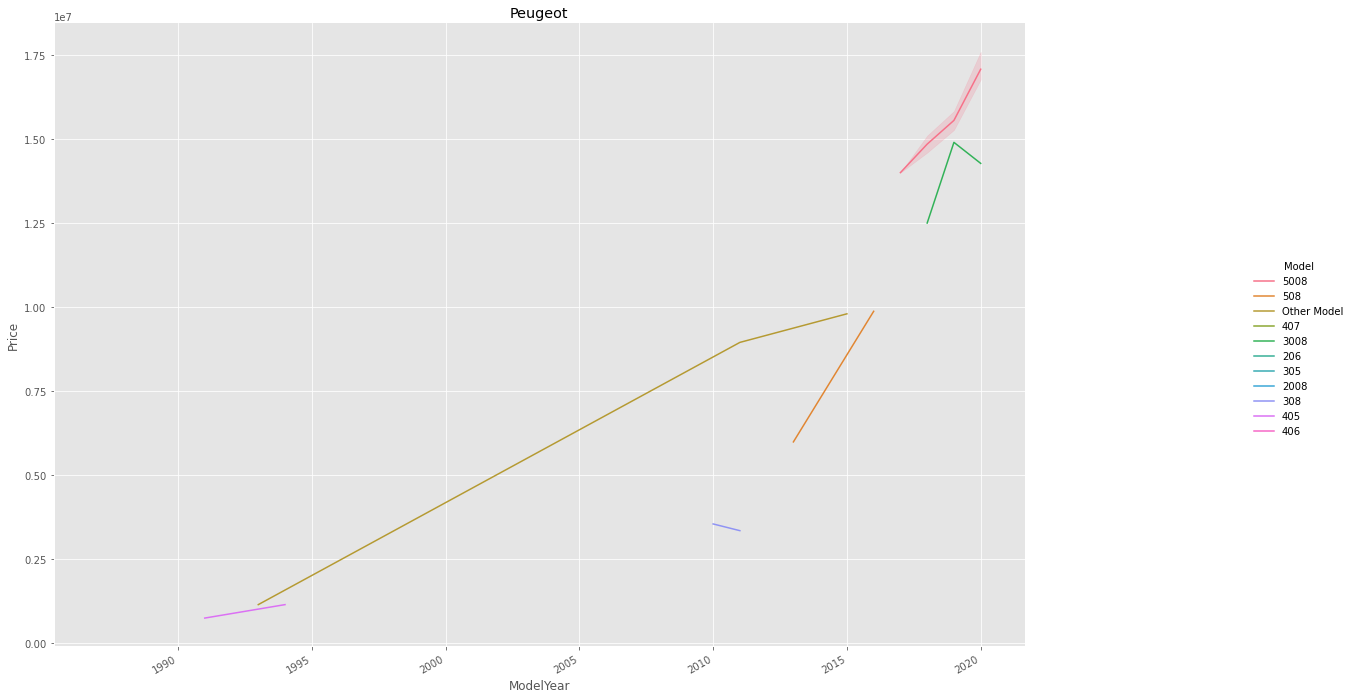

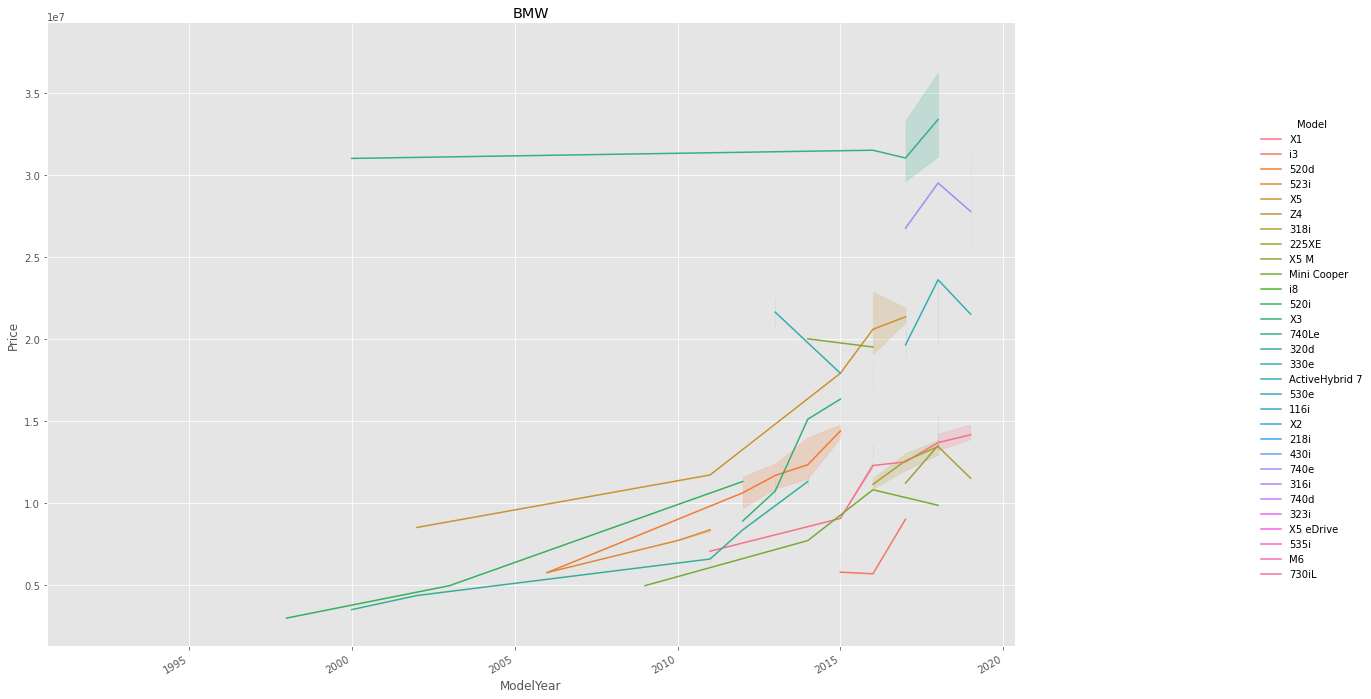

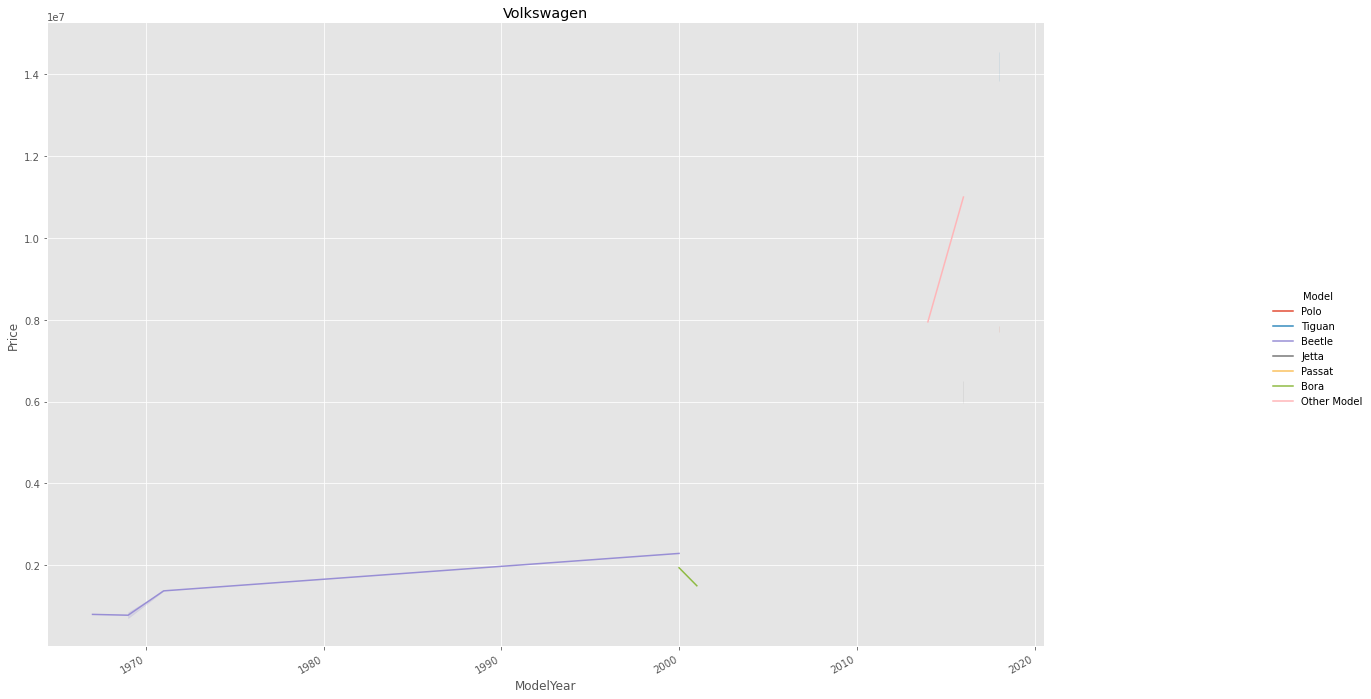

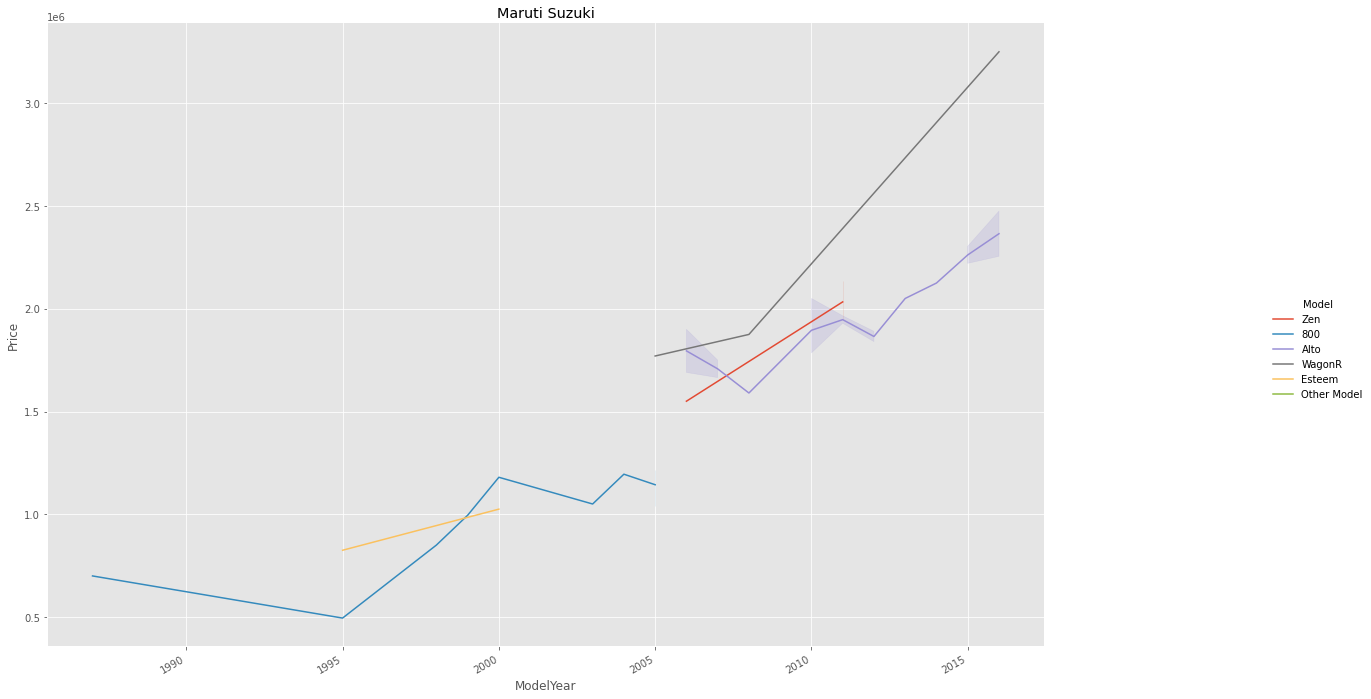

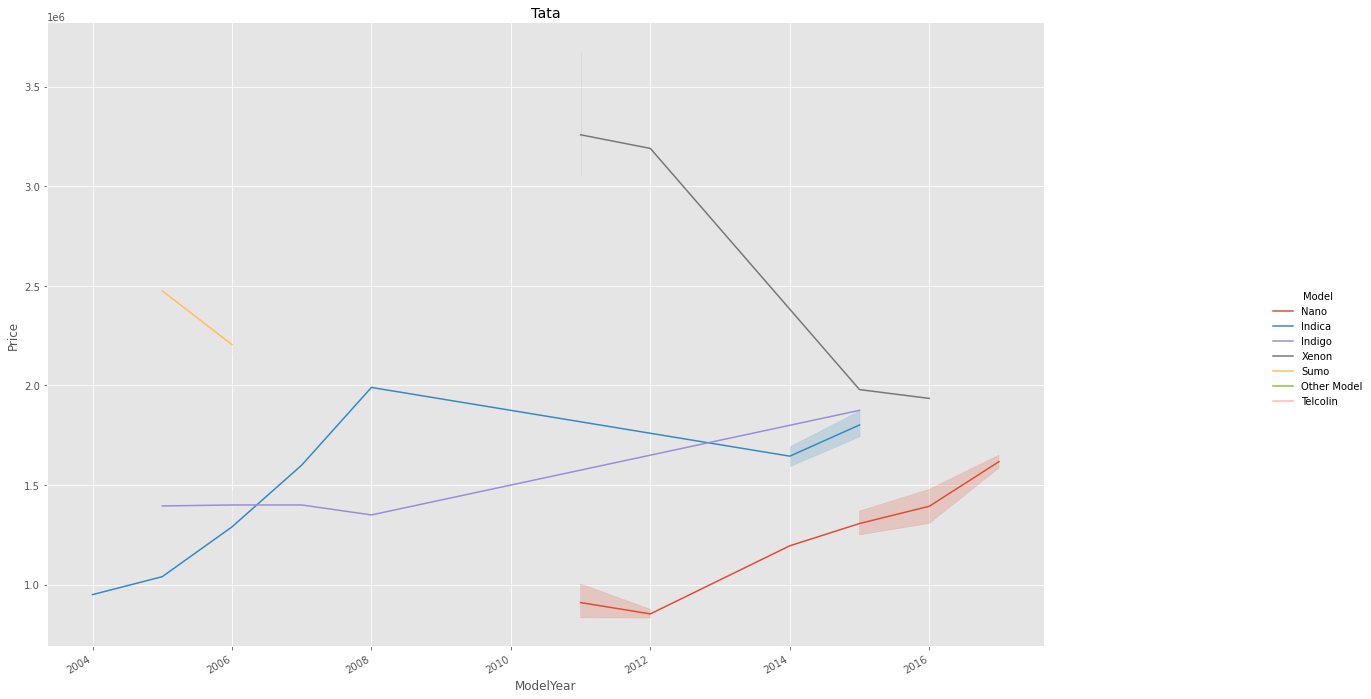

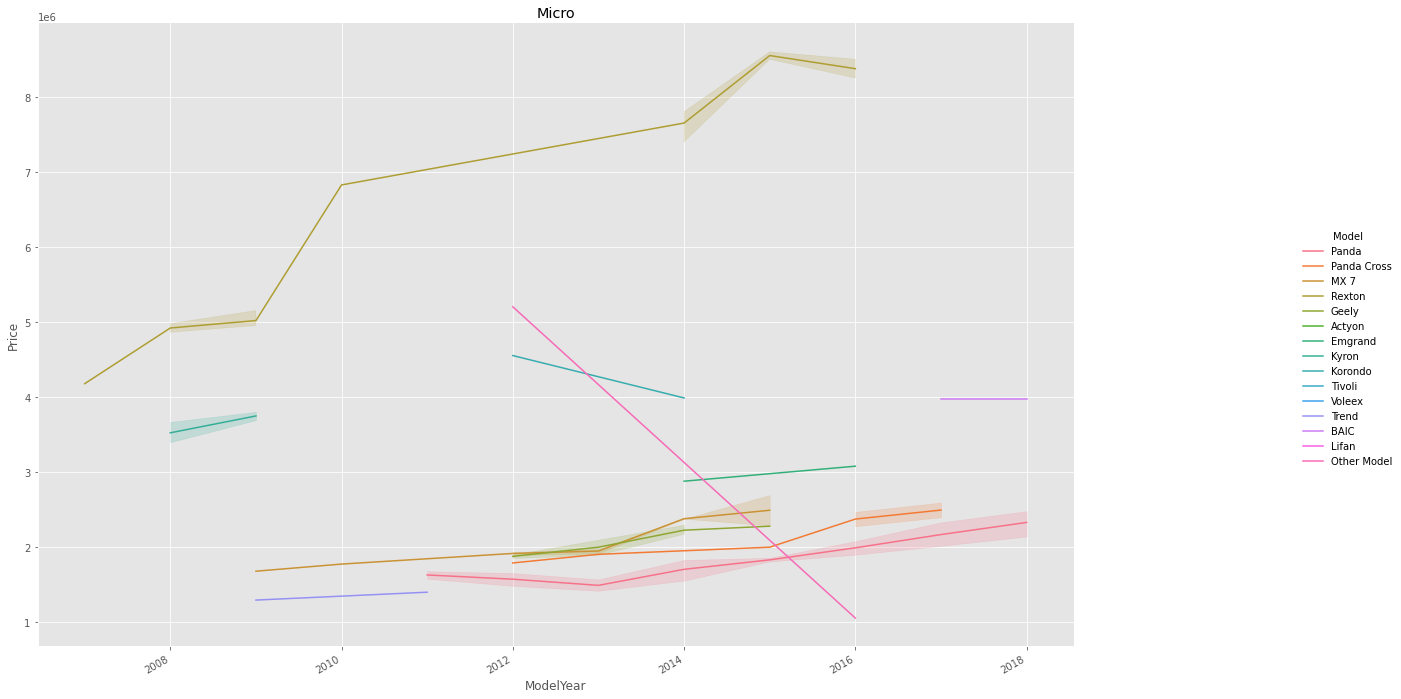

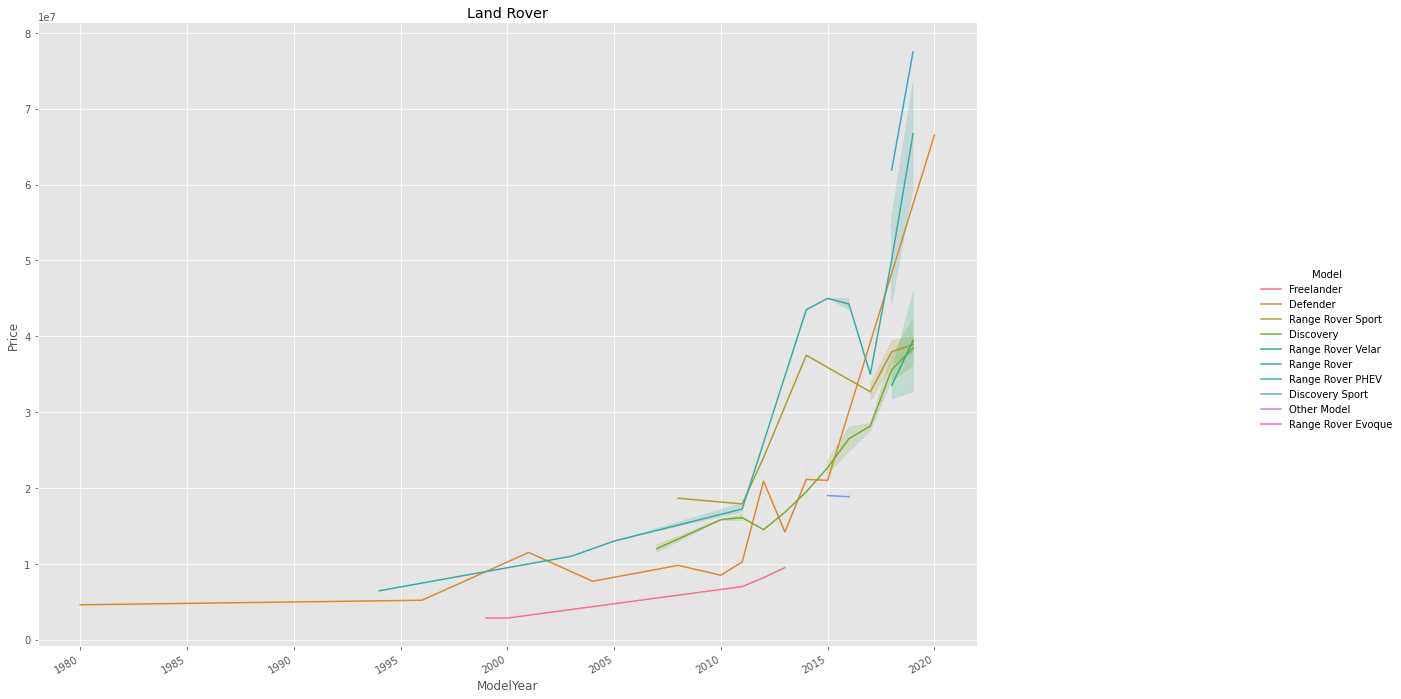

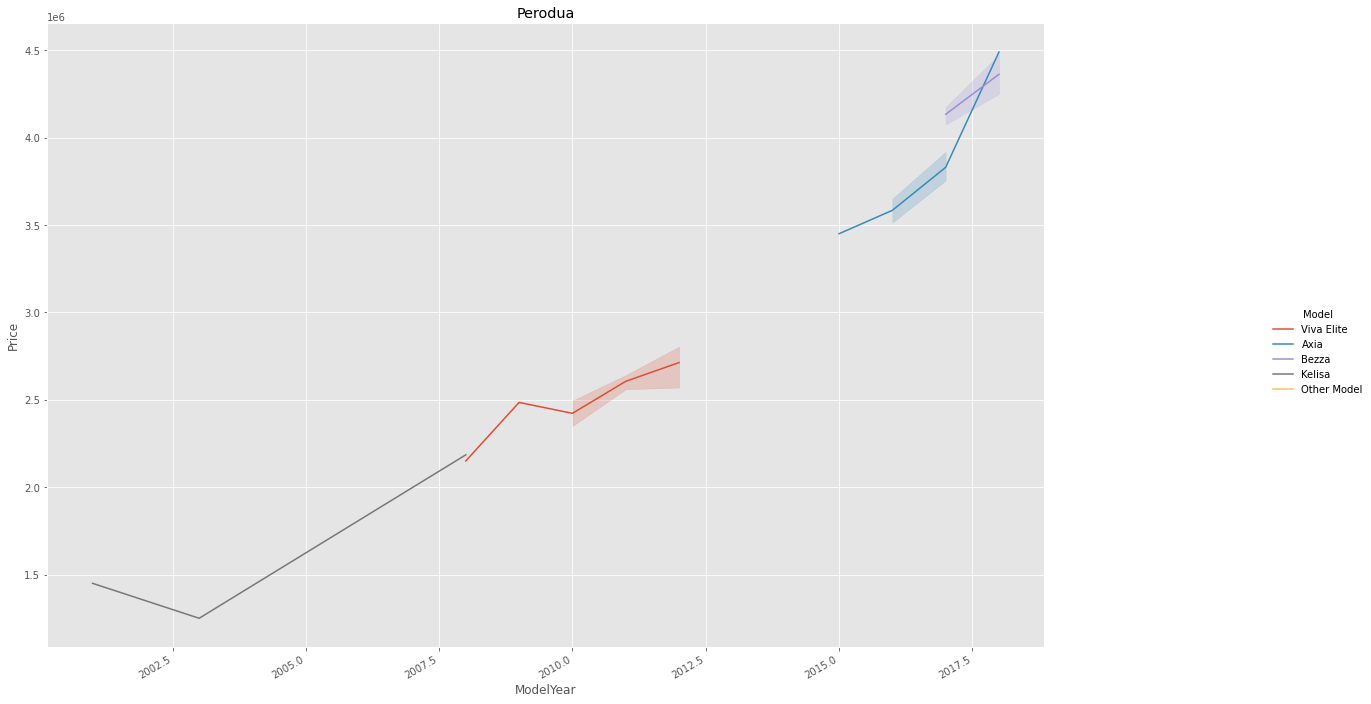

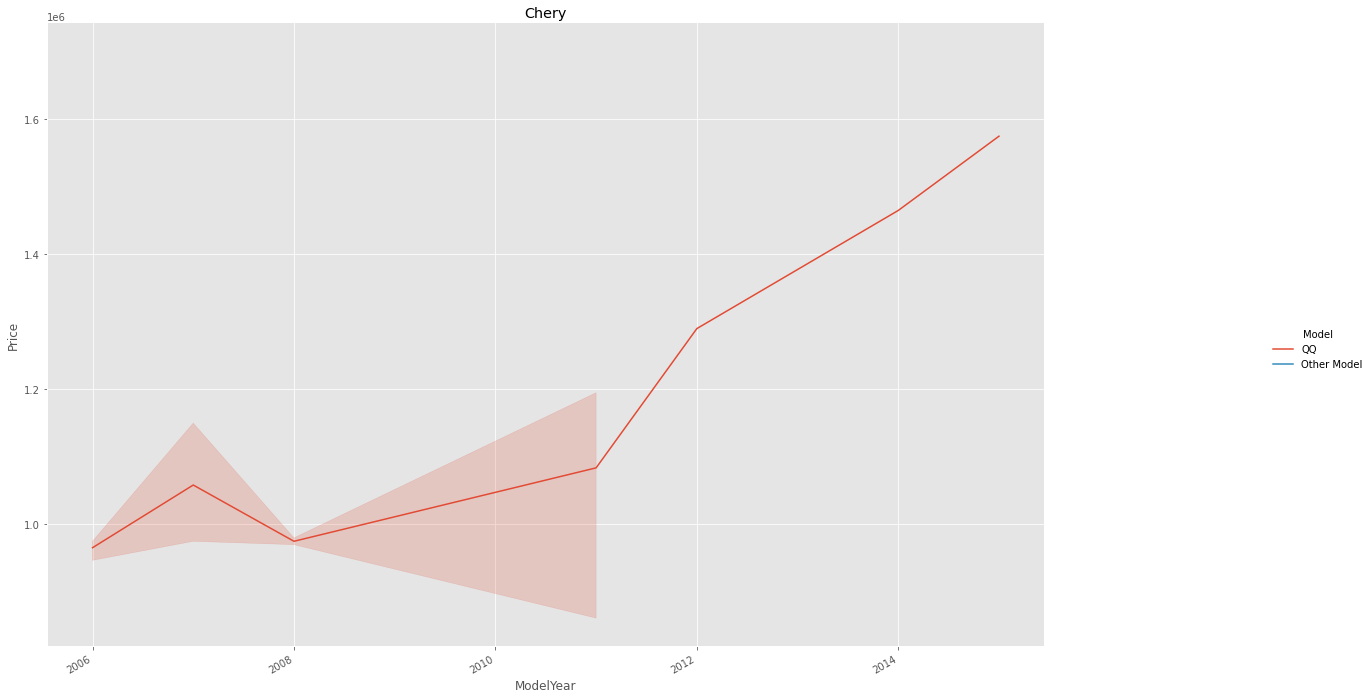

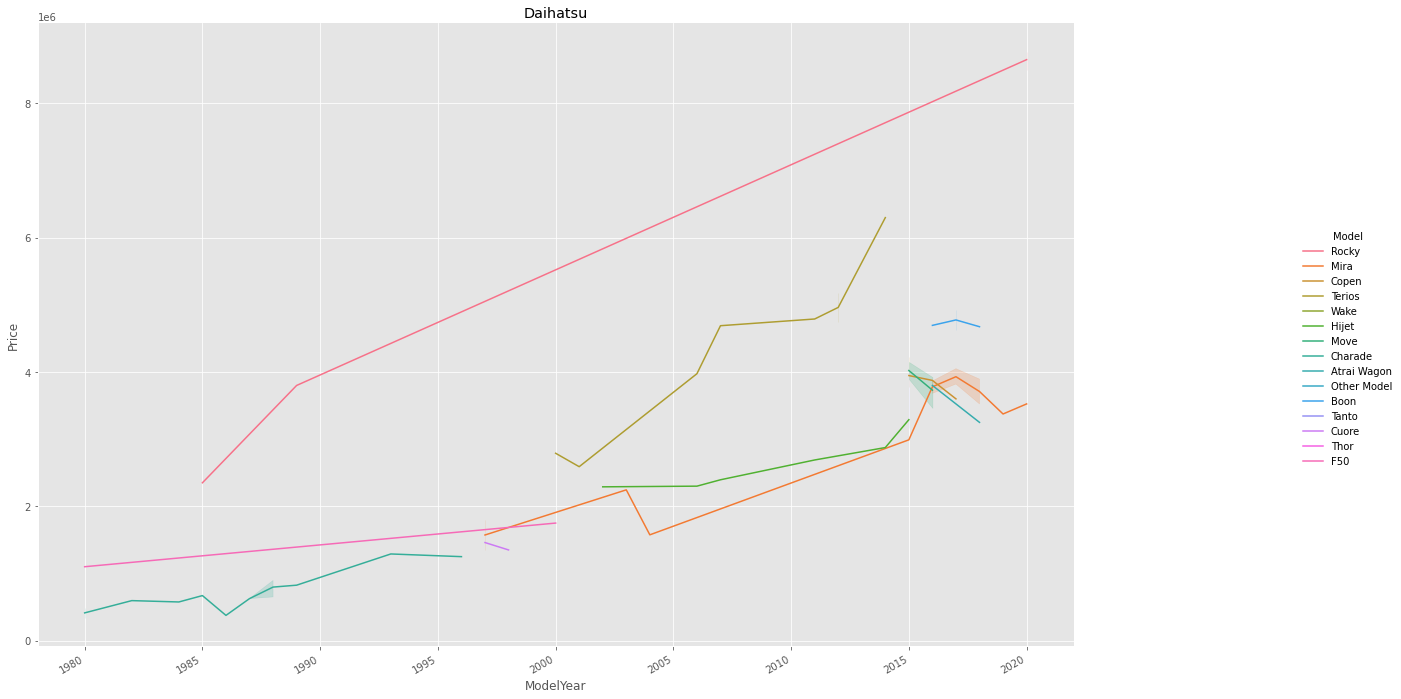

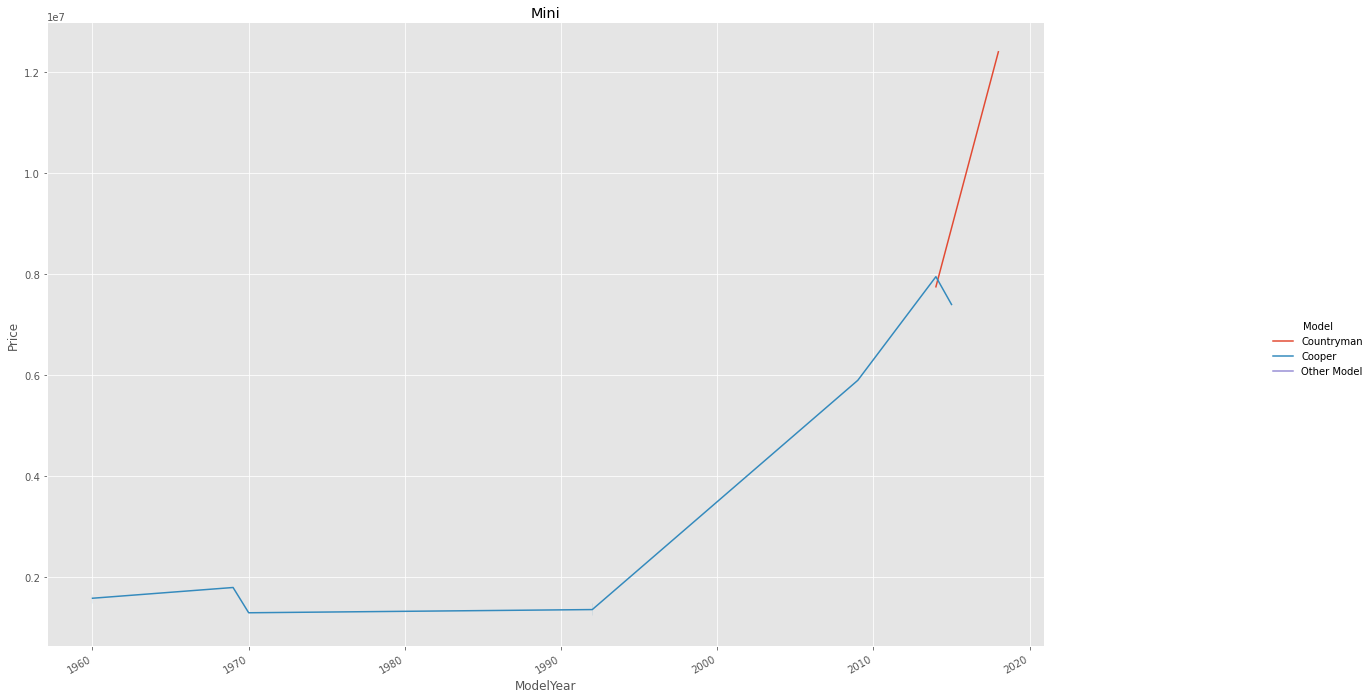

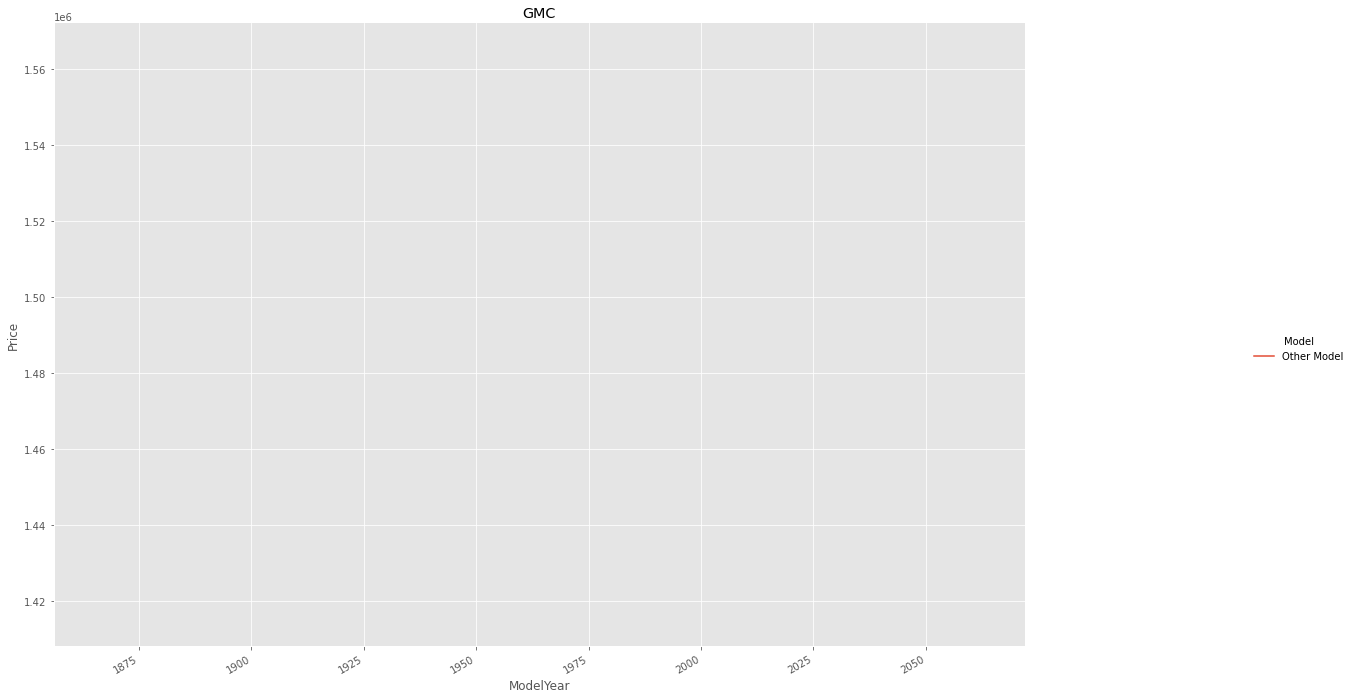

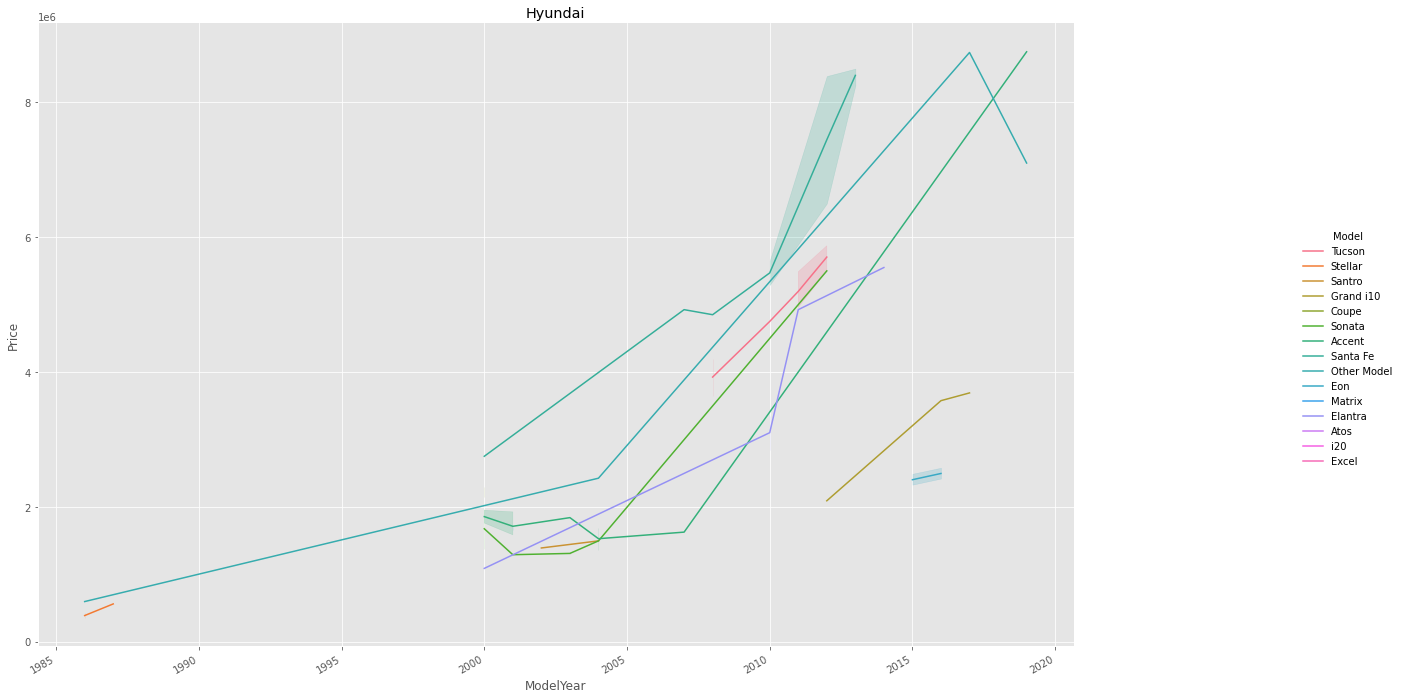

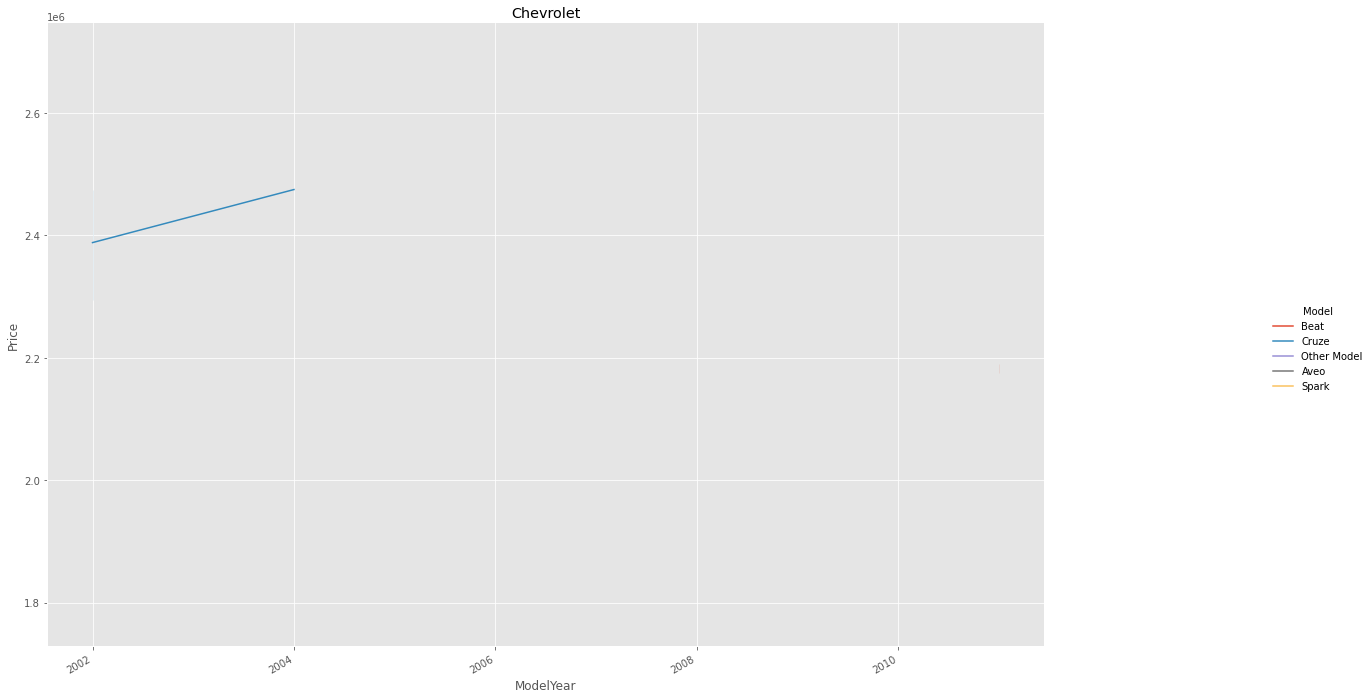

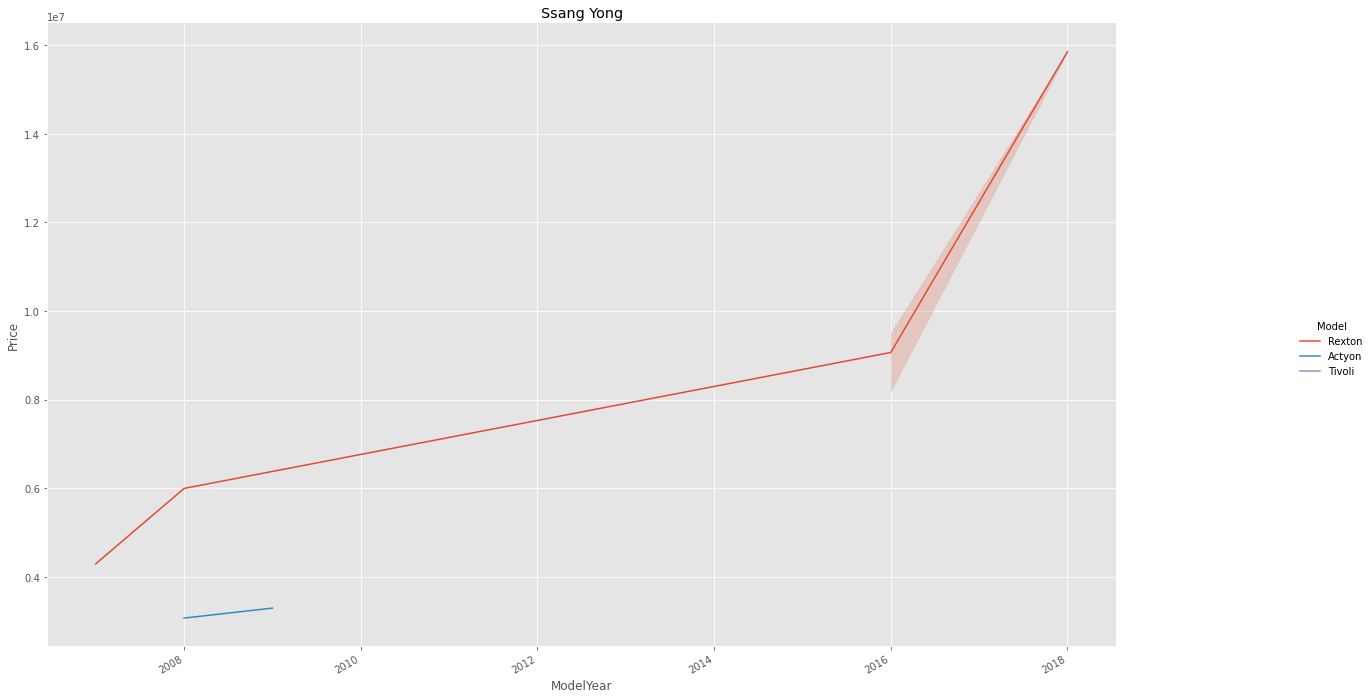

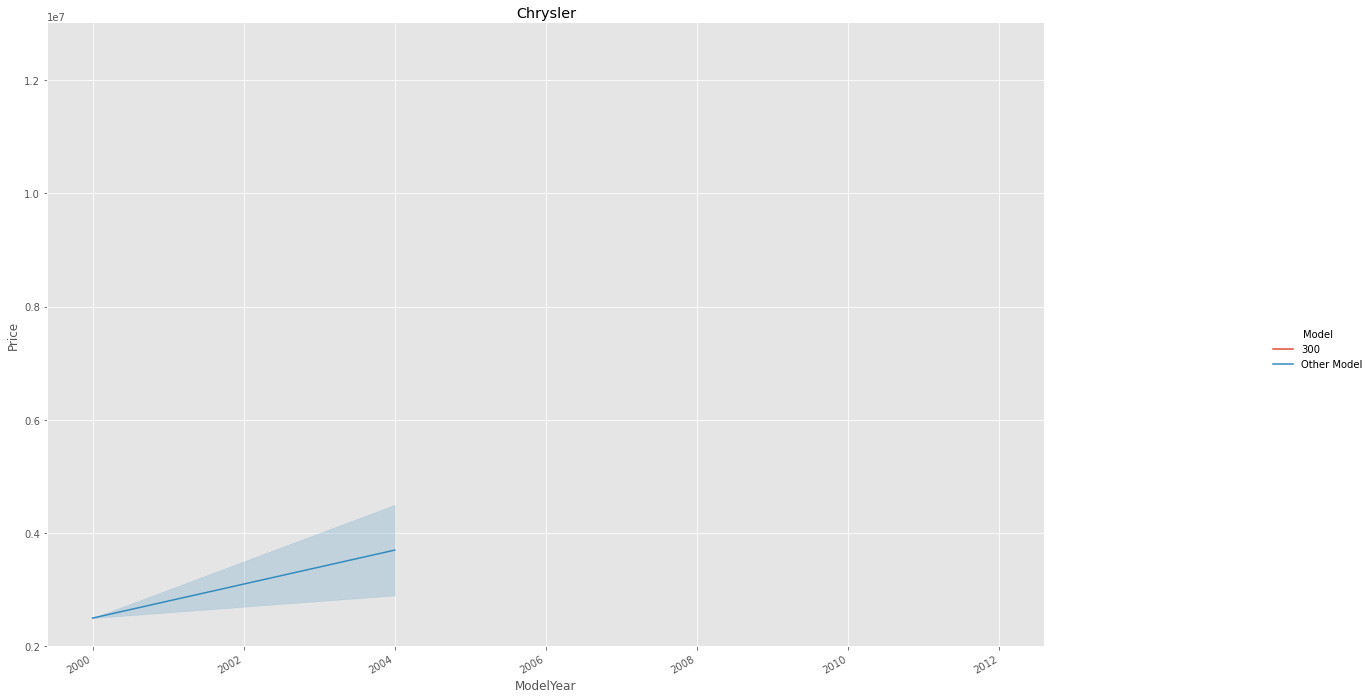

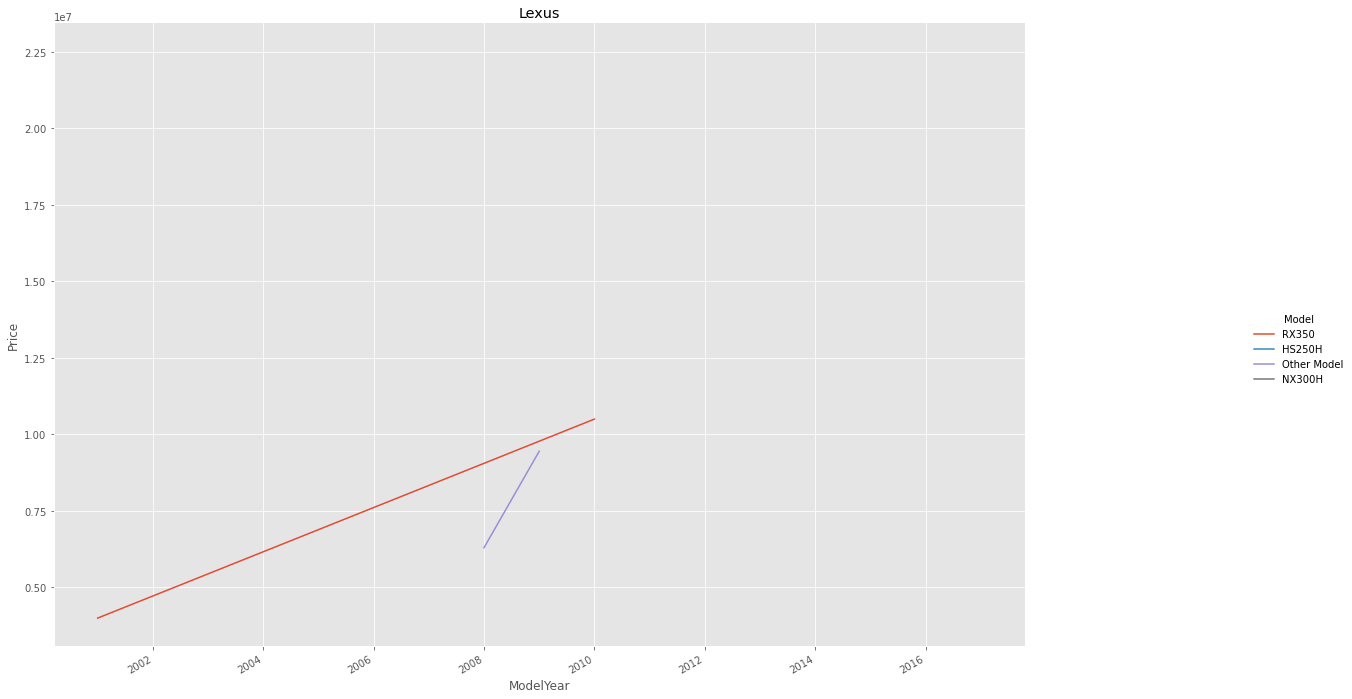

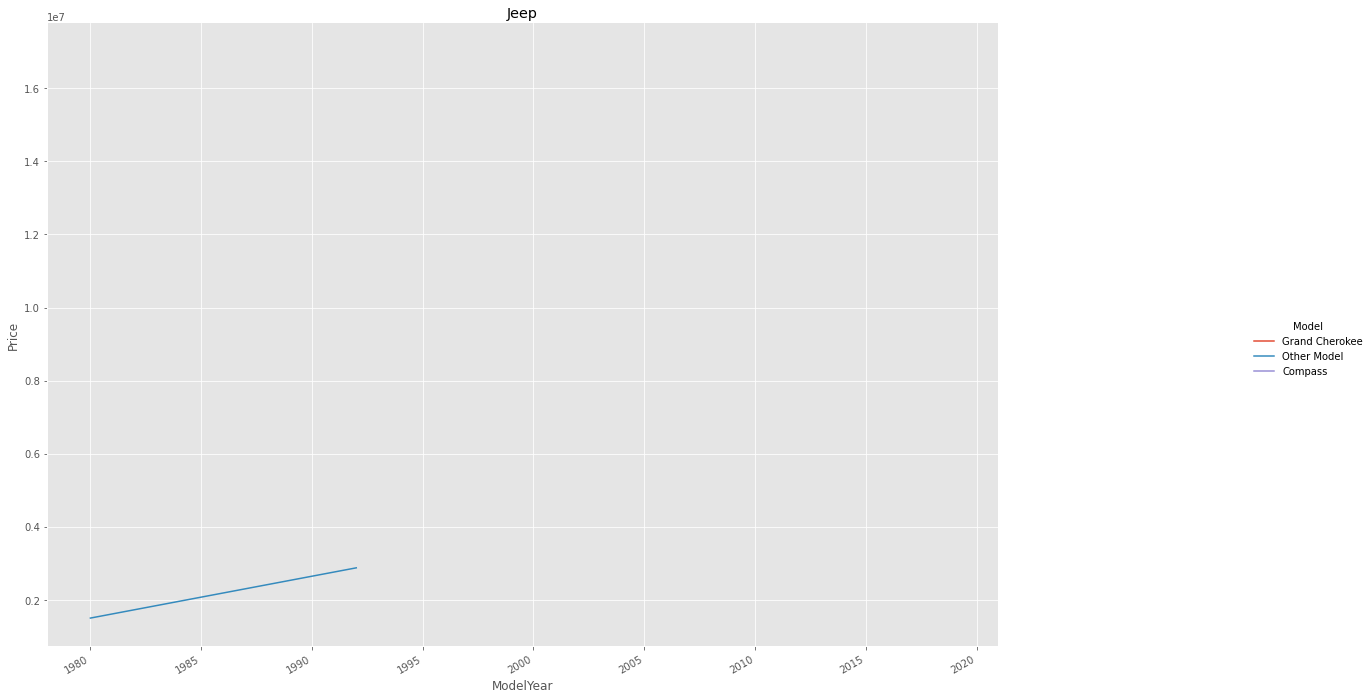

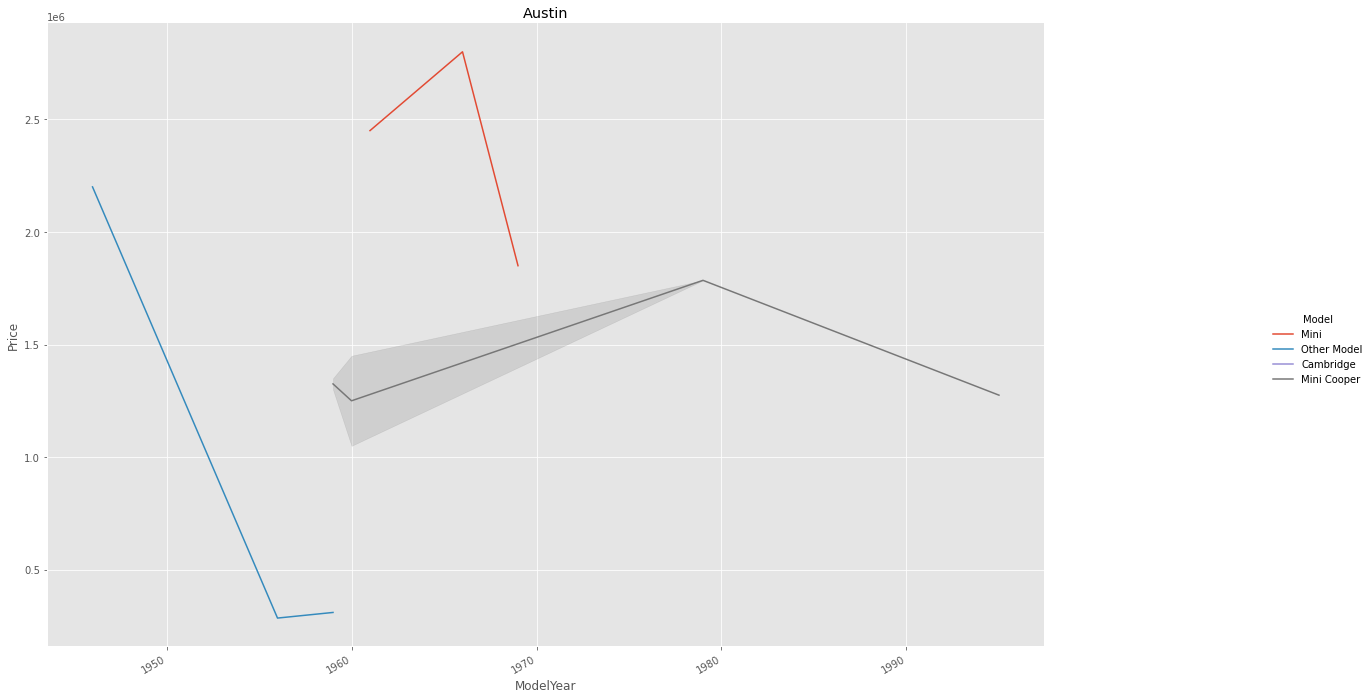

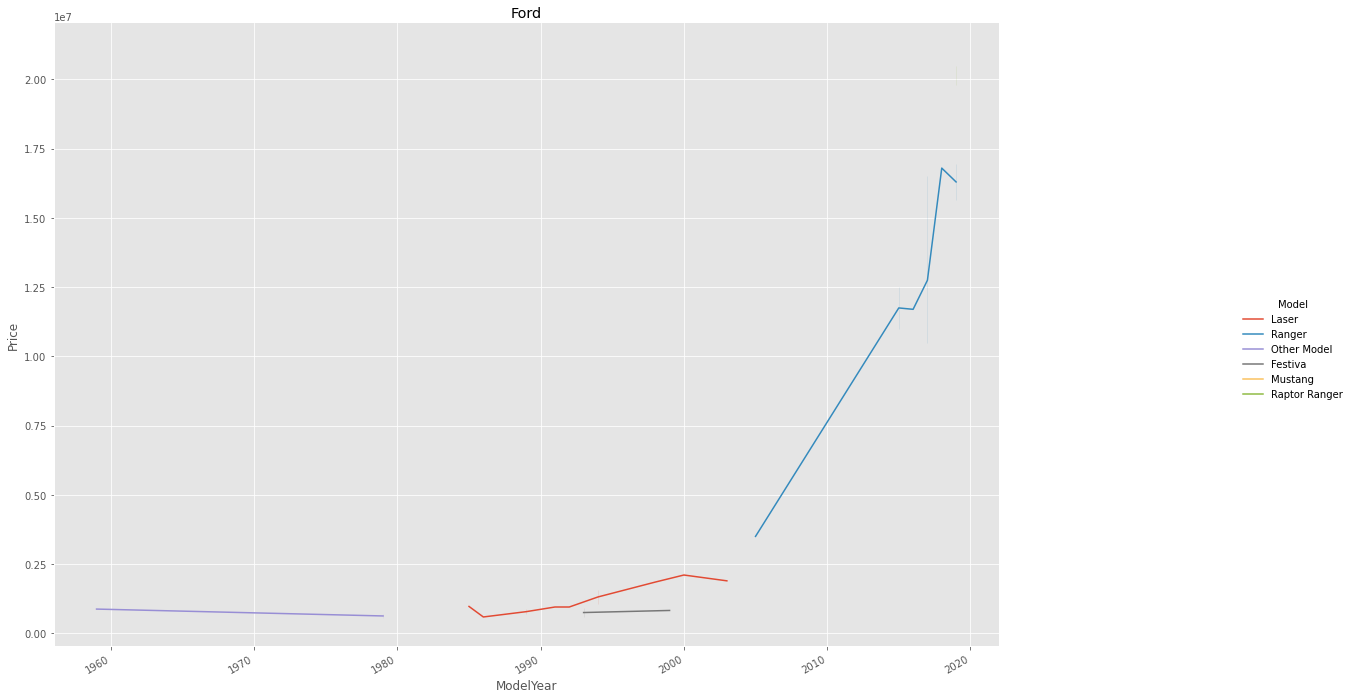

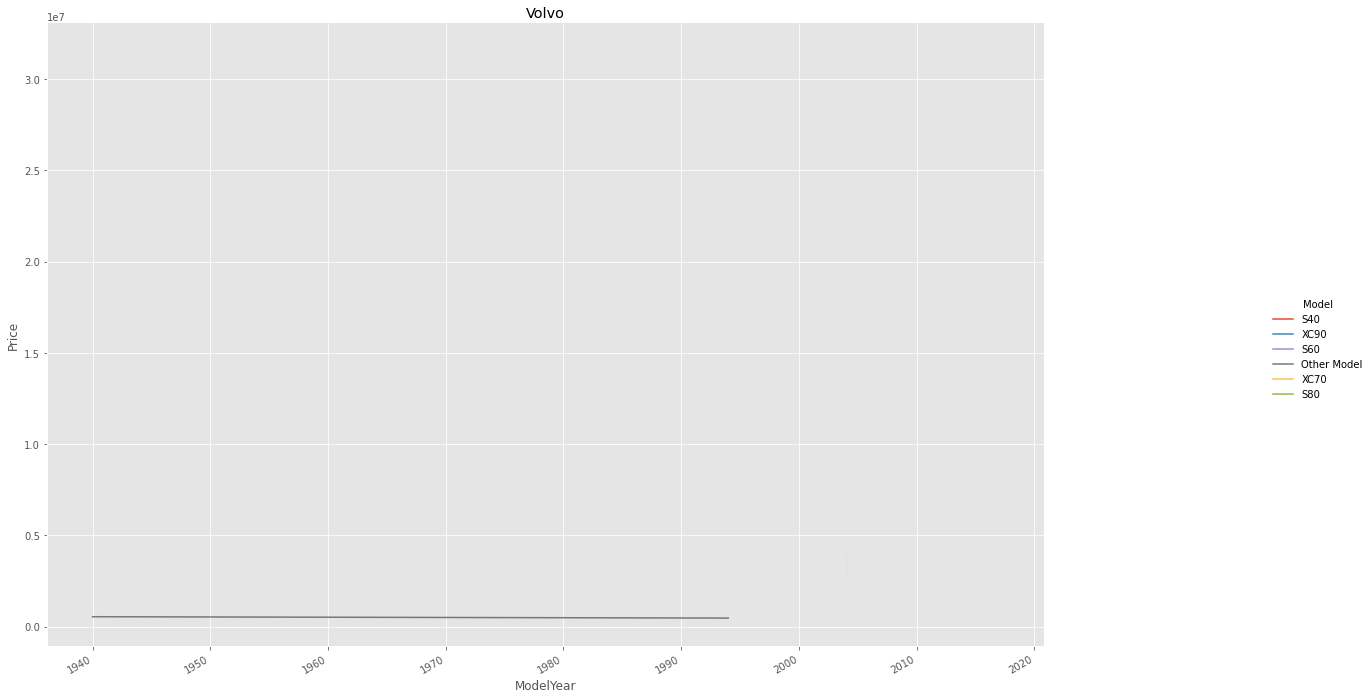

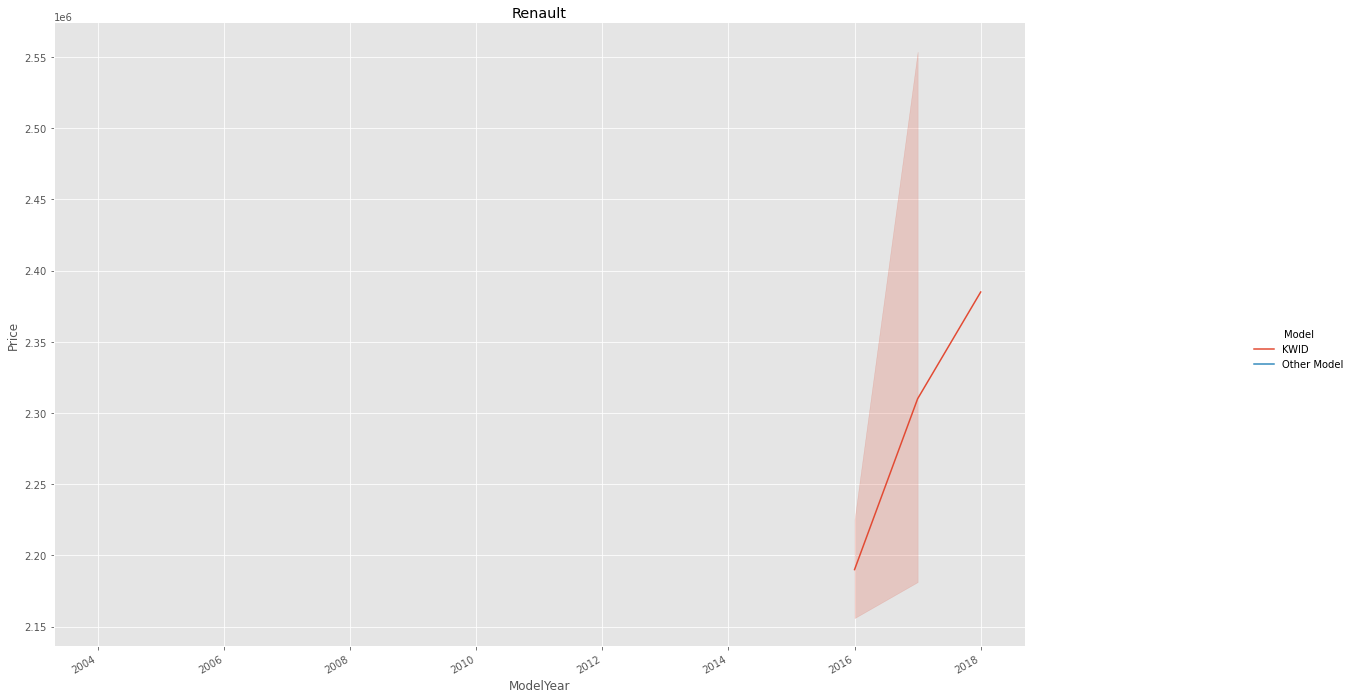

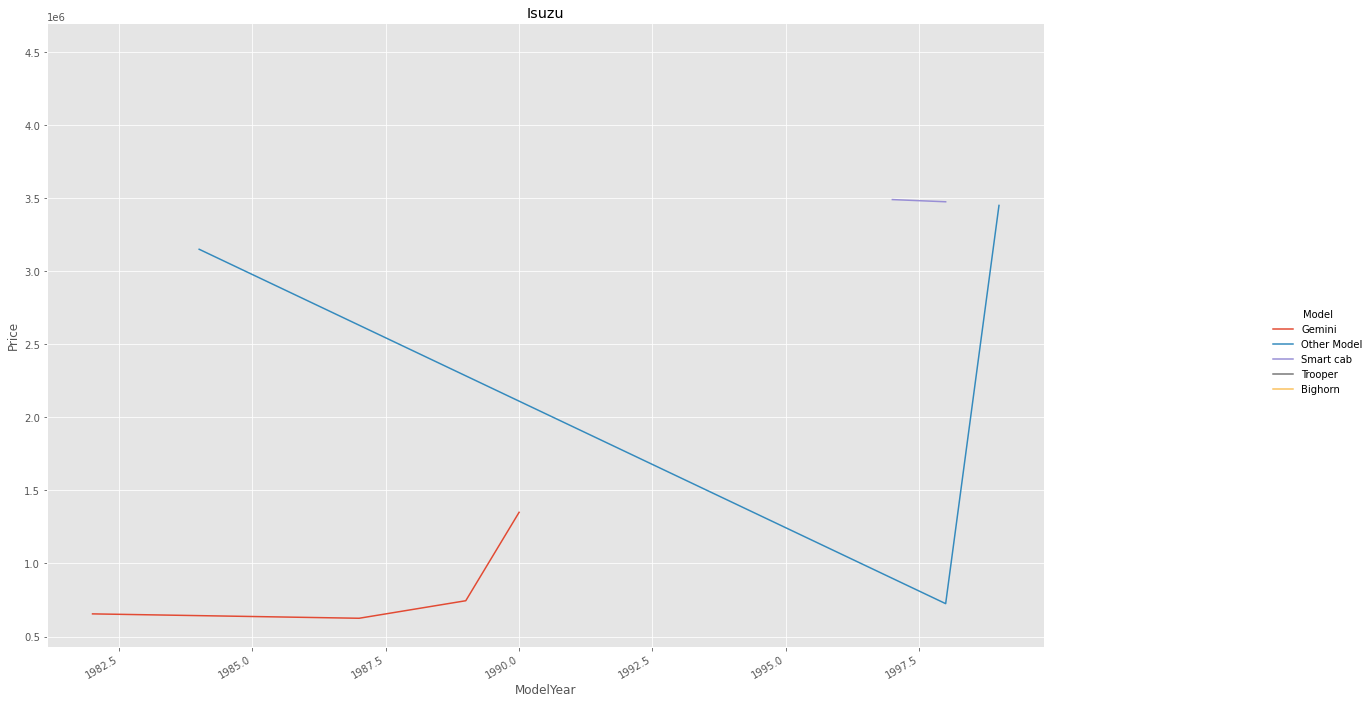

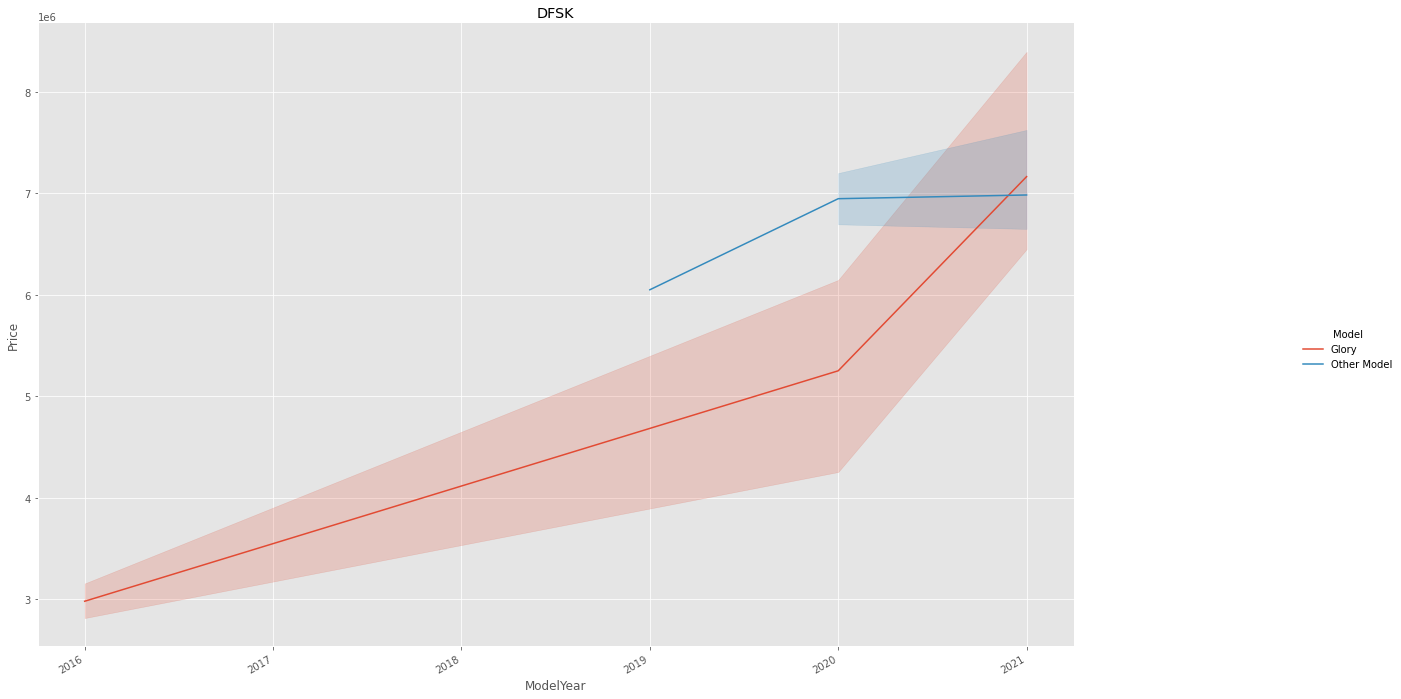

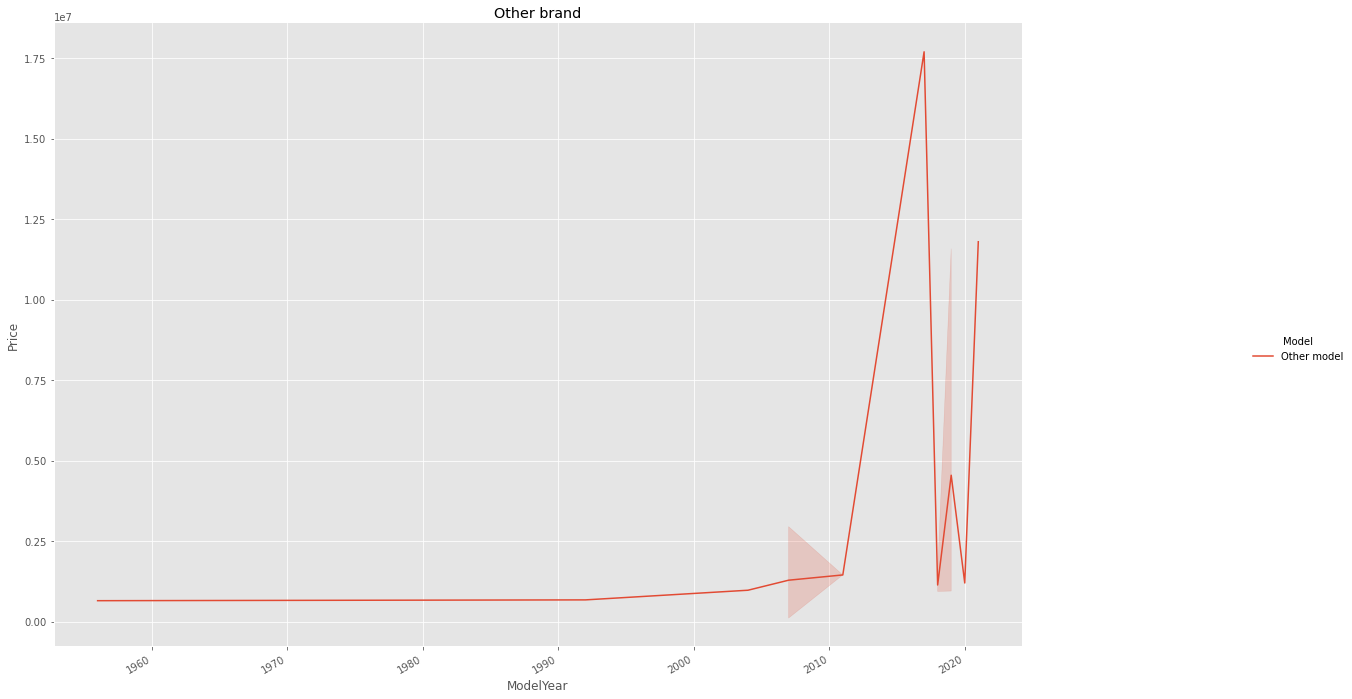

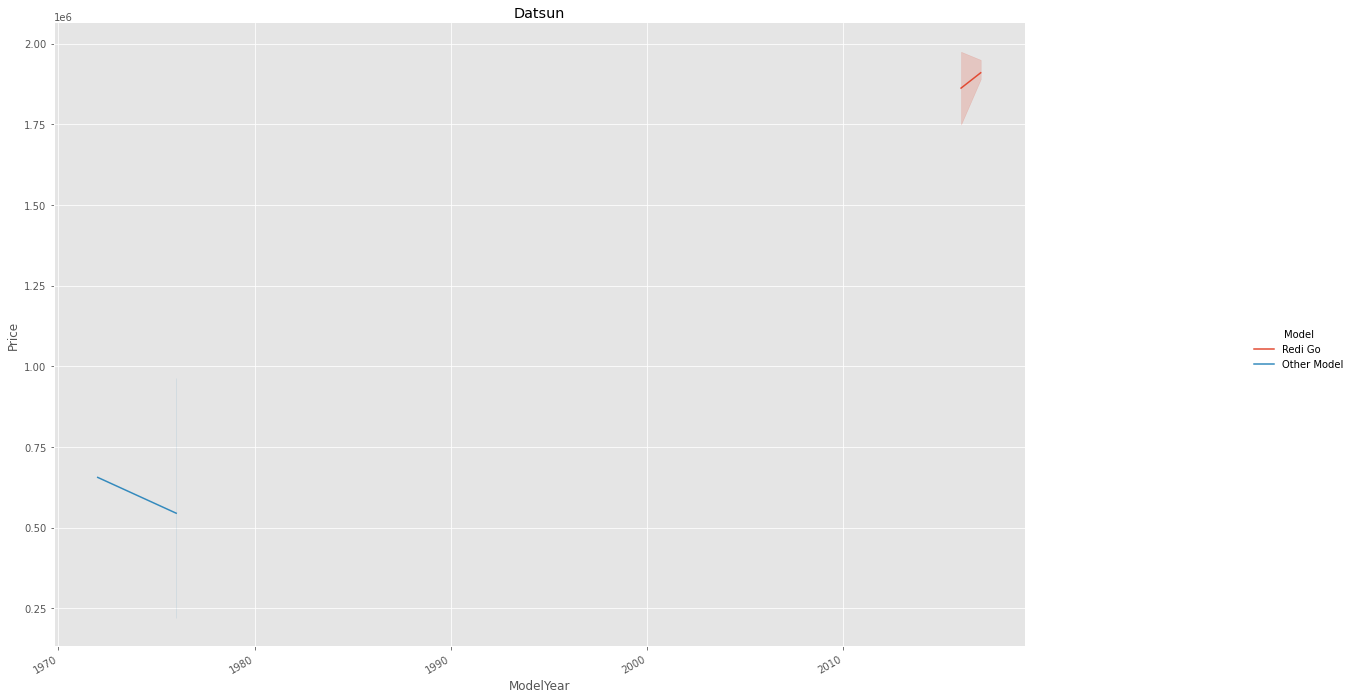

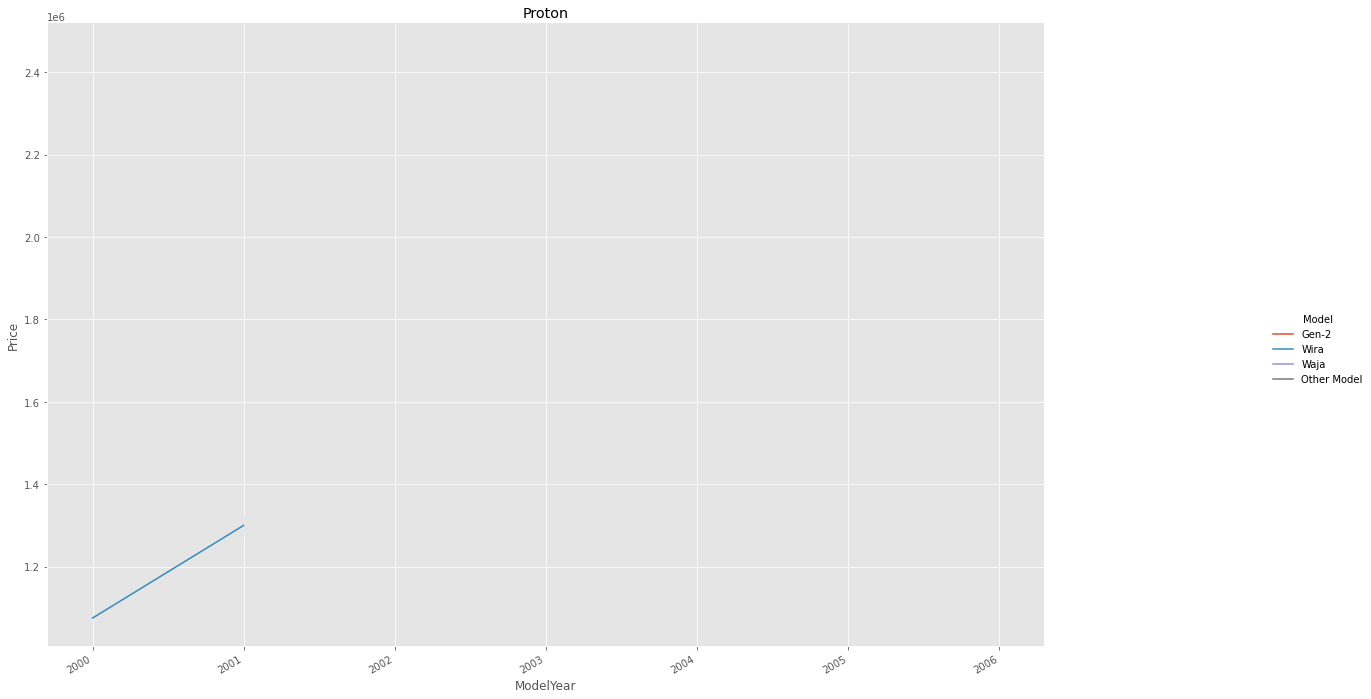

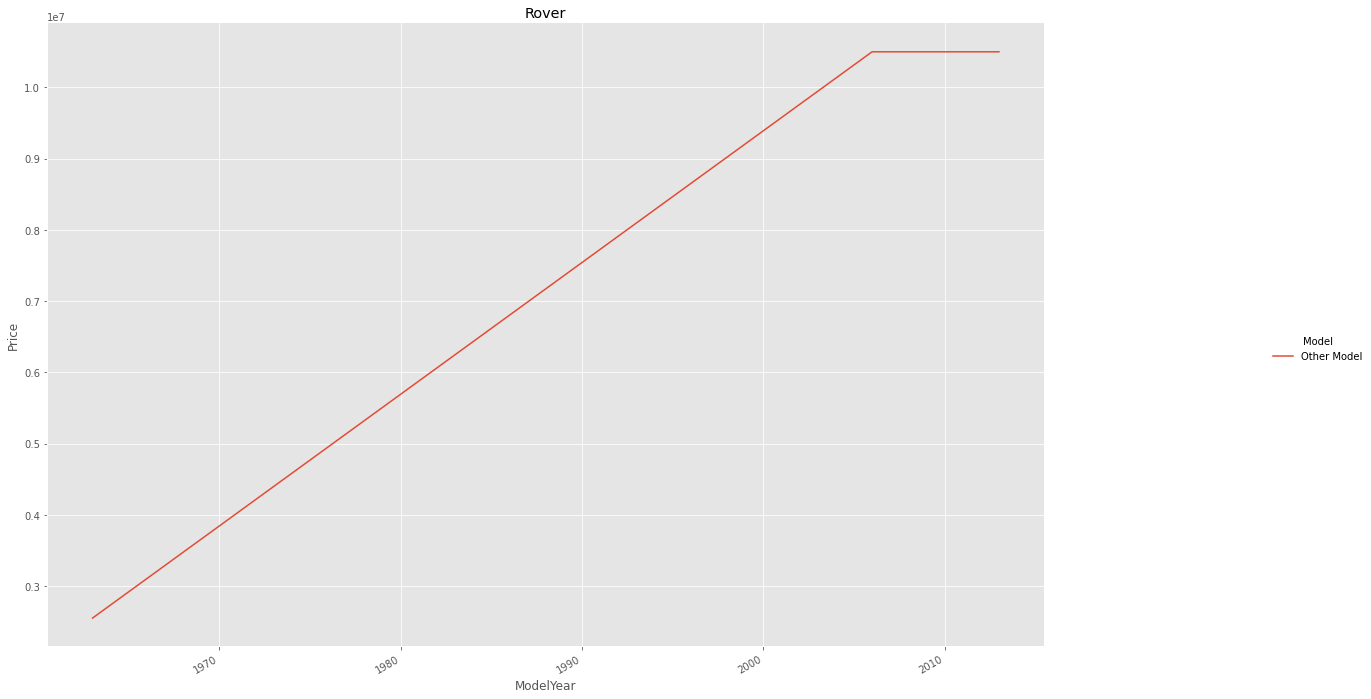

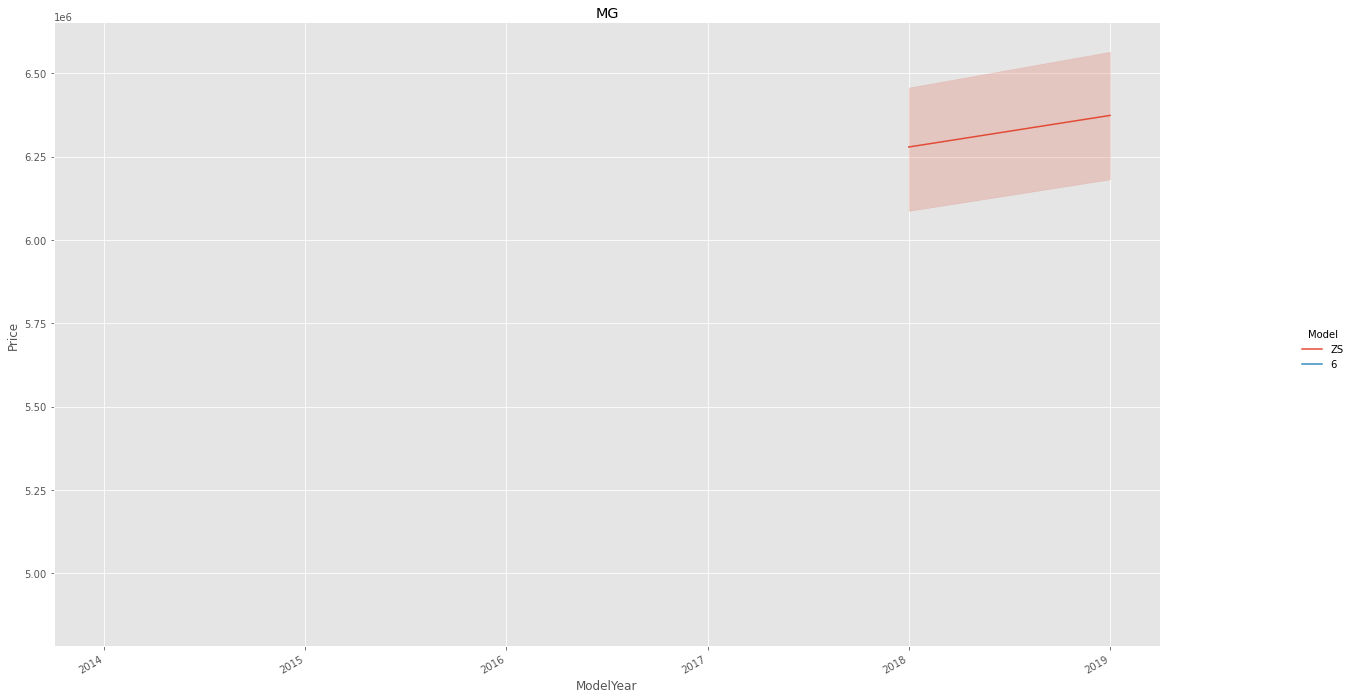

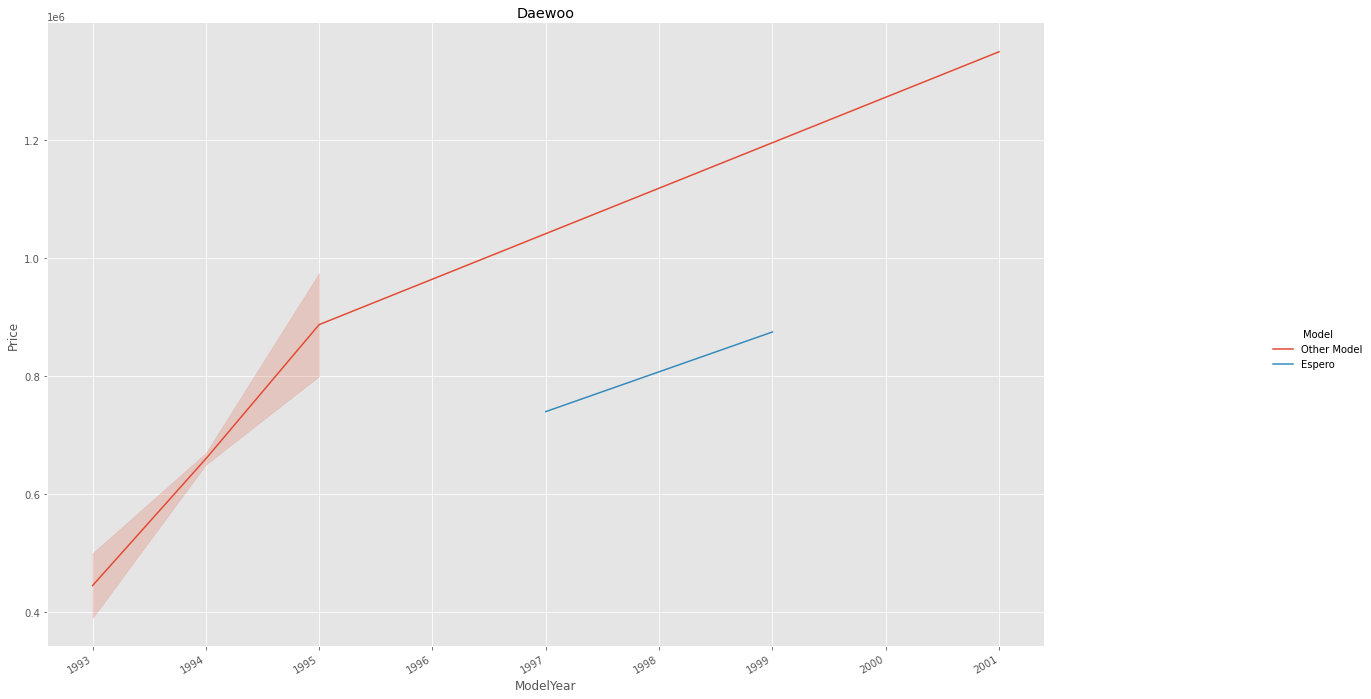

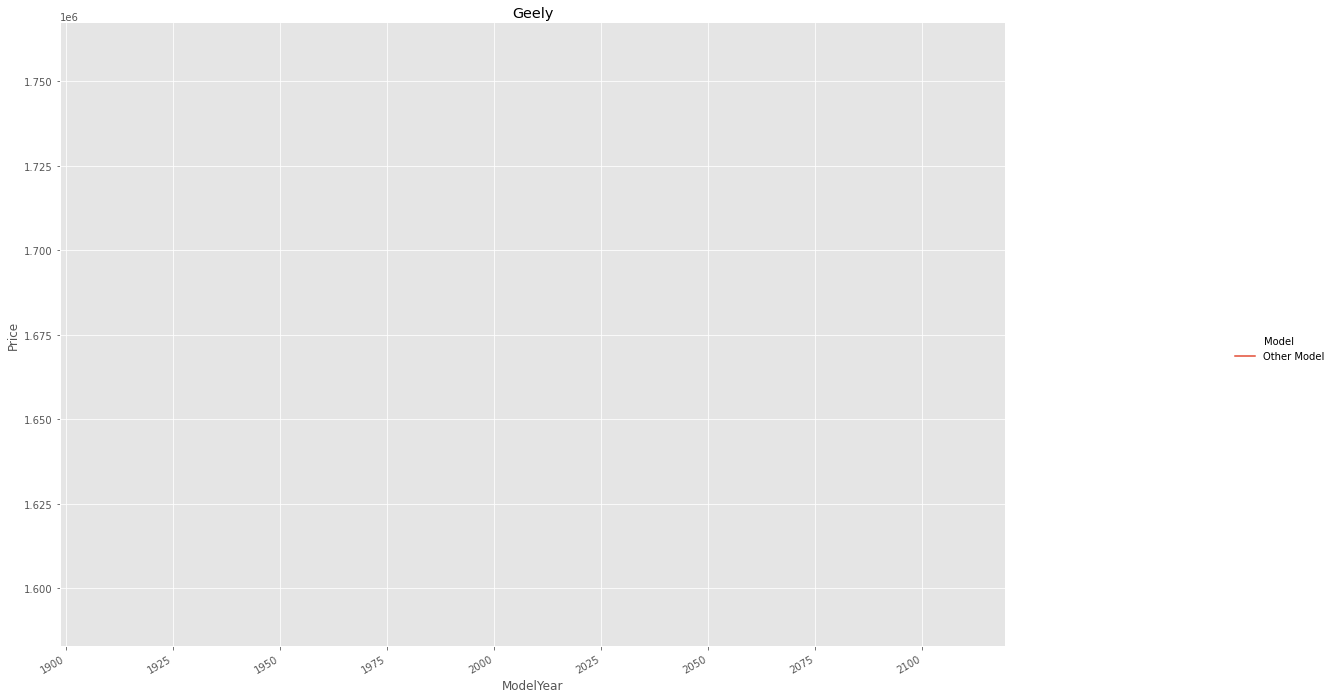

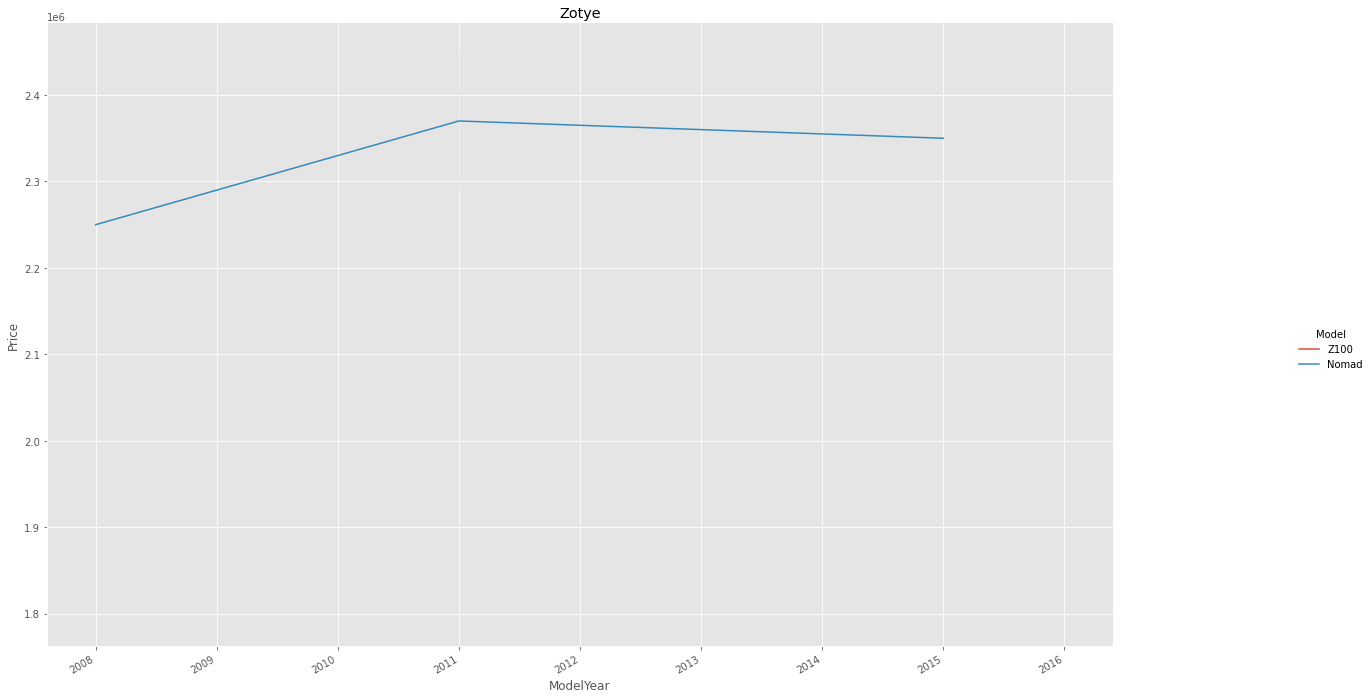

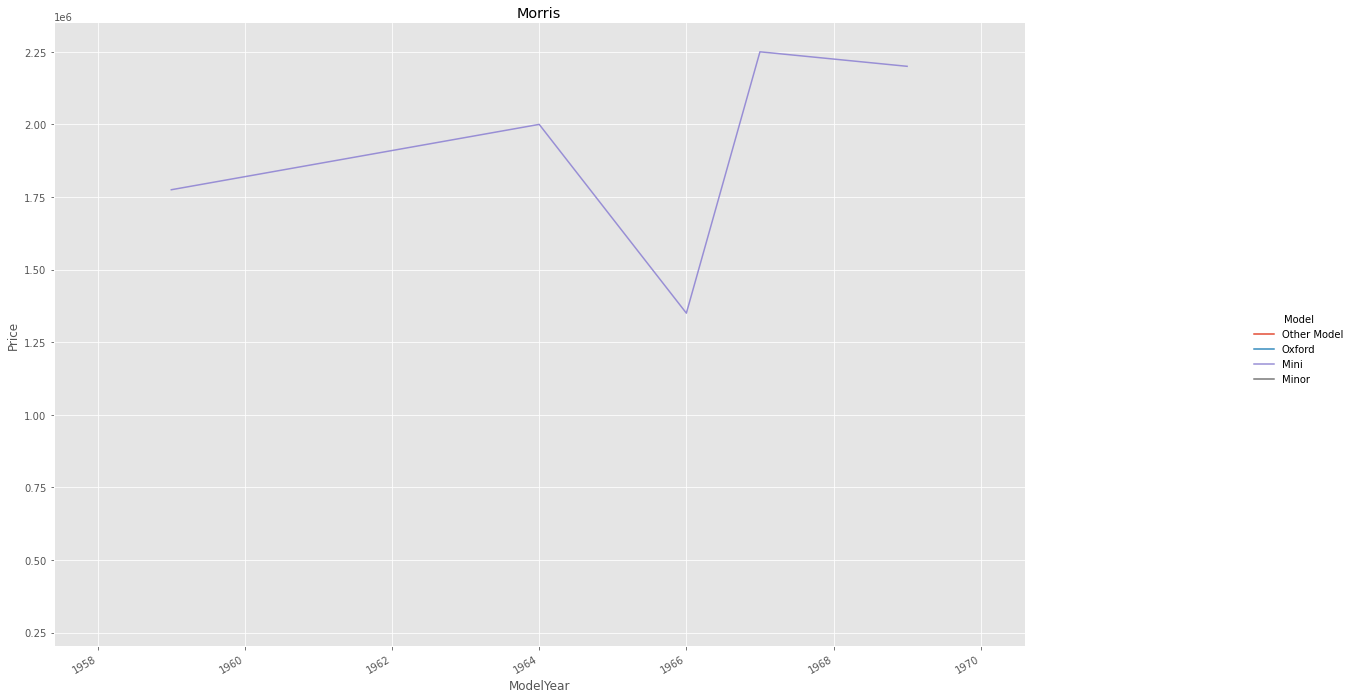

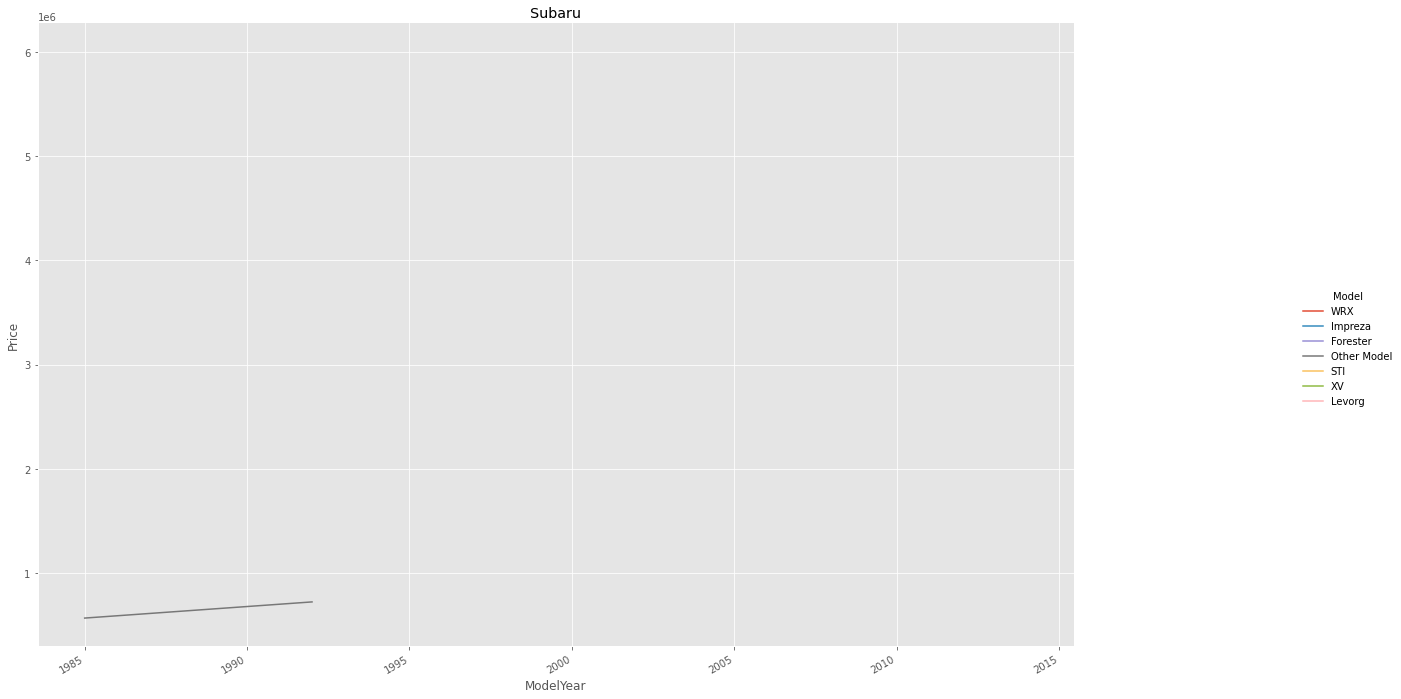

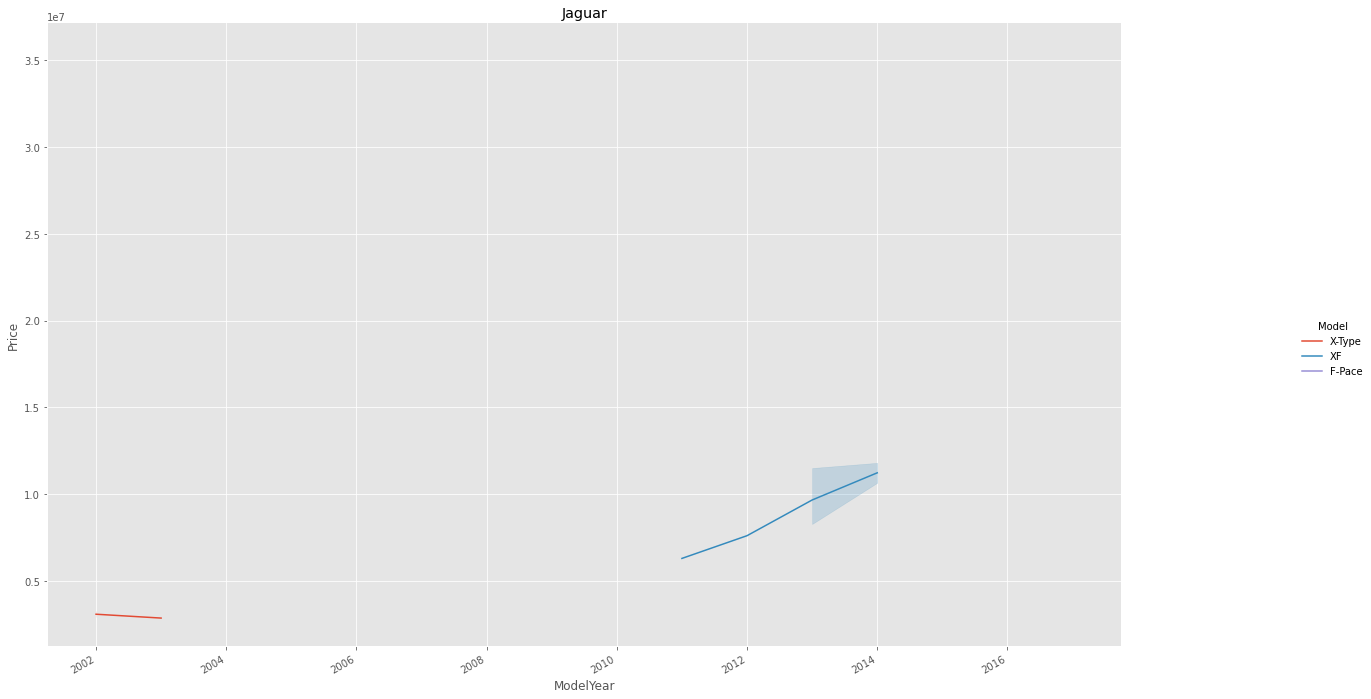

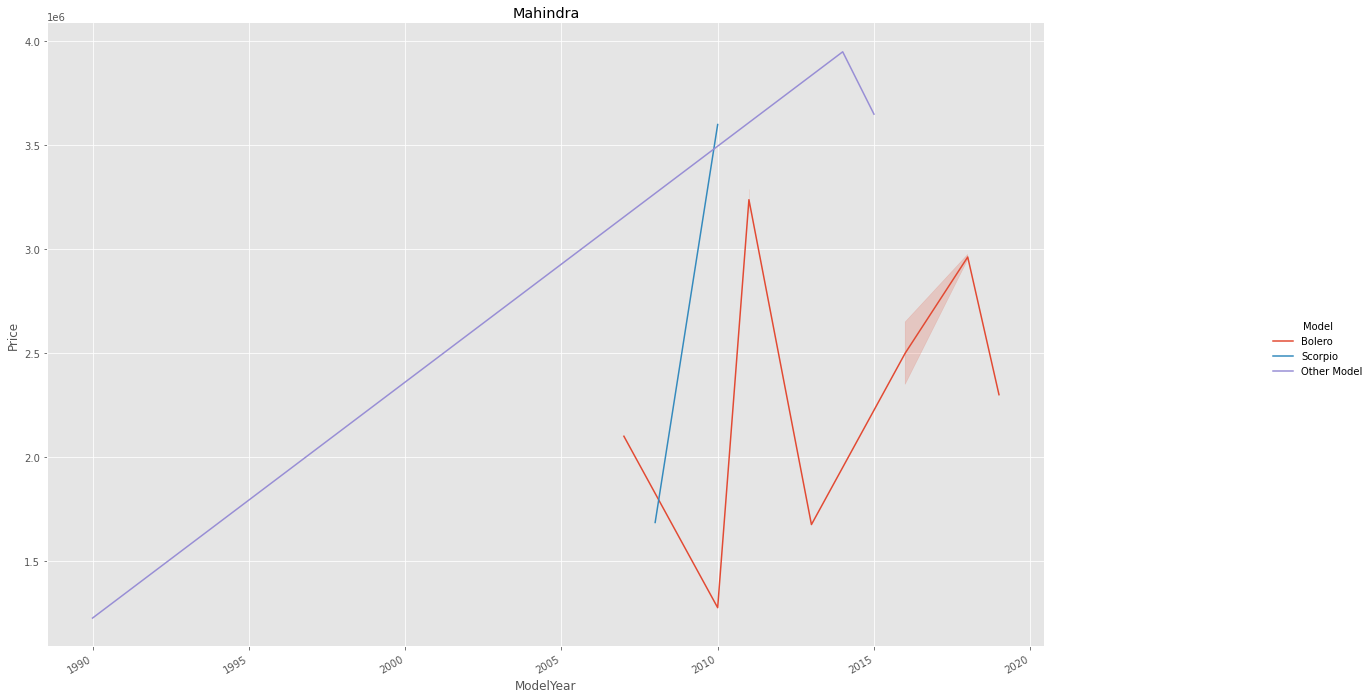

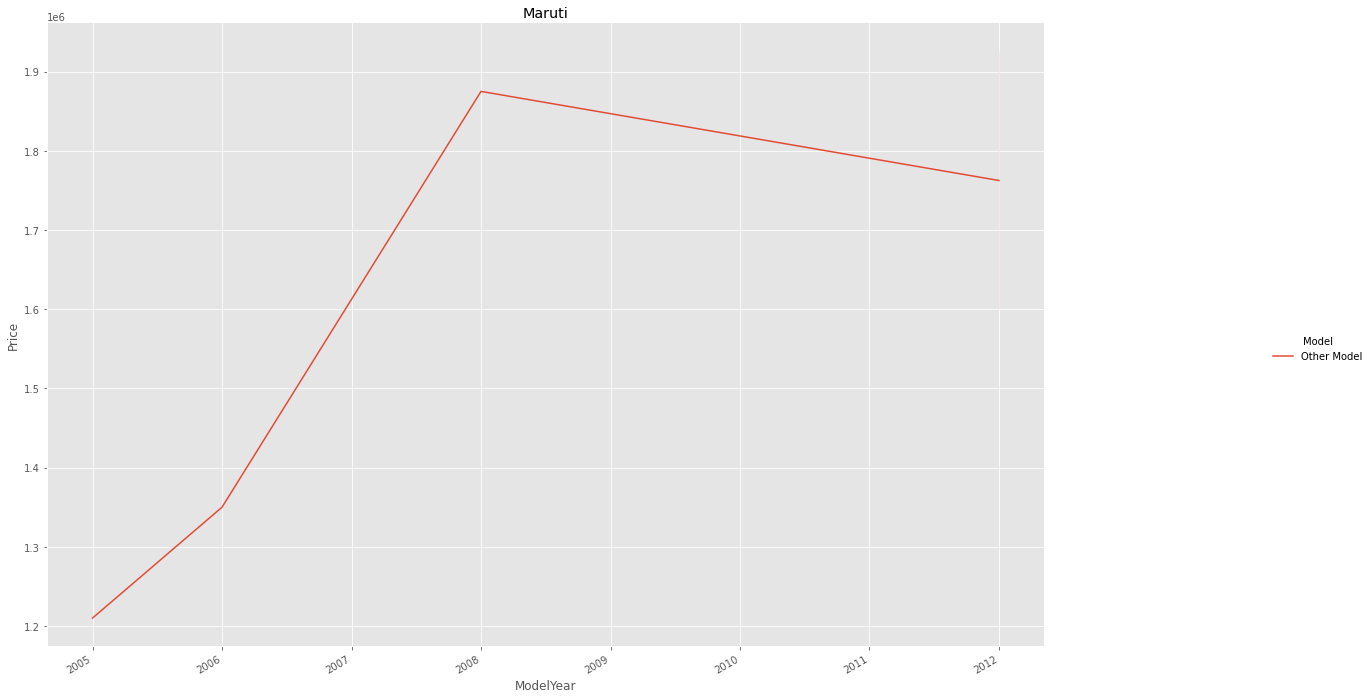

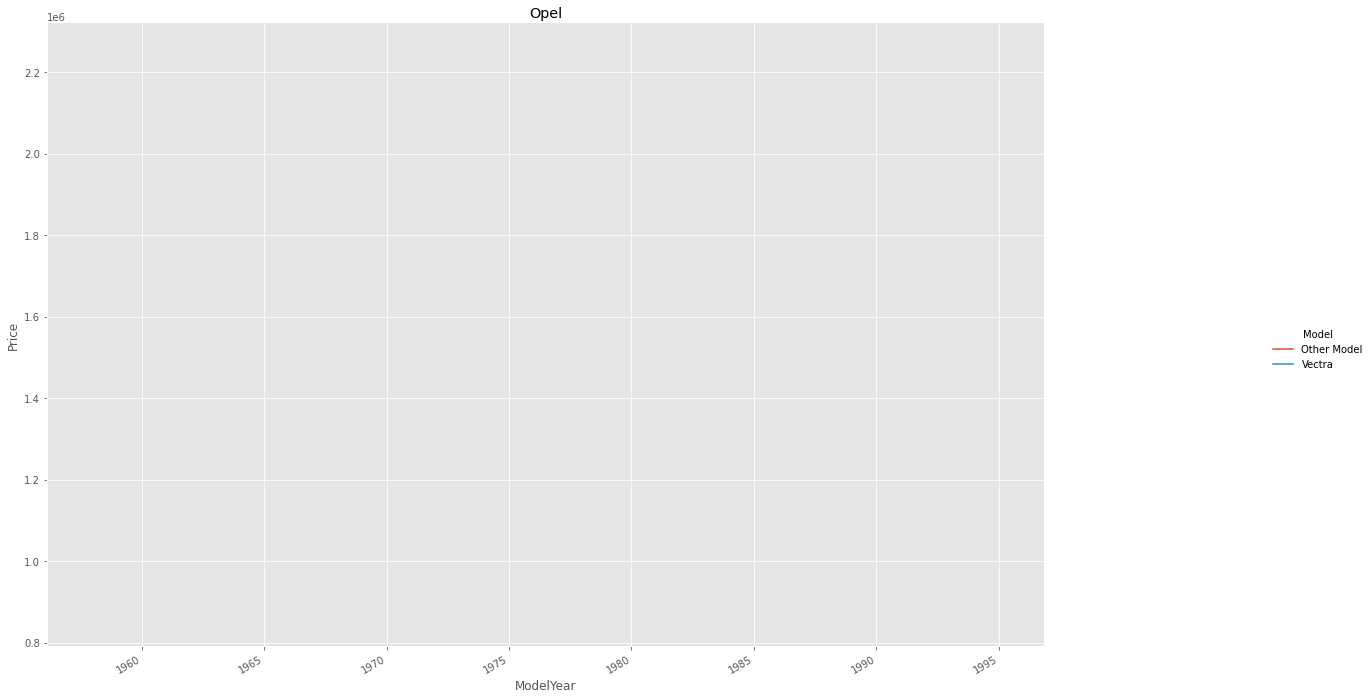

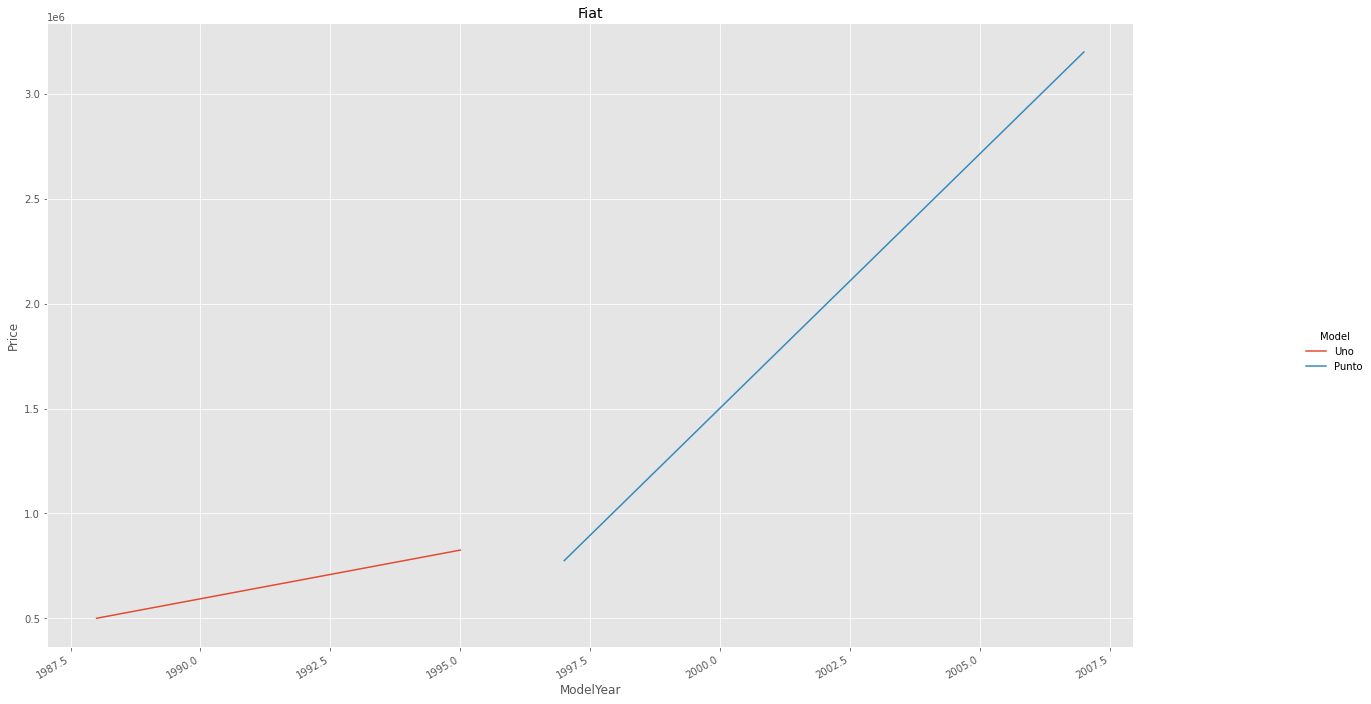

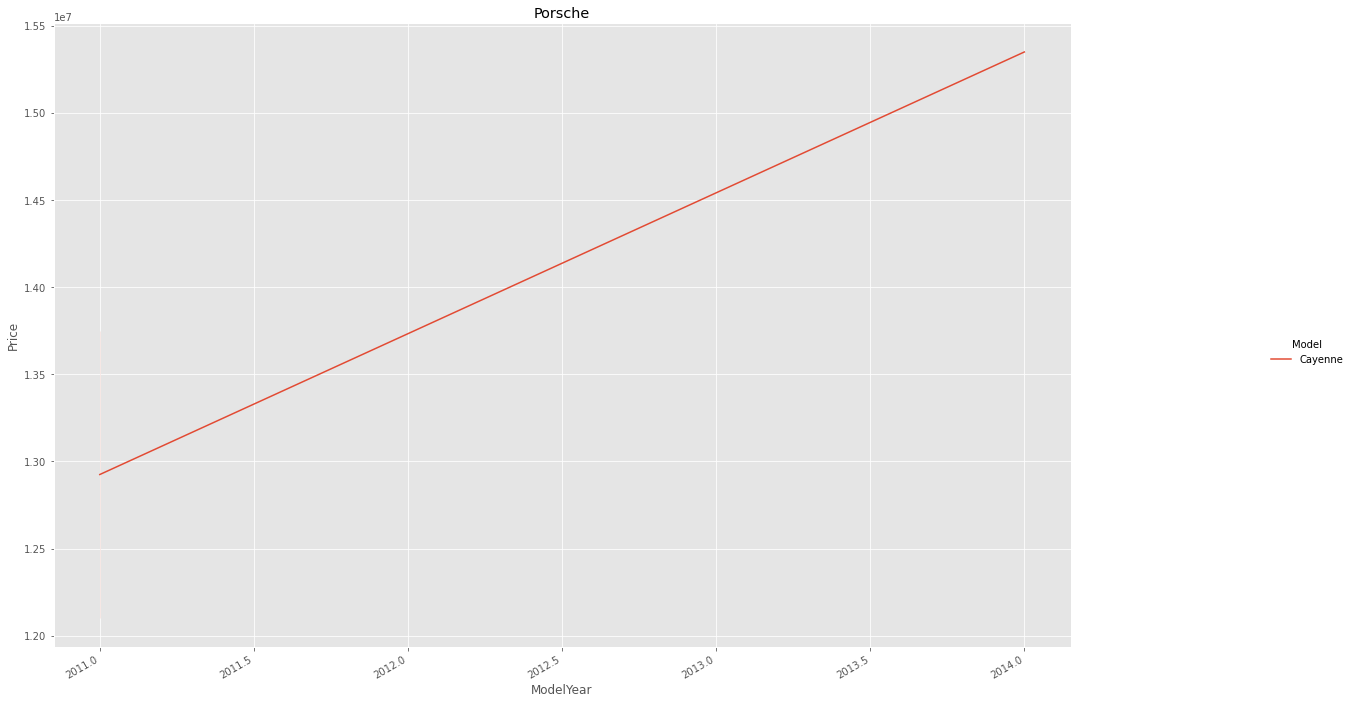

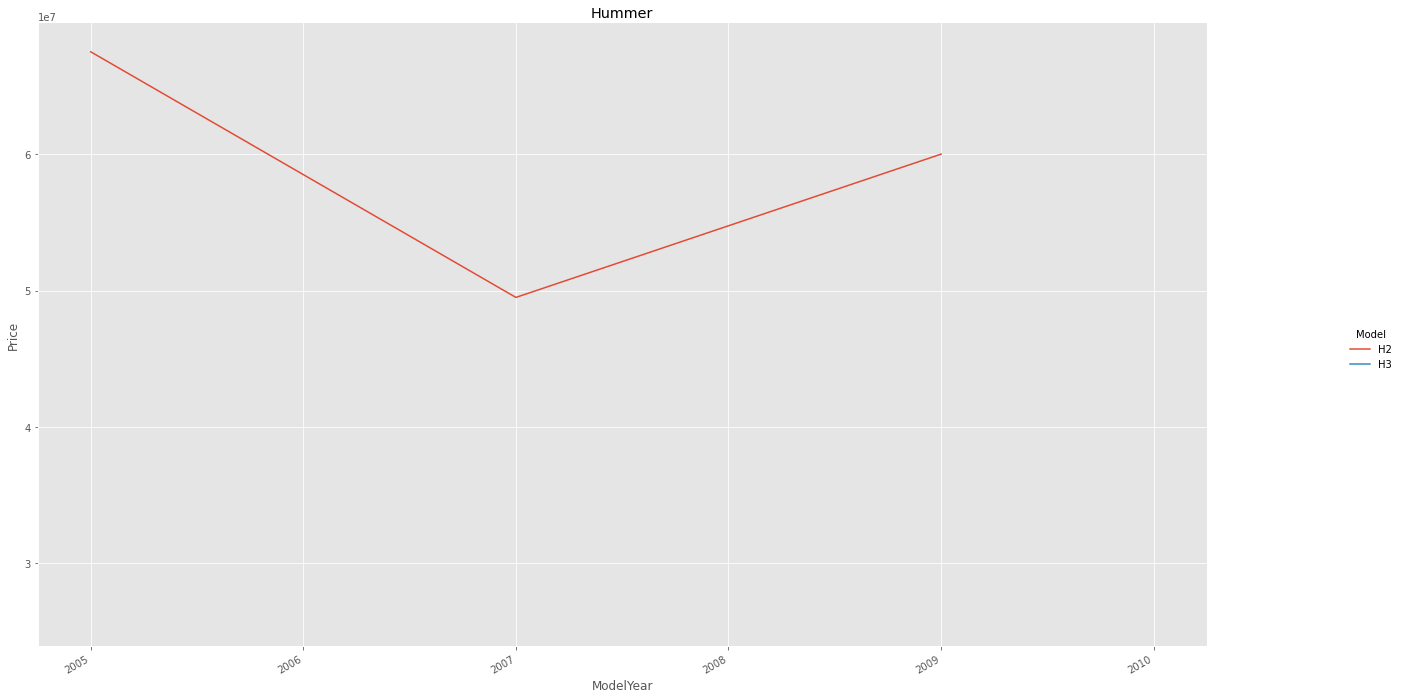

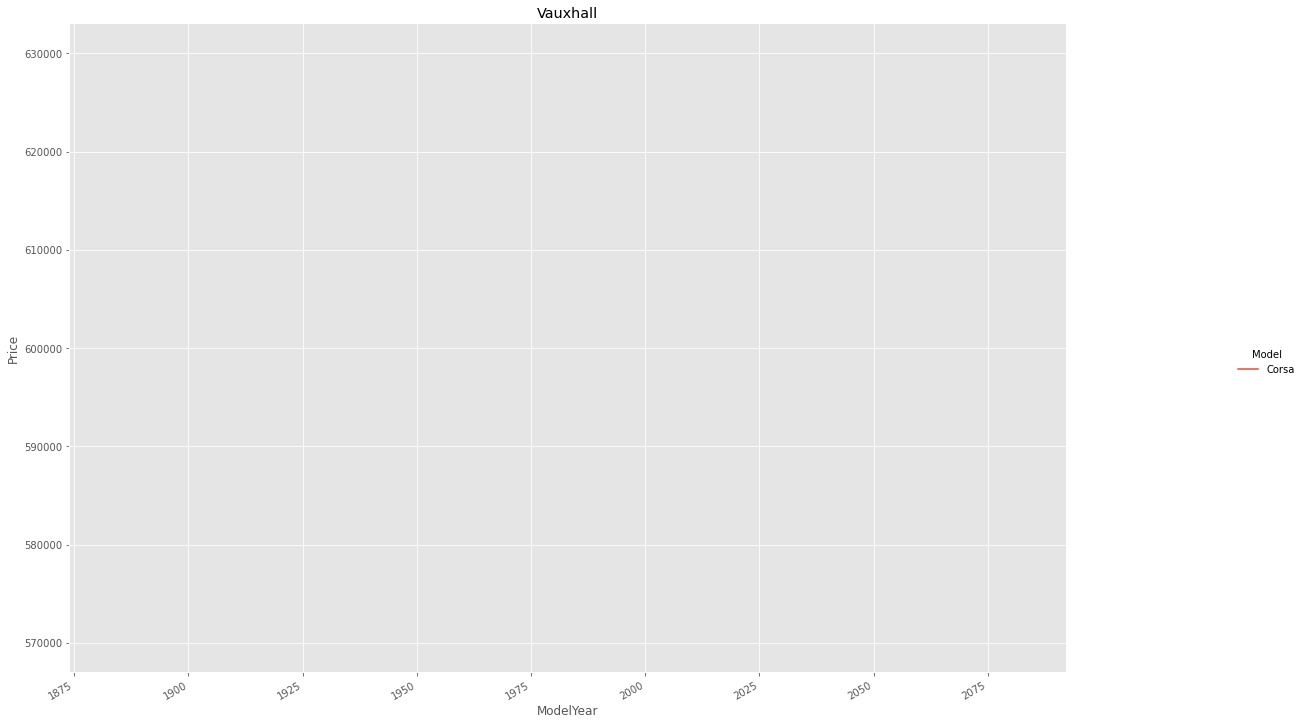

In [91]:
for brand in brand_list:
#     print(brand)
    df = vehicle_data.loc[vehicle_data['Brand']  == brand]
    g = sns.relplot(x="ModelYear", y="Price", hue="Model", kind="line", data=df).set(title=brand)
    g.fig.autofmt_xdate()
    g.fig.set_figwidth(20.27)
    g.fig.set_figheight(11.7)    

In [118]:
fuel_type_list = list(vehicle_data['FuelType'].unique())

In [119]:
fuel_type_list

['Hybrid', 'Petrol', 'Diesel', 'Electric', 'Other fuel type', 'CNG']

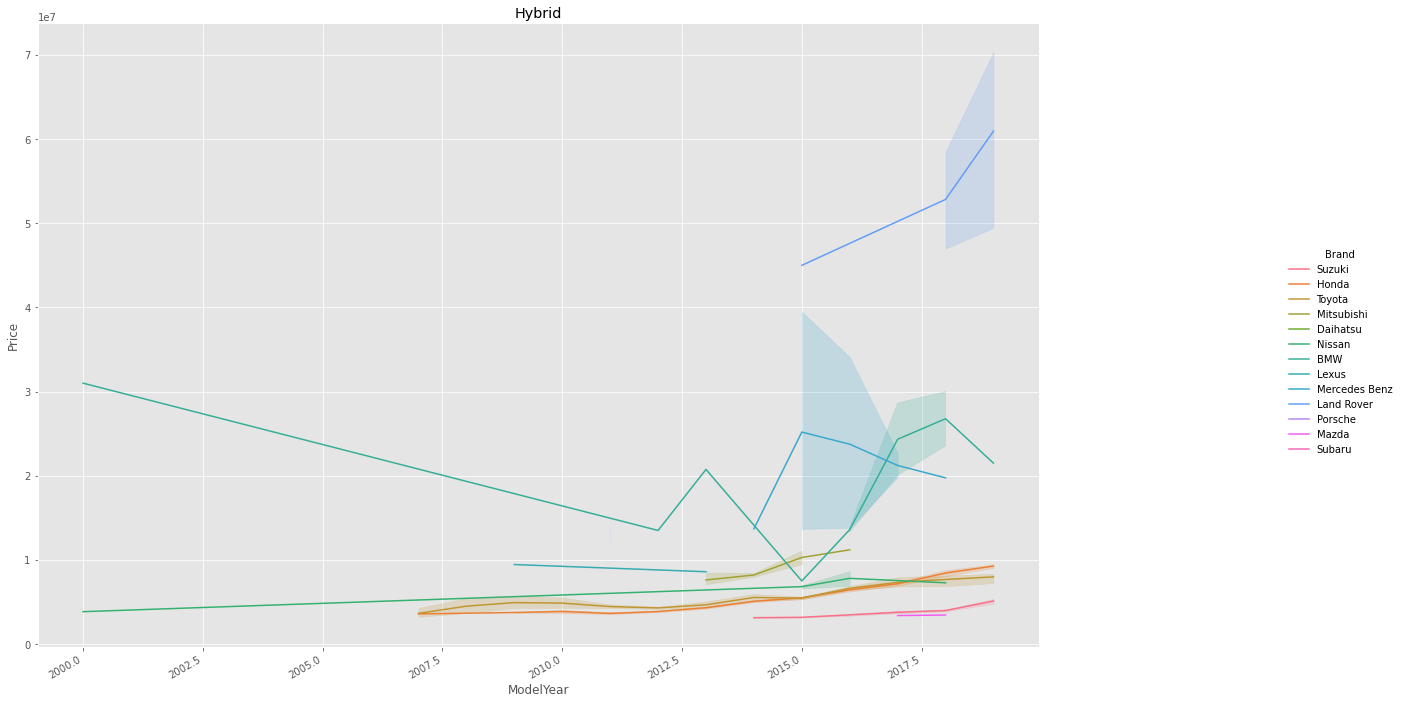

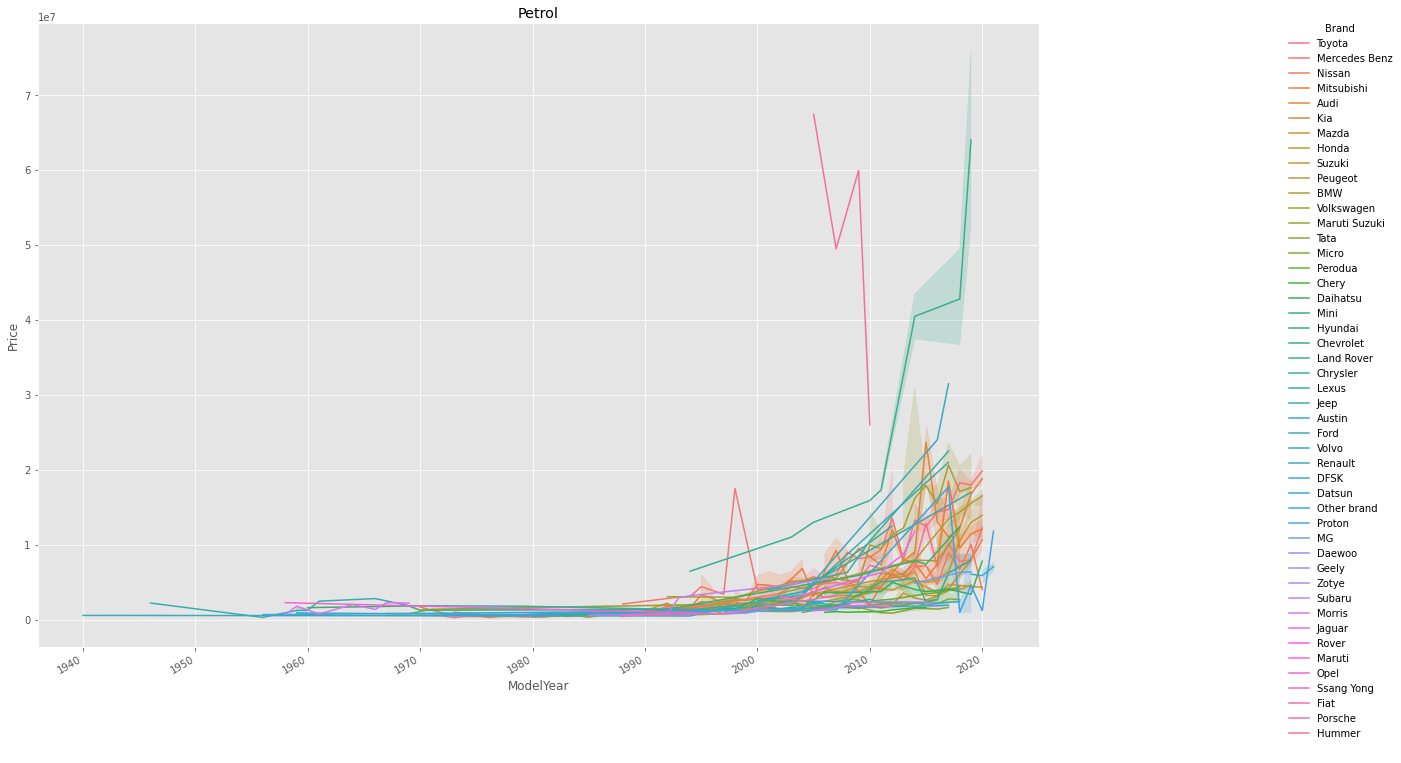

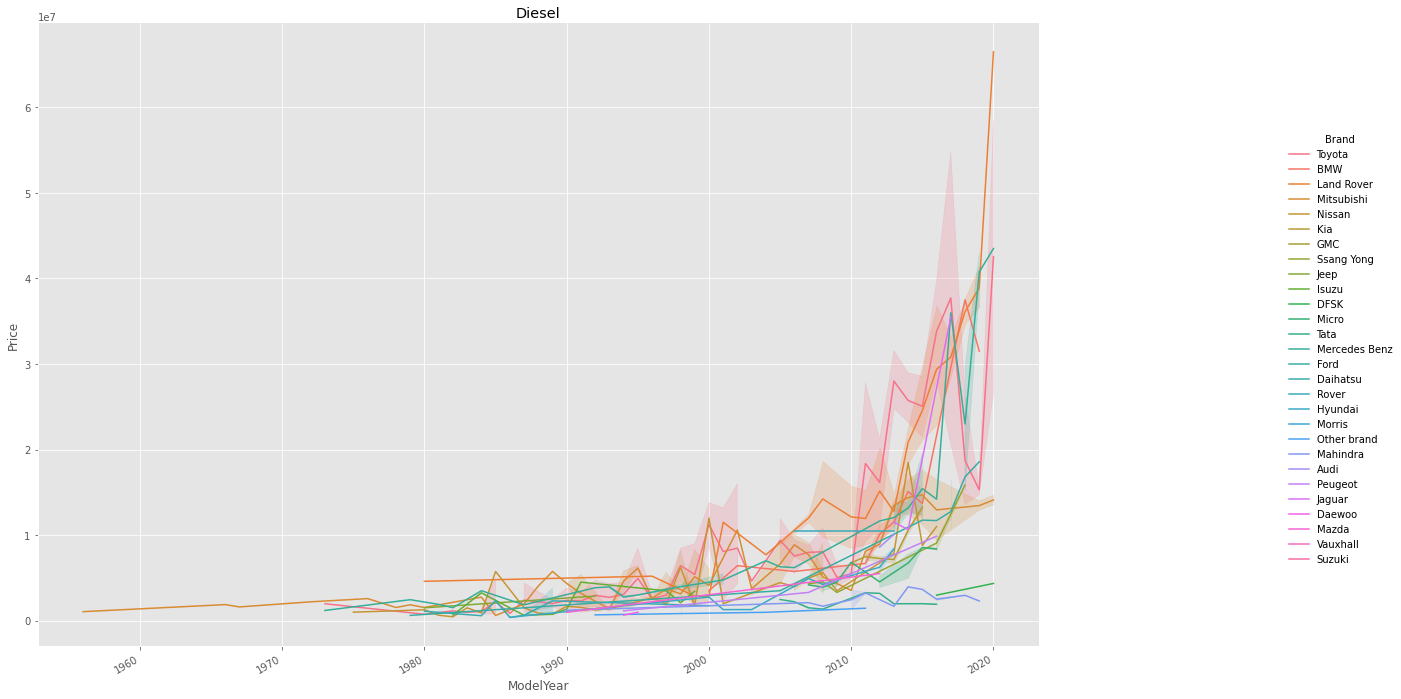

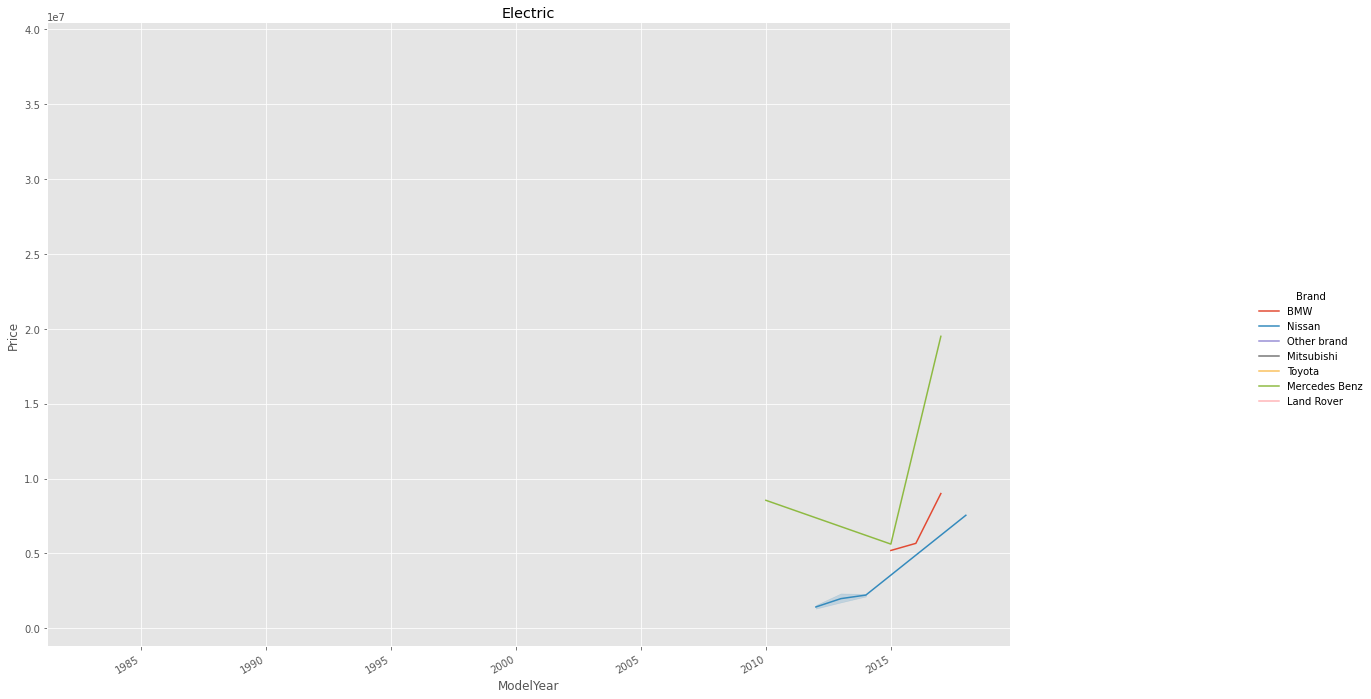

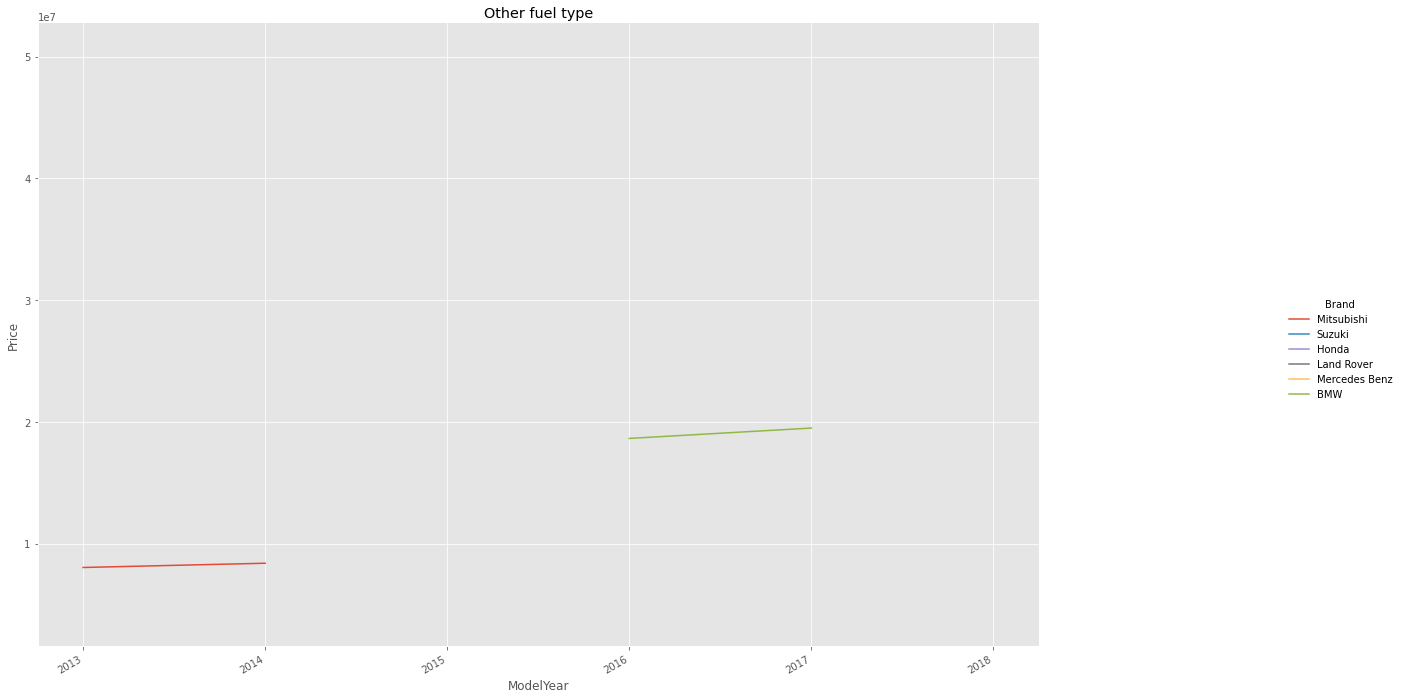

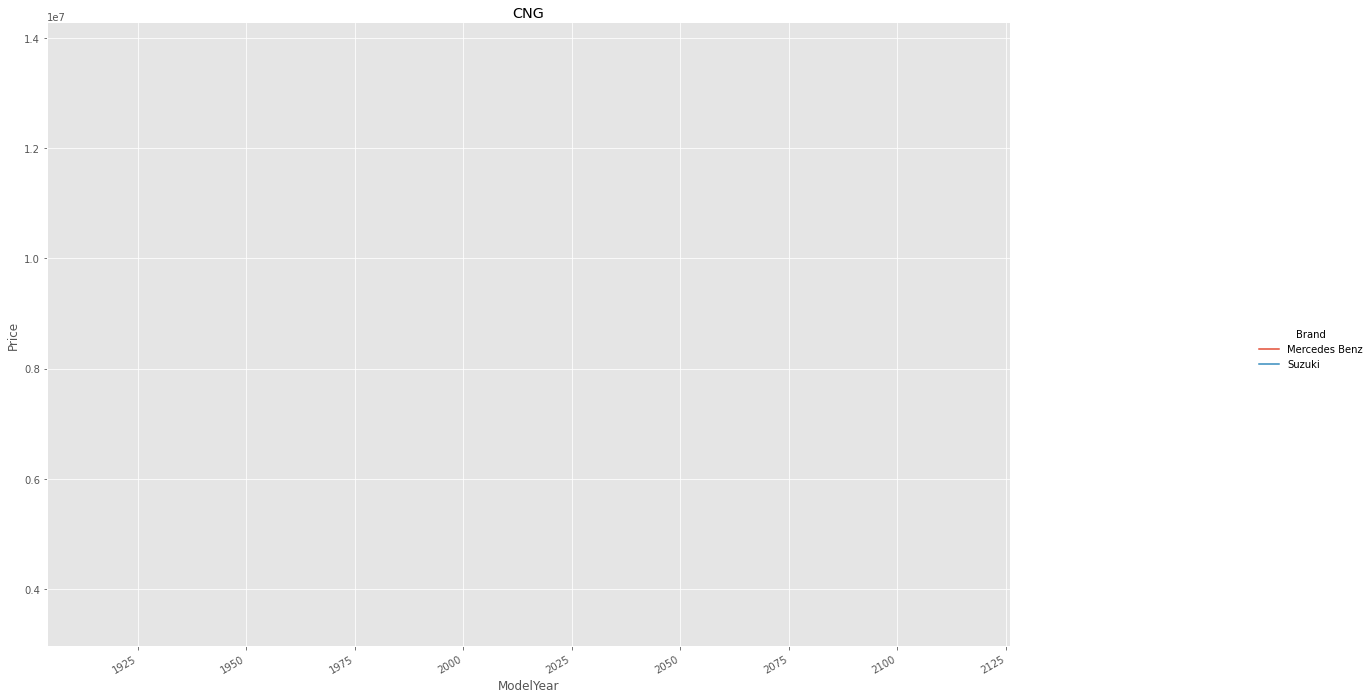

In [126]:
for fuelType in fuel_type_list:
#     print(brand)
    df = vehicle_data.loc[vehicle_data['FuelType']  == fuelType]
#     print(df.head())
    g = sns.relplot(x="ModelYear", y="Price", hue="Brand", kind="line", data=df).set(title=fuelType)
    g.fig.autofmt_xdate()
    g.fig.set_figwidth(20.27)
    g.fig.set_figheight(11.7)   